In [70]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
import matplotlib.pyplot as plt

In [71]:
class LogisticRegression:
    """
    The class which is used to implement Logistic Regression with L1,L2 and no regulariser.
    While creating a class object, the user needs to specify :
    n_tiers        : Number of iterations
    l_rate         : Learning Rate
    regularization : Type of regularization to be used (None/L1/L2)
    reg_lambda     : Value of regularization parameter to be used with the regularizer
    """
    
    def __init__(self,n_iter = 1000,l_rate = 0.1,regularization = None, reg_lambda = 0.1):
        self.n_iter = n_iter   # Number of iterations for gradient descent
        self.l_rate = l_rate  # Learning rate to be used
        self.wt     = None    # Weights for a particular class instance / Regressor
        self.b      = None    # Bias for a particular class instance / Regressor
        self.accuracy_history = []
        self.loss_history = []
        self.regularization = regularization
        self.reg_lambda = reg_lambda
        self.valid_accuracy_history = []
        self.valid_loss_history = []
    
    def sigmoid(self, Z):
        '''
        Implementation of Sigmoid function , which will be used while predicting y for a particular
        data point.
        '''
        return (1/ (1+ np.exp(-Z ) ) )
        
    def fit(self,X,Y,X_valid = None,Y_valid = None):

        n_samples  = X.shape[0] # Variable to store the number of samples in the given training sample
        n_features = X.shape[1] # Variable to store the number of features in the given training sample
        
        
        X = np.hstack((np.ones([n_samples,1]),X))

        self.wt = np.ones((n_features+1,1))
        
#         print(X.shape)
#         print(self.wt.shape)
        
        for iter_ in range(self.n_iter):
            
            print("Iteration : ",iter_,end=" ")           
            Z = np.dot(X,self.wt) 
            y_pred = self.sigmoid(Z)

            if(self.regularization == "L2"):
                self.wt -= self.l_rate *((np.dot(X.T,y_pred-Y) + 2*self.reg_lambda*(self.wt) )/n_samples ) 
#                 print("L2")
            
            elif(self.regularization == "L1"):
                self.wt -= self.l_rate *((np.dot(X.T,y_pred-Y) + self.reg_lambda*np.sign(self.wt) )/n_samples )
#                 print("L1") 
            else:
                self.wt -= self.l_rate *((np.dot(X.T,y_pred-Y))/n_samples)

            current_loss = self.loss(Y,y_pred,n_samples)
            self.loss_history.append(current_loss)
                
            y_pred[y_pred < 0.5]  = 0
            y_pred[y_pred >= 0.5] = 1
            

            current_accuracy = my_accuracy_score(Y,y_pred)
            self.accuracy_history.append(current_accuracy)

            
            if(X_valid is not None):
                Y_valid_pred = self.predict_probability(X_valid)

                validation_loss = self.loss(Y_valid,Y_valid_pred,n_samples)
                self.valid_loss_history.append(validation_loss)

                Y_valid_pred[Y_valid_pred < 0.5]  = 0
                Y_valid_pred[Y_valid_pred >= 0.5] = 1
            
                validation_accuracy = my_accuracy_score(Y_valid,Y_valid_pred)
                self.valid_accuracy_history.append(validation_accuracy)

                
                
            print(current_accuracy,current_loss)
            
    def predict_probability(self,X,internal = False):
        Z = np.dot(X,self.wt[1:]) + self.wt[0] 
        y_pred = self.sigmoid(Z)
        return(y_pred)
            
    def predict(self,X):
        Z = np.dot(X,self.wt[1:]) + self.wt[0] 
        y_pred = self.sigmoid(Z)
        y_pred[y_pred < 0.5]  = 0
        y_pred[y_pred >= 0.5] = 1        
        return y_pred
    
    def loss(self,y_orignal,y_predicted,n_samples):
        
        loss =  -1 * np.sum(y_orignal*np.log(y_predicted + 0.0000001)) - np.sum((1-y_orignal)*np.log(1- y_predicted + 0.0000001))
        loss /= n_samples

            
        if(self.regularization == "L2"):
            loss += (self.reg_lambda/(n_samples))*np.sum(self.wt*self.wt)
        
        elif(self.regularization == "L1"):
            loss += (self.reg_lambda/(n_samples))*np.sum(np.absolute(self.wt))

        return loss    


In [72]:
def my_accuracy_score(y_orignal,y_predicted): 
    """
    y_orignal   : 2-D column matrix with orignal labels
    y_predicted : 2-D column matrix with predicted labels
    
    Returns the accuracy score of the predictions
    """
    accuracy_matrix = np.array((y_orignal == y_predicted))
    accuracy_score=0
    for i in range(len(accuracy_matrix)):
        if(accuracy_matrix[i][0]):
            accuracy_score+=1
    return(accuracy_score/len(accuracy_matrix))

def split_train_valid(X_,Y_,train_size = 80,shuffle = False):
    """
    split the data set into train and validation set as per the requirements
    """
    data = np.hstack((X_,Y_))
    if(shuffle == True):
        np.random.shuffle(data)

    X_ = data[:,0:-1]
    Y_ = data[:,(-1,)]
    
    print(train_size,X_.shape)
    train_size *= X_.shape[0]
    train_size = train_size//100
    print(train_size,X_.shape[0] - train_size)
    
    X_train = X_[:train_size]
    Y_train = Y_[:train_size]
    
    X_valid = X_[train_size:]
    Y_valid = Y_[train_size:]
    
    return(X_train,Y_train,X_valid,Y_valid)

In [73]:
head = ["age",
     "workclass",
     "fnlwgt",
     "education",
     "education-num",
     "marital-status",
     "occupation",
     "relationship",
     "race",
     "sex",
     "capital-gain",
     "capital-loss",
     "hours-per-week",
     "native-country",
     "income"]

train_features = ["age",
     "workclass",
     "fnlwgt",
     "education",
     "education-num",
     "marital-status",
     "occupation",
     "relationship",
     "race",
     "sex",
     "capital-gain",
     "capital-loss",
     "hours-per-week",
     "native-country"]

### Loading Training and testing dataset

In [74]:
file_train = pd.read_csv("train.csv",header=None,names = head)
file_test = pd.read_csv("test.csv",header=None, names = head)

In [75]:
X_train = file_train[train_features]
Y_train = file_train[["income"]]
temp_train = file_train.income

X_test = file_test[train_features]
Y_test = file_test[["income"]]
temp_test = file_test.income


### One Hot encoding for categorical attributes

In [76]:
enc = OneHotEncoder()

X_train_transformed = pd.DataFrame(enc.fit_transform(X_train[["workclass","education","marital-status","occupation","relationship","race","sex","native-country"]]).toarray())
X_test_transformed = pd.DataFrame(enc.transform(X_test[["workclass","education","marital-status","occupation","relationship","race","sex","native-country"]]).toarray())

X_train_2 =  X_train[["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]]
X_test_2 =  X_test[["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]]

### Standardization / Normalization of continuous valued attributes

In [77]:
#Normalization of data
# X_train_2 = (X_train_2 - X_train_2.min())/(X_train_2.max() - X_train_2.min())
# X_test_2 = (X_test_2 - X_test_2.min())/(X_test_2.max() - X_test_2.min())


# Standardization of data
X_train_2 = (X_train_2-X_train_2.mean())/X_train_2.std()
X_test_2 = (X_test_2-X_test_2.mean())/X_test_2.std()


### Merging the one hot encoded and standardized attributes

In [78]:
X_train = pd.concat([X_train_transformed, X_train_2], axis=1)
X_test  = pd.concat([X_test_transformed, X_test_2], axis=1)

### Encoding the output variable

In [79]:
#since using a column matrix fit and transform was used again and again
enc_ordinal = OrdinalEncoder()

Y_train = pd.DataFrame(enc_ordinal.fit_transform(Y_train)).astype(int)
Y_test  = pd.DataFrame(enc_ordinal.fit_transform(Y_test)).astype(int)

#### Below cells can be run to see the value counts of different classes remain same after encoding the o/p variable

In [80]:
# pd.DataFrame(Y_train).value_counts()

In [81]:
# pd.DataFrame(temp_train).value_counts()

In [82]:
# pd.DataFrame(Y_test).value_counts()

In [83]:
# pd.DataFrame(temp_test).value_counts()

### Validation and train split of the orignal dataset

In [84]:
X_train,Y_train,X_valid,Y_valid = split_train_valid(np.array(X_train),np.array(Y_train),shuffle = False)

80 (30162, 104)
24129 6033


In [85]:
# print(X_train.shape,Y_train.shape,X_valid.shape,Y_valid.shape)

### Feature Subselection
#### Finding the correlation and checking if any two pair of attributes have correlation > 0.9
#### No two pair had correlation > 0.9

In [86]:
cor = np.array(pd.DataFrame(X_train).corr())
for i in range(len(cor)):
    for j in range(len(cor[i])):
        if(cor[i][j] > 0.9 and cor[i][j]!= 1):
            print(i,j," : ",cor[i][j])

### Logisitic Regression model with L1 regularization

In [91]:
model = LogisticRegression(n_iter=5000,l_rate=0.1,regularization = "L1",reg_lambda = 0.01 )

In [92]:
model.fit(np.array(X_train),np.array(Y_train),np.array(X_valid),np.array(Y_valid))

Iteration :  0 0.24762733640018236 6.264290462020393
Iteration :  1 0.247668780305856 6.004419194524169
Iteration :  2 0.2477102242115297 5.7448514945416935
Iteration :  3 0.24783455592855072 5.485865094597218
Iteration :  4 0.24795888764557172 5.227801539472576
Iteration :  5 0.24858054623067677 4.971082743842791
Iteration :  6 0.24969953168386588 4.716225324111525
Iteration :  7 0.25073562932570764 4.4638511791647
Iteration :  8 0.2532222636661279 4.214692967876493
Iteration :  9 0.25699365908243194 3.9695935445287014
Iteration :  10 0.26138671308384104 3.729498881283875
Iteration :  11 0.2668987525384392 3.495443946614651
Iteration :  12 0.27373699697459486 3.2685301489927903
Iteration :  13 0.2824402171660657 3.049892166098882
Iteration :  14 0.29304985701852543 2.8406524872234407
Iteration :  15 0.3045712627958059 2.6418646390811453
Iteration :  16 0.3182063077624435 2.4544495453429542
Iteration :  17 0.3359028554851009 2.279134061214536
Iteration :  18 0.3557130423971155 2.116401

Iteration :  162 0.7897965104231423 0.46004326815563523
Iteration :  163 0.7899208421401633 0.45935486099389283
Iteration :  164 0.7901280616685317 0.45867408033905044
Iteration :  165 0.790459612913921 0.45800082000967374
Iteration :  166 0.7906253885366157 0.4573349752792349
Iteration :  167 0.7907497202536367 0.45667644285804204
Iteration :  168 0.7909154958763314 0.45602512087553615
Iteration :  169 0.7912884910273944 0.45538090886292315
Iteration :  170 0.7914957105557627 0.4547437077361214
Iteration :  171 0.7914957105557627 0.45411341977899394
Iteration :  172 0.7917443739898048 0.45348994862684583
Iteration :  173 0.7919930374238469 0.4528731992501732
Iteration :  174 0.7922417008578888 0.45226307793863285
Iteration :  175 0.7923245886692362 0.4516594922852322
Iteration :  176 0.7926146960089518 0.45106235117071714
Iteration :  177 0.7928219155373203 0.45047156474814315
Iteration :  178 0.793112022877036 0.4498870444276284
Iteration :  179 0.7934435741224253 0.44930870286126695

Iteration :  323 0.8124248829209665 0.402602880910583
Iteration :  324 0.8124248829209665 0.40241610583797593
Iteration :  325 0.8125077707323138 0.40223031472126547
Iteration :  326 0.8125077707323138 0.40204549753710905
Iteration :  327 0.8126321024493348 0.4018616444004385
Iteration :  328 0.8127564341663558 0.40167874556232114
Iteration :  329 0.8128393219777031 0.40149679140785927
Iteration :  330 0.8129222097890505 0.4013157724541179
Iteration :  331 0.8132123171287662 0.4011356793480914
Iteration :  332 0.8134195366571346 0.4009565028646988
Iteration :  333 0.813626756185503 0.4007782339048142
Iteration :  334 0.8137096439968503 0.4006008634933291
Iteration :  335 0.8137925318081976 0.40042438277724335
Iteration :  336 0.8138754196195449 0.40024878302378986
Iteration :  337 0.8139583074308923 0.4000740556185877
Iteration :  338 0.8139168635252186 0.39990019206382865
Iteration :  339 0.8139168635252186 0.3997271839764871
Iteration :  340 0.8139168635252186 0.3995550230865646
Iter

Iteration :  484 0.8232002983961209 0.3808349872735775
Iteration :  485 0.8233246301131418 0.3807345155453533
Iteration :  486 0.8233660740188156 0.3806343371823137
Iteration :  487 0.8235732935471839 0.38053445064960745
Iteration :  488 0.8236147374528575 0.3804348544264399
Iteration :  489 0.8236561813585312 0.38033554700590255
Iteration :  490 0.8237390691698786 0.38023652689479726
Iteration :  491 0.8237805130755522 0.38013779261346703
Iteration :  492 0.8237390691698786 0.3800393426956289
Iteration :  493 0.8237805130755522 0.3799411756882095
Iteration :  494 0.8238634008868996 0.37984329015118
Iteration :  495 0.8239877326039206 0.3797456846573959
Iteration :  496 0.8239877326039206 0.3796483577924407
Iteration :  497 0.8241120643209416 0.37955130815446875
Iteration :  498 0.8241120643209416 0.3794545343540506
Iteration :  499 0.8242363960379626 0.37935803501402077
Iteration :  500 0.8242778399436362 0.37926180876933147
Iteration :  501 0.8243607277549836 0.3791658542669007
Itera

Iteration :  638 0.8296241037755399 0.36813224719585436
Iteration :  639 0.8296655476812135 0.36806453173633047
Iteration :  640 0.8296655476812135 0.3679969723551929
Iteration :  641 0.8297898793982345 0.36792956853857717
Iteration :  642 0.8298727672095818 0.36786231977535294
Iteration :  643 0.8298727672095818 0.3677952255570926
Iteration :  644 0.8298727672095818 0.36772828537805696
Iteration :  645 0.8298727672095818 0.36766149873516424
Iteration :  646 0.8298727672095818 0.3675948651279731
Iteration :  647 0.8299142111152555 0.36752838405865645
Iteration :  648 0.8299142111152555 0.367462055031984
Iteration :  649 0.8299142111152555 0.3673958775552922
Iteration :  650 0.8299556550209292 0.36732985113847066
Iteration :  651 0.8299142111152555 0.3672639752939383
Iteration :  652 0.8299970989266029 0.3671982495366187
Iteration :  653 0.8299556550209292 0.3671326733839231
Iteration :  654 0.8300799867379501 0.3670672463557296
Iteration :  655 0.8300799867379501 0.36700196797435863
It

Iteration :  787 0.8341000455882962 0.359529307571592
Iteration :  788 0.8341414894939699 0.35948031116183154
Iteration :  789 0.8341000455882962 0.35943141549694735
Iteration :  790 0.8341000455882962 0.35938262030776563
Iteration :  791 0.8341414894939699 0.3593339253260807
Iteration :  792 0.8342243773053173 0.3592853302846552
Iteration :  793 0.8343072651166646 0.3592368349172111
Iteration :  794 0.8343487090223383 0.3591884389584277
Iteration :  795 0.8344315968336856 0.35914014214393425
Iteration :  796 0.834514484645033 0.35909194421030255
Iteration :  797 0.8344730407393592 0.35904384489504937
Iteration :  798 0.8345559285507066 0.35899584393662304
Iteration :  799 0.8346802602677277 0.35894794107440386
Iteration :  800 0.834638816362054 0.35890013604869914
Iteration :  801 0.834638816362054 0.35885242860073097
Iteration :  802 0.834638816362054 0.35880481847264334
Iteration :  803 0.8346802602677277 0.35875730540748746
Iteration :  804 0.8345973724563803 0.35870988914922136
It

Iteration :  937 0.8358406896265904 0.3531743409924161
Iteration :  938 0.8358406896265904 0.3531378972957721
Iteration :  939 0.835882133532264 0.35310152258299504
Iteration :  940 0.8358406896265904 0.35306521668872354
Iteration :  941 0.835882133532264 0.35302897944809347
Iteration :  942 0.835882133532264 0.3529928106967281
Iteration :  943 0.8359235774379378 0.3529567102707351
Iteration :  944 0.8359650213436114 0.3529206780067114
Iteration :  945 0.8360479091549587 0.35288471374173747
Iteration :  946 0.8360479091549587 0.3528488173133754
Iteration :  947 0.8360479091549587 0.35281298855966486
Iteration :  948 0.8362136847776535 0.3527772273191297
Iteration :  949 0.8362136847776535 0.3527415334307636
Iteration :  950 0.8362965725890008 0.35270590673403973
Iteration :  951 0.8362965725890008 0.352670347068901
Iteration :  952 0.8362551286833271 0.35263485427576485
Iteration :  953 0.8363794604003482 0.35259942819551393
Iteration :  954 0.8363794604003482 0.3525640686695025
Iterat

Iteration :  1085 0.8380372166272949 0.34845211712188456
Iteration :  1086 0.8381201044386423 0.34842431342468794
Iteration :  1087 0.8381201044386423 0.3483965587423645
Iteration :  1088 0.8381201044386423 0.34836885296596815
Iteration :  1089 0.8381201044386423 0.34834119598684327
Iteration :  1090 0.838161548344316 0.3483135876966253
Iteration :  1091 0.838161548344316 0.3482860279872395
Iteration :  1092 0.8382029922499896 0.34825851675090536
Iteration :  1093 0.8382029922499896 0.3482310538801254
Iteration :  1094 0.8382029922499896 0.3482036392676928
Iteration :  1095 0.8382029922499896 0.3481762728066876
Iteration :  1096 0.8382444361556634 0.34814895439047455
Iteration :  1097 0.838285880061337 0.3481216839127063
Iteration :  1098 0.8382444361556634 0.3480944612673137
Iteration :  1099 0.8382444361556634 0.3480672863485174
Iteration :  1100 0.8382444361556634 0.3480401590508175
Iteration :  1101 0.8383273239670106 0.3480130792689932
Iteration :  1102 0.8383273239670106 0.347986

Iteration :  1234 0.8393219777031787 0.344796261170022
Iteration :  1235 0.8393219777031787 0.3447747012439103
Iteration :  1236 0.8393219777031787 0.34475317687844265
Iteration :  1237 0.8393219777031787 0.3447316879995593
Iteration :  1238 0.8393634216088525 0.34471023453338884
Iteration :  1239 0.8393219777031787 0.3446888164062427
Iteration :  1240 0.8393219777031787 0.34466743354461565
Iteration :  1241 0.8393219777031787 0.344646085875185
Iteration :  1242 0.8393634216088525 0.3446247733248138
Iteration :  1243 0.8393219777031787 0.3446034958205466
Iteration :  1244 0.8392805337975051 0.34458225328960645
Iteration :  1245 0.8393634216088525 0.3445610456594028
Iteration :  1246 0.8393219777031787 0.3445398728575228
Iteration :  1247 0.8393219777031787 0.34451873481173334
Iteration :  1248 0.8393219777031787 0.34449763144998347
Iteration :  1249 0.8393219777031787 0.3444765627003959
Iteration :  1250 0.8393219777031787 0.34445552849128036
Iteration :  1251 0.8393219777031787 0.3444

Iteration :  1393 0.8408968461187782 0.3417706174994619
Iteration :  1394 0.8408968461187782 0.3417538910158244
Iteration :  1395 0.8409382900244519 0.341737190326336
Iteration :  1396 0.8410211778357992 0.34172051538060244
Iteration :  1397 0.8410211778357992 0.3417038661283413
Iteration :  1398 0.8410211778357992 0.3416872425193955
Iteration :  1399 0.8411040656471466 0.34167064450371964
Iteration :  1400 0.841062621741473 0.34165407203138776
Iteration :  1401 0.841062621741473 0.34163752505259176
Iteration :  1402 0.841062621741473 0.34162100351763447
Iteration :  1403 0.8411040656471466 0.3416045073769404
Iteration :  1404 0.841062621741473 0.3415880365810488
Iteration :  1405 0.8410211778357992 0.3415715910806137
Iteration :  1406 0.8411040656471466 0.3415551708264018
Iteration :  1407 0.8411040656471466 0.3415387757692984
Iteration :  1408 0.8411455095528203 0.34152240586030336
Iteration :  1409 0.8411869534584939 0.3415060610505253
Iteration :  1410 0.8411869534584939 0.34148974

Iteration :  1539 0.8427203779684197 0.3395780191415323
Iteration :  1540 0.8427203779684197 0.33956458056258626
Iteration :  1541 0.8427618218740934 0.3395511615206089
Iteration :  1542 0.8427618218740934 0.3395377619794804
Iteration :  1543 0.8427203779684197 0.3395243819031552
Iteration :  1544 0.8427203779684197 0.33951102125566884
Iteration :  1545 0.8427203779684197 0.3394976800011424
Iteration :  1546 0.8427203779684197 0.339484358103767
Iteration :  1547 0.8427203779684197 0.33947105552781937
Iteration :  1548 0.8427203779684197 0.3394577722376537
Iteration :  1549 0.8427618218740934 0.33944450819770405
Iteration :  1550 0.842803265779767 0.33943126337247886
Iteration :  1551 0.8427618218740934 0.3394180377265676
Iteration :  1552 0.8427618218740934 0.33940483122464277
Iteration :  1553 0.8428447096854408 0.33939164383144693
Iteration :  1554 0.8428447096854408 0.3393784755118035
Iteration :  1555 0.8428447096854408 0.3393653262306169
Iteration :  1556 0.8428447096854408 0.3393

Iteration :  1687 0.8441709146669982 0.3377839388371963
Iteration :  1688 0.8441709146669982 0.3377730375118424
Iteration :  1689 0.8442123585726719 0.337762151149417
Iteration :  1690 0.8442123585726719 0.3377512797236836
Iteration :  1691 0.8442123585726719 0.33774042320846404
Iteration :  1692 0.8442123585726719 0.33772958157763355
Iteration :  1693 0.8442123585726719 0.33771875480512475
Iteration :  1694 0.8441294707613245 0.3377079428649248
Iteration :  1695 0.8441294707613245 0.33769714573107135
Iteration :  1696 0.8441709146669982 0.3376863633776626
Iteration :  1697 0.8441709146669982 0.33767559577884465
Iteration :  1698 0.8442123585726719 0.3376648429088243
Iteration :  1699 0.8442538024783456 0.3376541047418592
Iteration :  1700 0.8442538024783456 0.33764338125225885
Iteration :  1701 0.8442952463840192 0.33763267241439054
Iteration :  1702 0.8442952463840192 0.3376219782026727
Iteration :  1703 0.8443366902896929 0.33761129859157835
Iteration :  1704 0.8443781341953666 0.33

Iteration :  1841 0.8450412366861453 0.33626693530112634
Iteration :  1842 0.8450412366861453 0.33625805954086696
Iteration :  1843 0.8450412366861453 0.3362491952803076
Iteration :  1844 0.8450412366861453 0.33624034250031826
Iteration :  1845 0.8450412366861453 0.336231501181815
Iteration :  1846 0.8450412366861453 0.3362226713057417
Iteration :  1847 0.8450412366861453 0.3362138528530876
Iteration :  1848 0.8450412366861453 0.3362050458048793
Iteration :  1849 0.8450412366861453 0.3361962501421805
Iteration :  1850 0.8450412366861453 0.33618746584609166
Iteration :  1851 0.8450412366861453 0.3361786928977506
Iteration :  1852 0.8450412366861453 0.3361699312783362
Iteration :  1853 0.8449997927804717 0.33616118096905984
Iteration :  1854 0.8449583488747979 0.3361524419511713
Iteration :  1855 0.8449583488747979 0.33614371420596373
Iteration :  1856 0.8449169049691243 0.3361349977147598
Iteration :  1857 0.8449169049691243 0.33612629245892106
Iteration :  1858 0.8449169049691243 0.336

Iteration :  1993 0.8457457830825977 0.335039578906297
Iteration :  1994 0.8457457830825977 0.335032251756518
Iteration :  1995 0.8457457830825977 0.33502493359112173
Iteration :  1996 0.8457457830825977 0.3350176243958886
Iteration :  1997 0.8457457830825977 0.33501032415662907
Iteration :  1998 0.8457457830825977 0.33500303285917565
Iteration :  1999 0.8457457830825977 0.3349957504893886
Iteration :  2000 0.8458286708939451 0.33498847703315965
Iteration :  2001 0.8458286708939451 0.3349812124764018
Iteration :  2002 0.8458286708939451 0.33497395680505815
Iteration :  2003 0.8458286708939451 0.3349667100050975
Iteration :  2004 0.8457872269882714 0.3349594720625143
Iteration :  2005 0.8457872269882714 0.3349522429633297
Iteration :  2006 0.8458286708939451 0.3349450226935942
Iteration :  2007 0.8458286708939451 0.33493781123938215
Iteration :  2008 0.8458286708939451 0.33493060858679186
Iteration :  2009 0.8458286708939451 0.3349234147219556
Iteration :  2010 0.8458286708939451 0.3349

Iteration :  2141 0.8463674416677027 0.3340458528413152
Iteration :  2142 0.8464088855733765 0.33403971394449083
Iteration :  2143 0.8464088855733765 0.3340335821926726
Iteration :  2144 0.8464088855733765 0.33402745757505814
Iteration :  2145 0.8464088855733765 0.33402134008087253
Iteration :  2146 0.8464088855733765 0.33401522969935815
Iteration :  2147 0.8464088855733765 0.3340091264197772
Iteration :  2148 0.8464088855733765 0.33400303023140887
Iteration :  2149 0.8464088855733765 0.33399694112355544
Iteration :  2150 0.8464088855733765 0.33399085908553744
Iteration :  2151 0.8464088855733765 0.3339847841066948
Iteration :  2152 0.8464503294790501 0.3339787161763835
Iteration :  2153 0.8464503294790501 0.3339726552839844
Iteration :  2154 0.8464917733847238 0.3339666014188932
Iteration :  2155 0.8464917733847238 0.33396055457053053
Iteration :  2156 0.8464917733847238 0.333954514728326
Iteration :  2157 0.8464917733847238 0.33394848188173737
Iteration :  2158 0.8464917733847238 0.3

Iteration :  2294 0.8468233246301131 0.33318376939359023
Iteration :  2295 0.8468233246301131 0.3331786087650771
Iteration :  2296 0.8468233246301131 0.3331734538354384
Iteration :  2297 0.8468233246301131 0.33316830459644453
Iteration :  2298 0.8467818807244395 0.33316316103988575
Iteration :  2299 0.8467818807244395 0.33315802315756216
Iteration :  2300 0.8467818807244395 0.33315289094129247
Iteration :  2301 0.8467818807244395 0.33314776438290766
Iteration :  2302 0.8467404368187658 0.3331426434742527
Iteration :  2303 0.8467404368187658 0.3331375282071901
Iteration :  2304 0.8467818807244395 0.3331324185735887
Iteration :  2305 0.8467818807244395 0.33312731456534045
Iteration :  2306 0.8467818807244395 0.3331222161743436
Iteration :  2307 0.8467818807244395 0.3331171233925159
Iteration :  2308 0.8467818807244395 0.33311203621178925
Iteration :  2309 0.8467818807244395 0.33310695462410267
Iteration :  2310 0.8467818807244395 0.3331018786214162
Iteration :  2311 0.8467818807244395 0.

Iteration :  2445 0.8468233246301131 0.33246471422563245
Iteration :  2446 0.8468233246301131 0.3324603285049617
Iteration :  2447 0.8468233246301131 0.3324559473876901
Iteration :  2448 0.8468233246301131 0.3324515708674525
Iteration :  2449 0.8468233246301131 0.33244719893789726
Iteration :  2450 0.8467818807244395 0.33244283159268795
Iteration :  2451 0.8467818807244395 0.3324384688254925
Iteration :  2452 0.8467818807244395 0.3324341106299909
Iteration :  2453 0.8467818807244395 0.3324297569998723
Iteration :  2454 0.8467818807244395 0.3324254079288434
Iteration :  2455 0.8467818807244395 0.33242106341061095
Iteration :  2456 0.8467818807244395 0.3324167234388991
Iteration :  2457 0.8467818807244395 0.33241238800744144
Iteration :  2458 0.8467404368187658 0.33240805710998045
Iteration :  2459 0.8467818807244395 0.3324037307402682
Iteration :  2460 0.8468647685357868 0.3323994088920704
Iteration :  2461 0.8468647685357868 0.33239509155916225
Iteration :  2462 0.8468647685357868 0.33

Iteration :  2604 0.8471963197811762 0.33182128185254495
Iteration :  2605 0.8471963197811762 0.33181755462695256
Iteration :  2606 0.8471963197811762 0.33181383111376567
Iteration :  2607 0.8471963197811762 0.33181011130807747
Iteration :  2608 0.8471963197811762 0.3318063952049818
Iteration :  2609 0.8472377636868499 0.33180268279959
Iteration :  2610 0.8472377636868499 0.3317989740870115
Iteration :  2611 0.8472377636868499 0.33179526906236934
Iteration :  2612 0.8472377636868499 0.33179156772079255
Iteration :  2613 0.8472377636868499 0.3317878700574185
Iteration :  2614 0.8472377636868499 0.3317841760673939
Iteration :  2615 0.8472377636868499 0.3317804857458693
Iteration :  2616 0.8472377636868499 0.3317767990880057
Iteration :  2617 0.8472792075925235 0.33177311608896914
Iteration :  2618 0.8472792075925235 0.33176943674393844
Iteration :  2619 0.8472792075925235 0.33176576104809496
Iteration :  2620 0.8472792075925235 0.3317620889966316
Iteration :  2621 0.8472377636868499 0.33

Iteration :  2757 0.8471963197811762 0.3312914734182631
Iteration :  2758 0.8471963197811762 0.3312882613813477
Iteration :  2759 0.8472792075925235 0.33128505238877703
Iteration :  2760 0.8472792075925235 0.3312818464366815
Iteration :  2761 0.8472792075925235 0.33127864352120273
Iteration :  2762 0.8472792075925235 0.3312754436384906
Iteration :  2763 0.8472792075925235 0.33127224678469597
Iteration :  2764 0.8473206514981972 0.33126905295597914
Iteration :  2765 0.8473206514981972 0.33126586214850046
Iteration :  2766 0.8473206514981972 0.33126267435843193
Iteration :  2767 0.8473206514981972 0.33125948958195445
Iteration :  2768 0.8473206514981972 0.3312563078152455
Iteration :  2769 0.8473206514981972 0.3312531290544925
Iteration :  2770 0.8473620954038709 0.33124995329589124
Iteration :  2771 0.8473620954038709 0.3312467805356431
Iteration :  2772 0.8473620954038709 0.33124361076994785
Iteration :  2773 0.8473620954038709 0.33124044399502256
Iteration :  2774 0.8473620954038709 0

Iteration :  2910 0.8469476563471342 0.3308332926757754
Iteration :  2911 0.8469476563471342 0.3308305047280262
Iteration :  2912 0.8469476563471342 0.3308277192963817
Iteration :  2913 0.8469476563471342 0.33082493637777155
Iteration :  2914 0.8469891002528078 0.33082215596913117
Iteration :  2915 0.8469891002528078 0.3308193780673991
Iteration :  2916 0.8469891002528078 0.33081660266951723
Iteration :  2917 0.8469891002528078 0.33081382977243584
Iteration :  2918 0.8469891002528078 0.33081105937310473
Iteration :  2919 0.8469891002528078 0.3308082914684803
Iteration :  2920 0.8470305441584814 0.33080552605552654
Iteration :  2921 0.8470305441584814 0.3308027631312076
Iteration :  2922 0.8470305441584814 0.3308000026924939
Iteration :  2923 0.8470305441584814 0.330797244736356
Iteration :  2924 0.8470305441584814 0.3307944892597783
Iteration :  2925 0.8470719880641552 0.33079173625974556
Iteration :  2926 0.8470719880641552 0.3307889857332379
Iteration :  2927 0.8470719880641552 0.330

Iteration :  3065 0.8470305441584814 0.3304294211689744
Iteration :  3066 0.8470305441584814 0.3304269891593015
Iteration :  3067 0.8470305441584814 0.33042455923946956
Iteration :  3068 0.8470305441584814 0.33042213140702575
Iteration :  3069 0.8470305441584814 0.33041970565952655
Iteration :  3070 0.8470305441584814 0.3304172819945172
Iteration :  3071 0.8470305441584814 0.330414860409561
Iteration :  3072 0.8470305441584814 0.33041244090222177
Iteration :  3073 0.8470305441584814 0.33041002347005827
Iteration :  3074 0.8470305441584814 0.3304076081106425
Iteration :  3075 0.8470305441584814 0.33040519482154396
Iteration :  3076 0.8470305441584814 0.3304027836003378
Iteration :  3077 0.8470305441584814 0.3304003744446041
Iteration :  3078 0.8470305441584814 0.3303979673519251
Iteration :  3079 0.8470305441584814 0.3303955623198839
Iteration :  3080 0.8470305441584814 0.33039315934606817
Iteration :  3081 0.8470305441584814 0.3303907584280757
Iteration :  3082 0.8470305441584814 0.330

Iteration :  3219 0.8473620954038709 0.3300781229325327
Iteration :  3220 0.8473620954038709 0.3300759858217124
Iteration :  3221 0.8473620954038709 0.33007385046088716
Iteration :  3222 0.8473620954038709 0.3300717168480769
Iteration :  3223 0.8473620954038709 0.33006958498131056
Iteration :  3224 0.8473620954038709 0.33006745485861094
Iteration :  3225 0.8473620954038709 0.3300653264780139
Iteration :  3226 0.8473620954038709 0.3300631998375501
Iteration :  3227 0.8473620954038709 0.33006107493525294
Iteration :  3228 0.8473620954038709 0.3300589517691638
Iteration :  3229 0.8473620954038709 0.33005683033732675
Iteration :  3230 0.8473620954038709 0.33005471063778064
Iteration :  3231 0.8473620954038709 0.3300525926685723
Iteration :  3232 0.8473620954038709 0.3300504764277564
Iteration :  3233 0.8474035393095445 0.33004836191337733
Iteration :  3234 0.8474035393095445 0.33004624912349767
Iteration :  3235 0.8474035393095445 0.3300441380561697
Iteration :  3236 0.8474035393095445 0.3

Iteration :  3378 0.8475278710265656 0.3297590702825453
Iteration :  3379 0.8475278710265656 0.329757188259187
Iteration :  3380 0.8475278710265656 0.3297553077028169
Iteration :  3381 0.8475278710265656 0.3297534286118459
Iteration :  3382 0.8475278710265656 0.3297515509846763
Iteration :  3383 0.8475278710265656 0.3297496748197229
Iteration :  3384 0.8475278710265656 0.3297478001153884
Iteration :  3385 0.8475278710265656 0.3297459268700907
Iteration :  3386 0.8475278710265656 0.3297440550822431
Iteration :  3387 0.8475278710265656 0.32974218475026496
Iteration :  3388 0.8475278710265656 0.3297403158725715
Iteration :  3389 0.8475278710265656 0.32973844844758626
Iteration :  3390 0.8475278710265656 0.32973658247373366
Iteration :  3391 0.8475278710265656 0.3297347179494362
Iteration :  3392 0.8475693149322392 0.32973285487312265
Iteration :  3393 0.8475278710265656 0.32973099324322347
Iteration :  3394 0.8475278710265656 0.32972913305817175
Iteration :  3395 0.8475278710265656 0.3297

Iteration :  3531 0.8478594222719549 0.3294872894145946
Iteration :  3532 0.8479008661776286 0.32948561445756397
Iteration :  3533 0.8479008661776286 0.3294839407462077
Iteration :  3534 0.8479008661776286 0.3294822682792211
Iteration :  3535 0.8479008661776286 0.32948059705529553
Iteration :  3536 0.8479008661776286 0.3294789270731334
Iteration :  3537 0.8479008661776286 0.32947725833142555
Iteration :  3538 0.8479423100833022 0.32947559082887923
Iteration :  3539 0.8479423100833022 0.32947392456419117
Iteration :  3540 0.8478594222719549 0.3294722595360664
Iteration :  3541 0.8477765344606075 0.32947059574321064
Iteration :  3542 0.8477765344606075 0.3294689331843295
Iteration :  3543 0.8478179783662813 0.3294672718581319
Iteration :  3544 0.8478179783662813 0.32946561176332423
Iteration :  3545 0.8478594222719549 0.329463952898624
Iteration :  3546 0.8478594222719549 0.329462295262741
Iteration :  3547 0.8478594222719549 0.32946063885439075
Iteration :  3548 0.8478594222719549 0.329

Iteration :  3681 0.8479008661776286 0.329249285015092
Iteration :  3682 0.8479008661776286 0.32924778334729016
Iteration :  3683 0.8479008661776286 0.32924628274650325
Iteration :  3684 0.8479008661776286 0.32924478321165285
Iteration :  3685 0.8479008661776286 0.32924328474165654
Iteration :  3686 0.8478594222719549 0.3292417873354415
Iteration :  3687 0.8478594222719549 0.32924029099192503
Iteration :  3688 0.8479008661776286 0.32923879571003556
Iteration :  3689 0.8479423100833022 0.329237301488696
Iteration :  3690 0.8479423100833022 0.3292358083268376
Iteration :  3691 0.8479423100833022 0.32923431622338556
Iteration :  3692 0.8479423100833022 0.32923282517726987
Iteration :  3693 0.8479423100833022 0.3292313351874255
Iteration :  3694 0.8479423100833022 0.329229846252782
Iteration :  3695 0.847983753988976 0.32922835837227166
Iteration :  3696 0.847983753988976 0.32922687154483216
Iteration :  3697 0.847983753988976 0.3292253857694041
Iteration :  3698 0.847983753988976 0.329223

Iteration :  3835 0.8479423100833022 0.32902998263139427
Iteration :  3836 0.8479423100833022 0.329028633312939
Iteration :  3837 0.8479423100833022 0.32902728490982386
Iteration :  3838 0.8479423100833022 0.329025937421146
Iteration :  3839 0.8479423100833022 0.329024590846019
Iteration :  3840 0.8479423100833022 0.32902324518354775
Iteration :  3841 0.8479423100833022 0.3290219004328422
Iteration :  3842 0.8479423100833022 0.3290205565930097
Iteration :  3843 0.8479423100833022 0.32901921366316234
Iteration :  3844 0.8479423100833022 0.32901787164241353
Iteration :  3845 0.8479423100833022 0.32901653052987084
Iteration :  3846 0.8479423100833022 0.3290151903246525
Iteration :  3847 0.8479423100833022 0.3290138510258751
Iteration :  3848 0.8479423100833022 0.3290125126326494
Iteration :  3849 0.8479423100833022 0.3290111751440969
Iteration :  3850 0.8479423100833022 0.32900983855933724
Iteration :  3851 0.8479423100833022 0.32900850287748185
Iteration :  3852 0.8479423100833022 0.3290

Iteration :  3981 0.8482324174230179 0.32884223527819406
Iteration :  3982 0.8482324174230179 0.32884101065130455
Iteration :  3983 0.8482324174230179 0.3288397868198356
Iteration :  3984 0.8482324174230179 0.3288385637830331
Iteration :  3985 0.8482324174230179 0.3288373415401522
Iteration :  3986 0.8482324174230179 0.32883612009043794
Iteration :  3987 0.8482324174230179 0.32883489943314176
Iteration :  3988 0.8482324174230179 0.3288336795675185
Iteration :  3989 0.8482324174230179 0.328832460492816
Iteration :  3990 0.8482324174230179 0.3288312422082909
Iteration :  3991 0.8482324174230179 0.328830024713198
Iteration :  3992 0.8482324174230179 0.3288288080067878
Iteration :  3993 0.8482324174230179 0.3288275920883224
Iteration :  3994 0.8482324174230179 0.3288263769570578
Iteration :  3995 0.8482324174230179 0.32882516261224715
Iteration :  3996 0.8482324174230179 0.3288239490531536
Iteration :  3997 0.8482324174230179 0.3288227362790347
Iteration :  3998 0.8481909735173443 0.328821

Iteration :  4139 0.848356749140039 0.3286581461036333
Iteration :  4140 0.8483981930457126 0.32865703836880833
Iteration :  4141 0.8483981930457126 0.32865593132082804
Iteration :  4142 0.8483981930457126 0.3286548249590699
Iteration :  4143 0.8483981930457126 0.32865371928290527
Iteration :  4144 0.8483981930457126 0.3286526142917116
Iteration :  4145 0.8483981930457126 0.3286515099848603
Iteration :  4146 0.848356749140039 0.3286504063617357
Iteration :  4147 0.848356749140039 0.3286493034217067
Iteration :  4148 0.848356749140039 0.3286482011641575
Iteration :  4149 0.848356749140039 0.32864709958846655
Iteration :  4150 0.848356749140039 0.32864599869400724
Iteration :  4151 0.8483153052343653 0.3286448984801691
Iteration :  4152 0.8483153052343653 0.3286437989463243
Iteration :  4153 0.8483153052343653 0.32864270009185936
Iteration :  4154 0.8483153052343653 0.3286416019161549
Iteration :  4155 0.8483153052343653 0.3286405044185962
Iteration :  4156 0.8483153052343653 0.328639407

Iteration :  4284 0.8482738613286916 0.32850439576039814
Iteration :  4285 0.8482738613286916 0.3285033814198796
Iteration :  4286 0.8482738613286916 0.3285023676824114
Iteration :  4287 0.8482738613286916 0.3285013545474628
Iteration :  4288 0.8482738613286916 0.3285003420145008
Iteration :  4289 0.8482738613286916 0.32849933008299315
Iteration :  4290 0.8482738613286916 0.3284983187524162
Iteration :  4291 0.8482738613286916 0.3284973080222319
Iteration :  4292 0.8482738613286916 0.328496297891918
Iteration :  4293 0.8482738613286916 0.328495288360943
Iteration :  4294 0.8482738613286916 0.3284942794287774
Iteration :  4295 0.8482738613286916 0.3284932710948981
Iteration :  4296 0.8482738613286916 0.3284922633587766
Iteration :  4297 0.8482738613286916 0.3284912562198883
Iteration :  4298 0.8482738613286916 0.328490249677703
Iteration :  4299 0.8482738613286916 0.3284892437316999
Iteration :  4300 0.8482738613286916 0.3284882383813558
Iteration :  4301 0.8482738613286916 0.3284872336

Iteration :  4437 0.84848108085706 0.32835591506736334
Iteration :  4438 0.84848108085706 0.32835498713741423
Iteration :  4439 0.84848108085706 0.32835405973556225
Iteration :  4440 0.84848108085706 0.3283531328613618
Iteration :  4441 0.8484396369513862 0.3283522065143618
Iteration :  4442 0.84848108085706 0.3283512806941148
Iteration :  4443 0.84848108085706 0.32835035540017105
Iteration :  4444 0.84848108085706 0.32834943063208094
Iteration :  4445 0.84848108085706 0.3283485063894011
Iteration :  4446 0.84848108085706 0.328347582671682
Iteration :  4447 0.84848108085706 0.32834665947847813
Iteration :  4448 0.84848108085706 0.3283457368093409
Iteration :  4449 0.84848108085706 0.328344814663829
Iteration :  4450 0.84848108085706 0.3283438930414927
Iteration :  4451 0.84848108085706 0.3283429719418891
Iteration :  4452 0.84848108085706 0.32834205136457545
Iteration :  4453 0.84848108085706 0.32834113130910664
Iteration :  4454 0.84848108085706 0.32834021177504075
Iteration :  4455 0

Iteration :  4594 0.848605412574081 0.32821642388559724
Iteration :  4595 0.848605412574081 0.32821557365027115
Iteration :  4596 0.848605412574081 0.3282147238779808
Iteration :  4597 0.848605412574081 0.3282138745683483
Iteration :  4598 0.848605412574081 0.3282130257209895
Iteration :  4599 0.848605412574081 0.3282121773355258
Iteration :  4600 0.848605412574081 0.32821132941157666
Iteration :  4601 0.848605412574081 0.3282104819487673
Iteration :  4602 0.848605412574081 0.3282096349467149
Iteration :  4603 0.848605412574081 0.32820878840504
Iteration :  4604 0.848605412574081 0.328207942323369
Iteration :  4605 0.848605412574081 0.32820709670132314
Iteration :  4606 0.848605412574081 0.3282062515385227
Iteration :  4607 0.848605412574081 0.3282054068345925
Iteration :  4608 0.848605412574081 0.32820456258915914
Iteration :  4609 0.848605412574081 0.3282037188018399
Iteration :  4610 0.848605412574081 0.32820287547226357
Iteration :  4611 0.8485639686684073 0.32820203260005665
Itera

Iteration :  4743 0.84848108085706 0.3280946461651891
Iteration :  4744 0.84848108085706 0.3280938609307543
Iteration :  4745 0.84848108085706 0.3280930761067735
Iteration :  4746 0.84848108085706 0.328092291692925
Iteration :  4747 0.84848108085706 0.3280915076888802
Iteration :  4748 0.84848108085706 0.3280907240943152
Iteration :  4749 0.84848108085706 0.32808994090890375
Iteration :  4750 0.84848108085706 0.3280891581323197
Iteration :  4751 0.8485225247627336 0.3280883757642401
Iteration :  4752 0.8485225247627336 0.32808759380433966
Iteration :  4753 0.8485225247627336 0.328086812252296
Iteration :  4754 0.8485225247627336 0.3280860311077817
Iteration :  4755 0.8485639686684073 0.32808525037047787
Iteration :  4756 0.8485639686684073 0.32808447004006047
Iteration :  4757 0.8485639686684073 0.3280836901162031
Iteration :  4758 0.8485639686684073 0.32808291059858774
Iteration :  4759 0.8485225247627336 0.32808213148689136
Iteration :  4760 0.8485225247627336 0.32808135278079137
Ite

Iteration :  4895 0.848729744291102 0.3279798205629633
Iteration :  4896 0.848729744291102 0.3279790941559612
Iteration :  4897 0.848729744291102 0.3279783681134203
Iteration :  4898 0.848729744291102 0.32797764243505556
Iteration :  4899 0.848729744291102 0.32797691712059057
Iteration :  4900 0.848729744291102 0.3279761921697477
Iteration :  4901 0.848729744291102 0.3279754675822454
Iteration :  4902 0.848729744291102 0.32797474335780263
Iteration :  4903 0.848729744291102 0.32797401949614535
Iteration :  4904 0.848729744291102 0.32797329599699293
Iteration :  4905 0.8486883003854283 0.3279725728600662
Iteration :  4906 0.8486883003854283 0.3279718500850909
Iteration :  4907 0.8486883003854283 0.3279711276717856
Iteration :  4908 0.8486883003854283 0.3279704056198737
Iteration :  4909 0.8486883003854283 0.3279696839290814
Iteration :  4910 0.8486883003854283 0.3279689625991283
Iteration :  4911 0.848729744291102 0.3279682416297412
Iteration :  4912 0.848729744291102 0.3279675210206406

####  L1 regularization : Training Accuracy

In [93]:
predict_train = model.predict(X_train)
my_accuracy_score(Y_train,predict_train)

0.848729744291102

####  L1 regularization : Validation Accuracy

In [105]:
predict_valid = model.predict(X_valid)
my_accuracy_score(Y_valid,predict_valid)

####  L1 regularization : Testing Accuracy

In [95]:
predict_test = model.predict(X_test)
my_accuracy_score(Y_test,predict_test)

0.8476095617529881

####  L1 regularization : Training and Validation Accuracy vs iteration

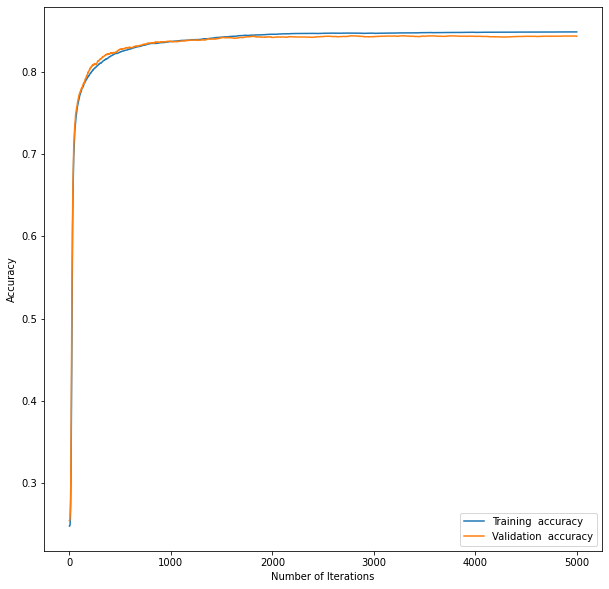

In [112]:
plt.figure(figsize=(10,10))
plt.plot(range(len(model.accuracy_history)), model.accuracy_history, label = "Training  accuracy" )
plt.plot(range(len(model.valid_accuracy_history)), model.valid_accuracy_history, label = "Validation  accuracy" )

plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("2a_acc_l1.png")
plt.show()

####  L1 regularization : Training and Validation Loss vs iteration

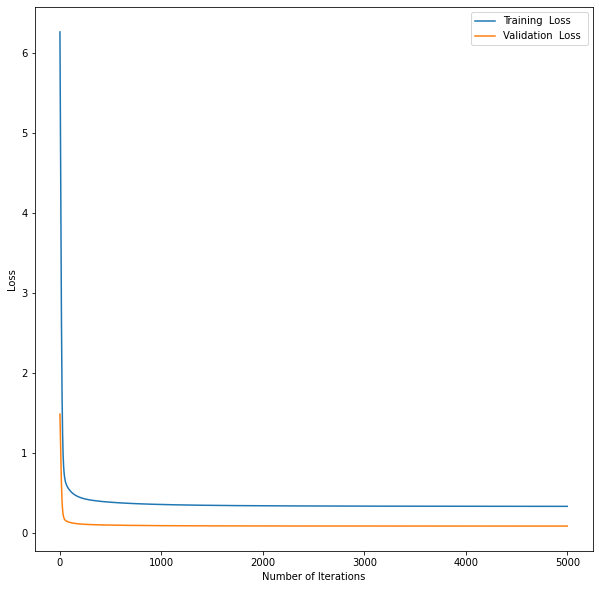

In [111]:
plt.figure(figsize=(10,10))
plt.plot(range(len(model.loss_history)), model.loss_history, label = "Training  Loss " )
plt.plot(range(len(model.valid_loss_history)), model.valid_loss_history, label = "Validation  Loss " )
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.savefig("2a_loss_l1.png")
# plt.show()

### Logisitic Regression model with L2 regularization

In [98]:
model2 = LogisticRegression(n_iter=5000,l_rate=0.1,regularization = "L2",reg_lambda = 0.01 )
model2.fit(np.array(X_train),np.array(Y_train),np.array(X_valid),np.array(Y_valid))

Iteration :  0 0.24762733640018236 6.264290213226291
Iteration :  1 0.247668780305856 6.004418461962845
Iteration :  2 0.2477102242115297 5.744850321051881
Iteration :  3 0.24783455592855072 5.4858635233663895
Iteration :  4 0.24795888764557172 5.227799613955766
Iteration :  5 0.24858054623067677 4.971080507673296
Iteration :  6 0.24969953168386588 4.716222820991107
Iteration :  7 0.25073562932570764 4.463848452718363
Iteration :  8 0.2532222636661279 4.214690061456641
Iteration :  9 0.25699365908243194 3.969590500961746
Iteration :  10 0.26138671308384104 3.729495742550507
Iteration :  11 0.2668987525384392 3.4954407534472707
Iteration :  12 0.27373699697459486 3.2685269403886226
Iteration :  13 0.2824402171660657 3.0498889602252475
Iteration :  14 0.29304985701852543 2.8406492810951276
Iteration :  15 0.3045712627958059 2.641861373732205
Iteration :  16 0.3182063077624435 2.4544462246339127
Iteration :  17 0.3359028554851009 2.2791306464702497
Iteration :  18 0.3557130423971155 2.116

Iteration :  166 0.7906253885366157 0.4573312517802855
Iteration :  167 0.7907497202536367 0.4566727198326969
Iteration :  168 0.7909154958763314 0.45602139839153216
Iteration :  169 0.7912884910273944 0.4553771869861048
Iteration :  170 0.7914957105557627 0.4547399865304867
Iteration :  171 0.7914957105557627 0.4541096993067375
Iteration :  172 0.7917443739898048 0.45348622894840357
Iteration :  173 0.7919930374238469 0.45286948042426173
Iteration :  174 0.7922417008578888 0.45225936002229405
Iteration :  175 0.7923245886692362 0.45165577533387213
Iteration :  176 0.7926561399146256 0.4510586352381456
Iteration :  177 0.7928219155373203 0.4504678498866149
Iteration :  178 0.793112022877036 0.4498833306878797
Iteration :  179 0.7934435741224253 0.44930499029255455
Iteration :  180 0.7936922375564673 0.4487327425783424
Iteration :  181 0.7937751253678147 0.4481665026352564
Iteration :  182 0.793858013179162 0.44760618675098557
Iteration :  183 0.7943138961415723 0.4470517123963964
Itera

Iteration :  318 0.8116788926188404 0.4035484918836814
Iteration :  319 0.8118446682415351 0.40335664438125285
Iteration :  320 0.8120104438642297 0.40316583310486825
Iteration :  321 0.8121762194869244 0.4029760473065105
Iteration :  322 0.8123005512039455 0.40278727638766504
Iteration :  323 0.8124248829209665 0.4025995098970026
Iteration :  324 0.8124248829209665 0.4024127375280924
Iteration :  325 0.8125077707323138 0.40222694911716184
Iteration :  326 0.8125077707323138 0.40204213464088756
Iteration :  327 0.8126321024493348 0.4018582842142179
Iteration :  328 0.8127564341663558 0.4016753880882412
Iteration :  329 0.8128393219777031 0.4014934366480762
Iteration :  330 0.8129222097890505 0.40131242041080956
Iteration :  331 0.8132123171287662 0.4011323300234527
Iteration :  332 0.8134195366571346 0.400953156260945
Iteration :  333 0.813626756185503 0.4007748900241798
Iteration :  334 0.8137096439968503 0.40059752233806845
Iteration :  335 0.8137925318081976 0.40042104434963005
Iter

Iteration :  475 0.8229516349620788 0.3817497676295761
Iteration :  476 0.8229516349620788 0.3816465873103667
Iteration :  477 0.8229516349620788 0.3815437148361508
Iteration :  478 0.8230345227734261 0.38144114853723154
Iteration :  479 0.8229930788677525 0.38133888675966665
Iteration :  480 0.8230759666790999 0.38123692786506685
Iteration :  481 0.8230759666790999 0.38113527023039995
Iteration :  482 0.8231588544904472 0.3810339122477958
Iteration :  483 0.8231588544904472 0.38093285232435875
Iteration :  484 0.8232002983961209 0.3808320888819759
Iteration :  485 0.8233246301131418 0.3807316203571351
Iteration :  486 0.8233660740188156 0.38063144520073894
Iteration :  487 0.8235732935471839 0.380531561877927
Iteration :  488 0.8236147374528575 0.3804319688678979
Iteration :  489 0.8236561813585312 0.38033266466373494
Iteration :  490 0.8237390691698786 0.38023364777223045
Iteration :  491 0.8237805130755522 0.3801349167137208
Iteration :  492 0.8237390691698786 0.38003647002191415
It

Iteration :  623 0.8290438890961084 0.36916466084819394
Iteration :  624 0.8290438890961084 0.36909454243073464
Iteration :  625 0.8290438890961084 0.36902458815277306
Iteration :  626 0.8290438890961084 0.36895479745641174
Iteration :  627 0.8291267769074557 0.36888516978687075
Iteration :  628 0.8291682208131295 0.3688157045924629
Iteration :  629 0.8291682208131295 0.368746401324565
Iteration :  630 0.8292511086244768 0.3686772594375867
Iteration :  631 0.8292925525301504 0.3686082783889513
Iteration :  632 0.8294168842471714 0.3685394576390596
Iteration :  633 0.8294168842471714 0.3684707966512714
Iteration :  634 0.8294168842471714 0.36840229489187387
Iteration :  635 0.8294583281528451 0.3683339518300587
Iteration :  636 0.8294997720585188 0.3682657669378963
Iteration :  637 0.8295412159641925 0.368197739690309
Iteration :  638 0.8296241037755399 0.368129869565047
Iteration :  639 0.8296655476812135 0.36806215604266546
Iteration :  640 0.8297069915868871 0.36799459860649697
Itera

Iteration :  782 0.8340171577769488 0.35977372745962505
Iteration :  783 0.8340171577769488 0.359724225412152
Iteration :  784 0.8339757138712752 0.35967482547533813
Iteration :  785 0.8340171577769488 0.35962552737504033
Iteration :  786 0.8340586016826226 0.359576330838115
Iteration :  787 0.8341000455882962 0.359527235592408
Iteration :  788 0.8341414894939699 0.3594782413667567
Iteration :  789 0.8341000455882962 0.3594293478909792
Iteration :  790 0.8341000455882962 0.35938055489587095
Iteration :  791 0.8341414894939699 0.3593318621131964
Iteration :  792 0.8341829333996436 0.3592832692756898
Iteration :  793 0.8343072651166646 0.35923477611704385
Iteration :  794 0.8343487090223383 0.3591863823719091
Iteration :  795 0.8344315968336856 0.3591380877758834
Iteration :  796 0.834514484645033 0.359089892065514
Iteration :  797 0.8344730407393592 0.35904179497828476
Iteration :  798 0.8345559285507066 0.35899379625261907
Iteration :  799 0.8346802602677277 0.3589458956278668
Iteratio

Iteration :  939 0.835882133532264 0.35309982554234054
Iteration :  940 0.8358406896265904 0.35306352231929056
Iteration :  941 0.8358406896265904 0.35302728775164915
Iteration :  942 0.835882133532264 0.352991121675024
Iteration :  943 0.8359235774379378 0.3529550239255097
Iteration :  944 0.8359650213436114 0.35291899433969026
Iteration :  945 0.8360479091549587 0.352883032754628
Iteration :  946 0.8360479091549587 0.352847139007873
Iteration :  947 0.8360479091549587 0.35281131293745127
Iteration :  948 0.8362136847776535 0.35277555438186914
Iteration :  949 0.8362136847776535 0.35273986318011047
Iteration :  950 0.8362965725890008 0.35270423917163013
Iteration :  951 0.8362965725890008 0.35266868219636127
Iteration :  952 0.8362551286833271 0.3526331920947035
Iteration :  953 0.8363794604003482 0.3525977687075273
Iteration :  954 0.8363794604003482 0.3525624118761732
Iteration :  955 0.8363380164946744 0.35252712144244286
Iteration :  956 0.8363794604003482 0.35249189724860674
Iter

Iteration :  1090 0.838161548344316 0.3483122290663193
Iteration :  1091 0.838161548344316 0.3482846716495197
Iteration :  1092 0.8382029922499896 0.34825716270738044
Iteration :  1093 0.8382029922499896 0.3482297021323944
Iteration :  1094 0.8382029922499896 0.3482022898173416
Iteration :  1095 0.8382029922499896 0.3481749256552916
Iteration :  1096 0.8382444361556634 0.34814760953959795
Iteration :  1097 0.838285880061337 0.3481203413638987
Iteration :  1098 0.8382444361556634 0.348093121022118
Iteration :  1099 0.8382444361556634 0.34806594840846034
Iteration :  1100 0.8382444361556634 0.3480388234174166
Iteration :  1101 0.8383273239670106 0.3480117459437544
Iteration :  1102 0.8383273239670106 0.3479847158825268
Iteration :  1103 0.8383273239670106 0.3479577331290619
Iteration :  1104 0.8383687678726843 0.3479307975789693
Iteration :  1105 0.8383687678726843 0.3479039091281353
Iteration :  1106 0.8383687678726843 0.34787706767272514
Iteration :  1107 0.8383687678726843 0.347850273

Iteration :  1240 0.8393219777031787 0.3446663839814882
Iteration :  1241 0.8393219777031787 0.3446450382458658
Iteration :  1242 0.8393634216088525 0.34462372763018334
Iteration :  1243 0.8393219777031787 0.3446024520614774
Iteration :  1244 0.8392805337975051 0.34458121146696663
Iteration :  1245 0.8393634216088525 0.34456000577405155
Iteration :  1246 0.8393219777031787 0.34453883491031123
Iteration :  1247 0.8393219777031787 0.3445176988035077
Iteration :  1248 0.8393219777031787 0.34449659738158034
Iteration :  1249 0.8393219777031787 0.3444755305726496
Iteration :  1250 0.8393219777031787 0.3444544983050135
Iteration :  1251 0.8393219777031787 0.34443350050714927
Iteration :  1252 0.8393219777031787 0.34441253710770897
Iteration :  1253 0.8393219777031787 0.34439160803552693
Iteration :  1254 0.8393219777031787 0.34437071321960716
Iteration :  1255 0.8393219777031787 0.34434985258913525
Iteration :  1256 0.8392390898918314 0.34432902607347043
Iteration :  1257 0.8392390898918314 

Iteration :  1395 0.8409797339301256 0.34173640317445536
Iteration :  1396 0.8410211778357992 0.34171972974175263
Iteration :  1397 0.8410211778357992 0.34170308200362165
Iteration :  1398 0.8410211778357992 0.34168645990989666
Iteration :  1399 0.8411040656471466 0.34166986341052785
Iteration :  1400 0.841062621741473 0.341653292455584
Iteration :  1401 0.841062621741473 0.34163674699524943
Iteration :  1402 0.841062621741473 0.34162022697982125
Iteration :  1403 0.8411040656471466 0.3416037323597206
Iteration :  1404 0.841062621741473 0.34158726308547993
Iteration :  1405 0.841062621741473 0.34157081910774345
Iteration :  1406 0.8411040656471466 0.341554400377277
Iteration :  1407 0.8411040656471466 0.3415380068449585
Iteration :  1408 0.8411455095528203 0.3415216384617811
Iteration :  1409 0.8411869534584939 0.3415052951788493
Iteration :  1410 0.8411869534584939 0.34148897694738506
Iteration :  1411 0.8411869534584939 0.34147268371872314
Iteration :  1412 0.8412283973641675 0.34145

Iteration :  1546 0.8427203779684197 0.33948374877551757
Iteration :  1547 0.8427203779684197 0.33947044699895385
Iteration :  1548 0.8427203779684197 0.33945716450971614
Iteration :  1549 0.8427618218740934 0.3394439012722392
Iteration :  1550 0.842803265779767 0.33943065725102245
Iteration :  1551 0.8427618218740934 0.3394174324106543
Iteration :  1552 0.8427618218740934 0.33940422671579734
Iteration :  1553 0.8428447096854408 0.3393910401311889
Iteration :  1554 0.8428447096854408 0.3393778726216519
Iteration :  1555 0.8428447096854408 0.33936472415208124
Iteration :  1556 0.8428447096854408 0.3393515946874502
Iteration :  1557 0.8428447096854408 0.33933848419280926
Iteration :  1558 0.8428861535911144 0.33932539263328654
Iteration :  1559 0.8428861535911144 0.3393123199740868
Iteration :  1560 0.8429275974967881 0.3392992661804916
Iteration :  1561 0.8429690414024618 0.33928623121785934
Iteration :  1562 0.8429690414024618 0.3392732150516229
Iteration :  1563 0.8429690414024618 0.3

Iteration :  1699 0.8442538024783456 0.3376536328803815
Iteration :  1700 0.8442538024783456 0.3376429103725222
Iteration :  1701 0.8442952463840192 0.33763220251727283
Iteration :  1702 0.8442952463840192 0.33762150928905127
Iteration :  1703 0.8443366902896929 0.33761083066232506
Iteration :  1704 0.8443366902896929 0.33760016661161824
Iteration :  1705 0.8443366902896929 0.33758951711150725
Iteration :  1706 0.8443366902896929 0.33757888213662024
Iteration :  1707 0.8443781341953666 0.3375682616616418
Iteration :  1708 0.8443781341953666 0.3375576556613045
Iteration :  1709 0.8443781341953666 0.33754706411039725
Iteration :  1710 0.8443781341953666 0.33753648698376276
Iteration :  1711 0.8443781341953666 0.33752592425629274
Iteration :  1712 0.8443781341953666 0.337515375902934
Iteration :  1713 0.8443781341953666 0.3375048418986852
Iteration :  1714 0.8443781341953666 0.33749432221859516
Iteration :  1715 0.8443781341953666 0.3374838168377676
Iteration :  1716 0.8444195781010403 0.

Iteration :  1853 0.8449997927804717 0.3361608426775734
Iteration :  1854 0.8449583488747979 0.3361521045350924
Iteration :  1855 0.8449583488747979 0.33614337766606844
Iteration :  1856 0.8449583488747979 0.33613466205182296
Iteration :  1857 0.8449169049691243 0.3361259576737189
Iteration :  1858 0.8449169049691243 0.3361172645131492
Iteration :  1859 0.8449583488747979 0.33610858255155196
Iteration :  1860 0.8449583488747979 0.3360999117703952
Iteration :  1861 0.8449583488747979 0.3360912521511888
Iteration :  1862 0.8449583488747979 0.33608260367547443
Iteration :  1863 0.8449583488747979 0.3360739663248366
Iteration :  1864 0.8449583488747979 0.3360653400808904
Iteration :  1865 0.8449169049691243 0.33605672492528926
Iteration :  1866 0.8449169049691243 0.33604812083972757
Iteration :  1867 0.8449169049691243 0.3360395278059285
Iteration :  1868 0.8449583488747979 0.336030945805655
Iteration :  1869 0.8449583488747979 0.336022374820709
Iteration :  1870 0.8449583488747979 0.33601

Iteration :  2008 0.8458286708939451 0.3349304136658617
Iteration :  2009 0.8458286708939451 0.33492322076658704
Iteration :  2010 0.8458286708939451 0.3349160366416233
Iteration :  2011 0.8458286708939451 0.33490886127715447
Iteration :  2012 0.8458286708939451 0.33490169465937897
Iteration :  2013 0.8458286708939451 0.3348945367745313
Iteration :  2014 0.8458286708939451 0.3348873876088643
Iteration :  2015 0.8457872269882714 0.3348802471486621
Iteration :  2016 0.8457872269882714 0.334873115380235
Iteration :  2017 0.8457872269882714 0.3348659922899141
Iteration :  2018 0.8457872269882714 0.33485887786405905
Iteration :  2019 0.8457872269882714 0.3348517720890579
Iteration :  2020 0.8457872269882714 0.33484467495132114
Iteration :  2021 0.8457872269882714 0.3348375864372859
Iteration :  2022 0.8457872269882714 0.3348305065334151
Iteration :  2023 0.8457872269882714 0.3348234352261983
Iteration :  2024 0.8457457830825977 0.3348163725021463
Iteration :  2025 0.8457457830825977 0.33480

Iteration :  2165 0.8464917733847238 0.3339004302585558
Iteration :  2166 0.8465332172903974 0.3338944609101166
Iteration :  2167 0.8465332172903974 0.333888498453044
Iteration :  2168 0.8465332172903974 0.33388254287700375
Iteration :  2169 0.8465332172903974 0.3338765941716715
Iteration :  2170 0.8465332172903974 0.3338706523267481
Iteration :  2171 0.8464917733847238 0.33386471733195106
Iteration :  2172 0.8464917733847238 0.3338587891770128
Iteration :  2173 0.8465332172903974 0.33385286785169327
Iteration :  2174 0.8465332172903974 0.3338469533457589
Iteration :  2175 0.8465332172903974 0.3338410456490044
Iteration :  2176 0.8465332172903974 0.3338351447512384
Iteration :  2177 0.8465332172903974 0.33382925064229024
Iteration :  2178 0.8465332172903974 0.333823363312002
Iteration :  2179 0.8465332172903974 0.33381748275024176
Iteration :  2180 0.8465746611960712 0.33381160894688944
Iteration :  2181 0.8465746611960712 0.3338057418918463
Iteration :  2182 0.8465746611960712 0.33379

Iteration :  2313 0.8468233246301131 0.3330867950914182
Iteration :  2314 0.8468233246301131 0.33308174236943633
Iteration :  2315 0.8467818807244395 0.3330766951924596
Iteration :  2316 0.8467818807244395 0.3330716535525281
Iteration :  2317 0.8467818807244395 0.3330666174416946
Iteration :  2318 0.8467818807244395 0.3330615868520264
Iteration :  2319 0.8467818807244395 0.3330565617756073
Iteration :  2320 0.8467818807244395 0.3330515422045274
Iteration :  2321 0.8467818807244395 0.3330465281308978
Iteration :  2322 0.8467818807244395 0.3330415195468442
Iteration :  2323 0.8468233246301131 0.3330365164444956
Iteration :  2324 0.8468233246301131 0.3330315188160037
Iteration :  2325 0.8468233246301131 0.3330265266535315
Iteration :  2326 0.8468233246301131 0.3330215399492557
Iteration :  2327 0.8468233246301131 0.33301655869536506
Iteration :  2328 0.8468233246301131 0.3330115828840611
Iteration :  2329 0.8468233246301131 0.3330066125075651
Iteration :  2330 0.8468233246301131 0.3330016

Iteration :  2466 0.8469062124414605 0.33237383168558493
Iteration :  2467 0.8469062124414605 0.3323695422668296
Iteration :  2468 0.8469062124414605 0.33236525732013117
Iteration :  2469 0.8469062124414605 0.3323609768393425
Iteration :  2470 0.8469062124414605 0.33235670081833113
Iteration :  2471 0.8469062124414605 0.3323524292509735
Iteration :  2472 0.8468233246301131 0.3323481621311529
Iteration :  2473 0.8468233246301131 0.33234389945276493
Iteration :  2474 0.8468233246301131 0.3323396412097176
Iteration :  2475 0.8468233246301131 0.33233538739592455
Iteration :  2476 0.8468233246301131 0.3323311380053117
Iteration :  2477 0.8467818807244395 0.3323268930318172
Iteration :  2478 0.8467818807244395 0.3323226524693885
Iteration :  2479 0.8467818807244395 0.33231841631197445
Iteration :  2480 0.8467818807244395 0.33231418455355044
Iteration :  2481 0.8467818807244395 0.3323099571880854
Iteration :  2482 0.8467818807244395 0.33230573420956777
Iteration :  2483 0.8467818807244395 0.3

Iteration :  2619 0.8472377636868499 0.3317661662348476
Iteration :  2620 0.8472377636868499 0.33176249513489886
Iteration :  2621 0.8472377636868499 0.33175882767446335
Iteration :  2622 0.8471963197811762 0.33175516384874476
Iteration :  2623 0.8471963197811762 0.33175150365295963
Iteration :  2624 0.8471963197811762 0.3317478470823244
Iteration :  2625 0.8471548758755025 0.33174419413206846
Iteration :  2626 0.8471548758755025 0.3317405447974307
Iteration :  2627 0.8471548758755025 0.33173689907365306
Iteration :  2628 0.8471963197811762 0.3317332569559862
Iteration :  2629 0.8471963197811762 0.33172961843968835
Iteration :  2630 0.8471963197811762 0.33172598352002636
Iteration :  2631 0.8471963197811762 0.33172235219227336
Iteration :  2632 0.8471963197811762 0.33171872445171396
Iteration :  2633 0.8471963197811762 0.3317151002936302
Iteration :  2634 0.8471963197811762 0.3317114797133213
Iteration :  2635 0.8471963197811762 0.33170786270609426
Iteration :  2636 0.8471963197811762 

Iteration :  2774 0.8473620954038709 0.33123783175869537
Iteration :  2775 0.8473620954038709 0.3312346718889161
Iteration :  2776 0.8473620954038709 0.3312315149984307
Iteration :  2777 0.8474035393095445 0.33122836108347387
Iteration :  2778 0.8474035393095445 0.3312252101402847
Iteration :  2779 0.8474035393095445 0.3312220621651045
Iteration :  2780 0.8474035393095445 0.3312189171541899
Iteration :  2781 0.8473206514981972 0.33121577510379363
Iteration :  2782 0.8473206514981972 0.3312126360101815
Iteration :  2783 0.8473206514981972 0.3312094998696203
Iteration :  2784 0.8473206514981972 0.33120636667838177
Iteration :  2785 0.8473206514981972 0.3312032364327504
Iteration :  2786 0.8473206514981972 0.33120010912900466
Iteration :  2787 0.8473206514981972 0.33119698476344267
Iteration :  2788 0.8473206514981972 0.3311938633323556
Iteration :  2789 0.8473206514981972 0.33119074483204647
Iteration :  2790 0.8473206514981972 0.3311876292588252
Iteration :  2791 0.8473206514981972 0.33

Iteration :  2927 0.8470719880641552 0.33078693042310964
Iteration :  2928 0.8470719880641552 0.3307841857440562
Iteration :  2929 0.8471134319698288 0.33078144352933486
Iteration :  2930 0.8471134319698288 0.3307787037759511
Iteration :  2931 0.8470719880641552 0.3307759664809146
Iteration :  2932 0.8470719880641552 0.33077323164124
Iteration :  2933 0.8470719880641552 0.33077049925394564
Iteration :  2934 0.8470719880641552 0.33076776931605606
Iteration :  2935 0.8471134319698288 0.3307650418245949
Iteration :  2936 0.8471134319698288 0.33076231677659645
Iteration :  2937 0.8470719880641552 0.3307595941690956
Iteration :  2938 0.8470719880641552 0.33075687399913184
Iteration :  2939 0.8470719880641552 0.3307541562637499
Iteration :  2940 0.8470719880641552 0.33075144096000275
Iteration :  2941 0.8470719880641552 0.33074872808493916
Iteration :  2942 0.8470719880641552 0.33074601763561934
Iteration :  2943 0.8470719880641552 0.33074330960910575
Iteration :  2944 0.8470719880641552 0.3

Iteration :  3078 0.8470305441584814 0.3303987951917362
Iteration :  3079 0.8470305441584814 0.3303963910388057
Iteration :  3080 0.8470305441584814 0.3303939889438902
Iteration :  3081 0.8470305441584814 0.3303915889045848
Iteration :  3082 0.8470305441584814 0.3303891909184842
Iteration :  3083 0.8470305441584814 0.33038679498318196
Iteration :  3084 0.8470305441584814 0.3303844010962903
Iteration :  3085 0.8470305441584814 0.33038200925540456
Iteration :  3086 0.8470305441584814 0.33037961945814076
Iteration :  3087 0.8470305441584814 0.3303772317021105
Iteration :  3088 0.8470305441584814 0.3303748459849261
Iteration :  3089 0.8470305441584814 0.3303724623042111
Iteration :  3090 0.8470305441584814 0.3303700806575844
Iteration :  3091 0.8470305441584814 0.330367701042674
Iteration :  3092 0.8470305441584814 0.33036532345710806
Iteration :  3093 0.8470305441584814 0.33036294789852094
Iteration :  3094 0.8470305441584814 0.330360574364548
Iteration :  3095 0.8470719880641552 0.330358

Iteration :  3228 0.8473620954038709 0.330059909065083
Iteration :  3229 0.8473620954038709 0.330057788479734
Iteration :  3230 0.8473620954038709 0.3300556696264548
Iteration :  3231 0.8473620954038709 0.33005355250329477
Iteration :  3232 0.8473620954038709 0.33005143710830054
Iteration :  3233 0.8474035393095445 0.33004932343952714
Iteration :  3234 0.8474035393095445 0.33004721149502664
Iteration :  3235 0.8474035393095445 0.33004510127285375
Iteration :  3236 0.8474035393095445 0.3300429927710741
Iteration :  3237 0.8474035393095445 0.33004088598774894
Iteration :  3238 0.8474864271208918 0.33003878092094135
Iteration :  3239 0.8474449832152182 0.33003667756872046
Iteration :  3240 0.8474449832152182 0.3300345759291547
Iteration :  3241 0.8474449832152182 0.33003247600032126
Iteration :  3242 0.8474449832152182 0.3300303777802935
Iteration :  3243 0.8474449832152182 0.3300282812671489
Iteration :  3244 0.8474449832152182 0.3300261864589727
Iteration :  3245 0.8474449832152182 0.33

Iteration :  3379 0.8475278710265656 0.32975827084826176
Iteration :  3380 0.8475278710265656 0.32975639110464533
Iteration :  3381 0.8475278710265656 0.3297545128261993
Iteration :  3382 0.8475278710265656 0.32975263601133664
Iteration :  3383 0.8475278710265656 0.32975076065845904
Iteration :  3384 0.8475278710265656 0.3297488867659838
Iteration :  3385 0.8475278710265656 0.3297470143323179
Iteration :  3386 0.8475278710265656 0.32974514335587907
Iteration :  3387 0.8475278710265656 0.3297432738350853
Iteration :  3388 0.8475278710265656 0.32974140576835276
Iteration :  3389 0.8475278710265656 0.32973953915410664
Iteration :  3390 0.8475278710265656 0.3297376739907661
Iteration :  3391 0.8475278710265656 0.3297358102767588
Iteration :  3392 0.8475278710265656 0.32973394801051076
Iteration :  3393 0.8475278710265656 0.3297320871904541
Iteration :  3394 0.8475278710265656 0.32973022781501893
Iteration :  3395 0.8475278710265656 0.3297283698826402
Iteration :  3396 0.8475278710265656 0.

Iteration :  3525 0.8479008661776286 0.32949856427966584
Iteration :  3526 0.8479008661776286 0.3294968826013296
Iteration :  3527 0.8479008661776286 0.32949520217632633
Iteration :  3528 0.8479008661776286 0.32949352300333545
Iteration :  3529 0.8478594222719549 0.32949184508104373
Iteration :  3530 0.8478594222719549 0.3294901684081343
Iteration :  3531 0.8478594222719549 0.32948849298330235
Iteration :  3532 0.8478594222719549 0.3294868188052306
Iteration :  3533 0.8479008661776286 0.32948514587261357
Iteration :  3534 0.8479008661776286 0.3294834741841466
Iteration :  3535 0.8479008661776286 0.3294818037385237
Iteration :  3536 0.8479008661776286 0.3294801345344381
Iteration :  3537 0.8479423100833022 0.32947846657059404
Iteration :  3538 0.8479423100833022 0.32947679984568384
Iteration :  3539 0.8479423100833022 0.32947513435841647
Iteration :  3540 0.8479008661776286 0.3294734701074932
Iteration :  3541 0.8478179783662813 0.3294718070916181
Iteration :  3542 0.8478179783662813 0.

Iteration :  3684 0.8479008661776286 0.32924609637461066
Iteration :  3685 0.8479008661776286 0.3292445984867846
Iteration :  3686 0.8479008661776286 0.3292431016626211
Iteration :  3687 0.8478594222719549 0.3292416059010472
Iteration :  3688 0.8478594222719549 0.32924011120098706
Iteration :  3689 0.8479423100833022 0.3292386175613666
Iteration :  3690 0.8479423100833022 0.3292371249811125
Iteration :  3691 0.8479423100833022 0.32923563345915463
Iteration :  3692 0.8479423100833022 0.32923414299441994
Iteration :  3693 0.8479423100833022 0.3292326535858406
Iteration :  3694 0.8479423100833022 0.32923116523235174
Iteration :  3695 0.8479423100833022 0.32922967793288843
Iteration :  3696 0.847983753988976 0.3292281916863774
Iteration :  3697 0.847983753988976 0.3292267064917646
Iteration :  3698 0.847983753988976 0.3292252223479847
Iteration :  3699 0.847983753988976 0.32922373925397547
Iteration :  3700 0.847983753988976 0.32922225720867715
Iteration :  3701 0.847983753988976 0.3292207

Iteration :  3841 0.8479423100833022 0.3290233036099365
Iteration :  3842 0.8479423100833022 0.3290219603344525
Iteration :  3843 0.8479423100833022 0.32902061796883825
Iteration :  3844 0.8479423100833022 0.32901927651220975
Iteration :  3845 0.8479423100833022 0.32901793596367457
Iteration :  3846 0.8479423100833022 0.32901659632234953
Iteration :  3847 0.8479423100833022 0.3290152575873472
Iteration :  3848 0.8479423100833022 0.3290139197577878
Iteration :  3849 0.8479423100833022 0.32901258283278484
Iteration :  3850 0.8479423100833022 0.3290112468114565
Iteration :  3851 0.8479423100833022 0.329009911692925
Iteration :  3852 0.8479423100833022 0.32900857747630813
Iteration :  3853 0.8479423100833022 0.3290072441607262
Iteration :  3854 0.8479423100833022 0.3290059117453059
Iteration :  3855 0.8479423100833022 0.32900458022916834
Iteration :  3856 0.8479423100833022 0.32900324961143806
Iteration :  3857 0.8479423100833022 0.3290019198912384
Iteration :  3858 0.8479423100833022 0.32

Iteration :  3994 0.8482324174230179 0.3288278651542863
Iteration :  3995 0.8482324174230179 0.3288266513564157
Iteration :  3996 0.8482324174230179 0.32882543834414796
Iteration :  3997 0.8482324174230179 0.32882422611674345
Iteration :  3998 0.8482324174230179 0.32882301467346015
Iteration :  3999 0.8481909735173443 0.32882180401356026
Iteration :  4000 0.8481909735173443 0.32882059413630765
Iteration :  4001 0.8481909735173443 0.3288193850409634
Iteration :  4002 0.8481909735173443 0.3288181767267906
Iteration :  4003 0.8481909735173443 0.32881696919305714
Iteration :  4004 0.8481909735173443 0.3288157624390268
Iteration :  4005 0.8481909735173443 0.32881455646396784
Iteration :  4006 0.8481495296116706 0.32881335126714273
Iteration :  4007 0.8481495296116706 0.32881214684782434
Iteration :  4008 0.8481495296116706 0.3288109432052798
Iteration :  4009 0.8481495296116706 0.32880974033878074
Iteration :  4010 0.8481495296116706 0.328808538247596
Iteration :  4011 0.8481495296116706 0.

Iteration :  4149 0.848356749140039 0.32864867122175206
Iteration :  4150 0.848356749140039 0.3286475708569147
Iteration :  4151 0.848356749140039 0.3286464711725817
Iteration :  4152 0.8483153052343653 0.32864537216813644
Iteration :  4153 0.8483153052343653 0.32864427384296124
Iteration :  4154 0.8483153052343653 0.32864317619643535
Iteration :  4155 0.8483153052343653 0.3286420792279426
Iteration :  4156 0.8483153052343653 0.32864098293686916
Iteration :  4157 0.8483153052343653 0.3286398873225976
Iteration :  4158 0.8483153052343653 0.32863879238451255
Iteration :  4159 0.8482738613286916 0.32863769812200366
Iteration :  4160 0.8482738613286916 0.32863660453445126
Iteration :  4161 0.8483153052343653 0.32863551162124655
Iteration :  4162 0.8483153052343653 0.3286344193817783
Iteration :  4163 0.8483153052343653 0.3286333278154319
Iteration :  4164 0.8482738613286916 0.32863223692159754
Iteration :  4165 0.8482738613286916 0.32863114669966764
Iteration :  4166 0.8483153052343653 0.3

Iteration :  4301 0.8482738613286916 0.3284888845113446
Iteration :  4302 0.8482738613286916 0.3284878808639011
Iteration :  4303 0.8482738613286916 0.3284868778104435
Iteration :  4304 0.8482738613286916 0.3284858753504426
Iteration :  4305 0.8482738613286916 0.3284848734833781
Iteration :  4306 0.8482738613286916 0.3284838722087347
Iteration :  4307 0.8482738613286916 0.32848287152598465
Iteration :  4308 0.8482738613286916 0.3284818714346113
Iteration :  4309 0.8482738613286916 0.32848087193409636
Iteration :  4310 0.8482738613286916 0.3284798730239227
Iteration :  4311 0.8482738613286916 0.3284788747035678
Iteration :  4312 0.8482738613286916 0.3284778769725156
Iteration :  4313 0.8482738613286916 0.32847687983025337
Iteration :  4314 0.8482738613286916 0.32847588327626026
Iteration :  4315 0.8482738613286916 0.32847488731002467
Iteration :  4316 0.8483153052343653 0.32847389193102716
Iteration :  4317 0.8483153052343653 0.32847289713875855
Iteration :  4318 0.8483153052343653 0.32

Iteration :  4453 0.84848108085706 0.32834285899284527
Iteration :  4454 0.84848108085706 0.32834193995613553
Iteration :  4455 0.84848108085706 0.3283410214402848
Iteration :  4456 0.84848108085706 0.3283401034448469
Iteration :  4457 0.84848108085706 0.3283391859693856
Iteration :  4458 0.84848108085706 0.32833826901345825
Iteration :  4459 0.84848108085706 0.3283373525766185
Iteration :  4460 0.84848108085706 0.32833643665843304
Iteration :  4461 0.84848108085706 0.3283355212584578
Iteration :  4462 0.84848108085706 0.32833460637625633
Iteration :  4463 0.84848108085706 0.3283336920113855
Iteration :  4464 0.84848108085706 0.3283327781634125
Iteration :  4465 0.84848108085706 0.32833186483189525
Iteration :  4466 0.84848108085706 0.3283309520163962
Iteration :  4467 0.84848108085706 0.3283300397164827
Iteration :  4468 0.84848108085706 0.3283291279317126
Iteration :  4469 0.84848108085706 0.32832821666165113
Iteration :  4470 0.84848108085706 0.3283273059058685
Iteration :  4471 0.8

Iteration :  4606 0.848605412574081 0.32820805415466936
Iteration :  4607 0.848605412574081 0.32820720993291896
Iteration :  4608 0.848605412574081 0.3282063661695636
Iteration :  4609 0.848605412574081 0.32820552286423044
Iteration :  4610 0.8485639686684073 0.3282046800165397
Iteration :  4611 0.8485639686684073 0.32820383762612354
Iteration :  4612 0.8485639686684073 0.3282029956926005
Iteration :  4613 0.8485639686684073 0.32820215421560184
Iteration :  4614 0.8485639686684073 0.32820131319474977
Iteration :  4615 0.8485639686684073 0.3282004726296707
Iteration :  4616 0.8485639686684073 0.32819963251999323
Iteration :  4617 0.8485639686684073 0.32819879286534326
Iteration :  4618 0.8485639686684073 0.32819795366534865
Iteration :  4619 0.8485639686684073 0.32819711491963616
Iteration :  4620 0.8485639686684073 0.3281962766278371
Iteration :  4621 0.8485639686684073 0.3281954387895791
Iteration :  4622 0.8485639686684073 0.32819460140449147
Iteration :  4623 0.8485639686684073 0.32

Iteration :  4758 0.8485639686684073 0.3280847854142929
Iteration :  4759 0.8485225247627336 0.32808400677044297
Iteration :  4760 0.8485225247627336 0.32808322853209937
Iteration :  4761 0.8485225247627336 0.3280824506989399
Iteration :  4762 0.8485225247627336 0.32808167327064225
Iteration :  4763 0.8485225247627336 0.3280808962468878
Iteration :  4764 0.8485225247627336 0.3280801196273548
Iteration :  4765 0.8485225247627336 0.32807934341172246
Iteration :  4766 0.8485225247627336 0.32807856759967274
Iteration :  4767 0.8485225247627336 0.32807779219088523
Iteration :  4768 0.8485225247627336 0.32807701718503973
Iteration :  4769 0.8485639686684073 0.3280762425818208
Iteration :  4770 0.8485639686684073 0.3280754683809088
Iteration :  4771 0.8485225247627336 0.32807469458198335
Iteration :  4772 0.8485225247627336 0.3280739211847285
Iteration :  4773 0.8485225247627336 0.32807314818882577
Iteration :  4774 0.8485225247627336 0.3280723755939624
Iteration :  4775 0.8485225247627336 0.

Iteration :  4906 0.848729744291102 0.32797379316112785
Iteration :  4907 0.8486883003854283 0.32797307120244157
Iteration :  4908 0.8486883003854283 0.3279723496050594
Iteration :  4909 0.8486883003854283 0.3279716283687089
Iteration :  4910 0.8486883003854283 0.32797090749311414
Iteration :  4911 0.8486883003854283 0.3279701869779948
Iteration :  4912 0.8486883003854283 0.3279694668230753
Iteration :  4913 0.848729744291102 0.32796874702808465
Iteration :  4914 0.848729744291102 0.32796802759274196
Iteration :  4915 0.8486883003854283 0.32796730851677386
Iteration :  4916 0.8486883003854283 0.327966589799906
Iteration :  4917 0.8486883003854283 0.3279658714418625
Iteration :  4918 0.8486883003854283 0.3279651534423723
Iteration :  4919 0.8486883003854283 0.32796443580115464
Iteration :  4920 0.8486468564797547 0.3279637185179403
Iteration :  4921 0.8486468564797547 0.3279630015924561
Iteration :  4922 0.8486468564797547 0.327962285024425
Iteration :  4923 0.8486468564797547 0.3279615

####  L2 regularization : Training Accuracy

In [99]:
predict_train = model2.predict(X_train)
my_accuracy_score(Y_train,predict_train)

0.848729744291102

####  L2 regularization : Validaiton Accuracy

In [104]:
predict_valid = model2.predict(X_valid)
my_accuracy_score(Y_valid,predict_valid)

####  L2 regularization : Testing Accuracy

In [101]:
predict_test = model2.predict(X_test)
my_accuracy_score(Y_test,predict_test)

0.847543160690571

####  L2 regularization : Training and Validation Accuracy vs iteration

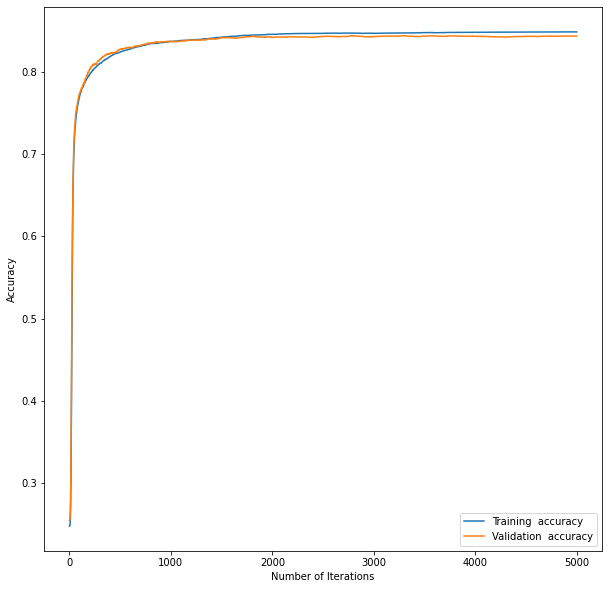

In [109]:
plt.figure(figsize=(10,10))
plt.plot(range(len(model2.accuracy_history)), model2.accuracy_history, label = "Training  accuracy" )
plt.plot(range(len(model2.valid_accuracy_history)), model2.valid_accuracy_history, label = "Validation  accuracy" )
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("2a_acc_l2.png")
plt.show()


####  L2 regularization : Training and Validation Accuracy vs iteration

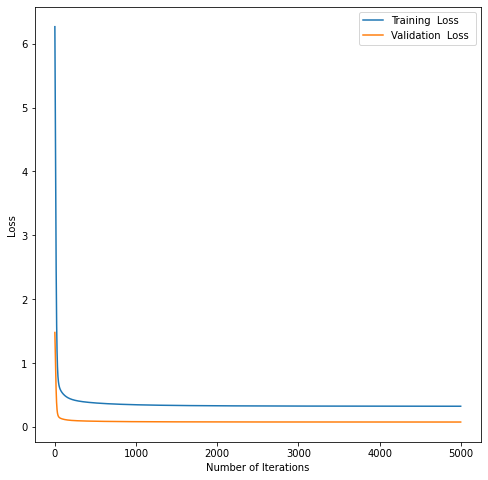

In [110]:
plt.figure(figsize=(8,8))
plt.plot(range(len(model2.loss_history)), model2.loss_history, label = "Training  Loss " )
plt.plot(range(len(model2.valid_loss_history)), model2.valid_loss_history, label = "Validation  Loss " )
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.savefig("2a_loss_l2.png")
# plt.show()

### Checking if weights of both the model are comparable :

In [108]:
# for i in range(model.wt.shape[0]):
#     print(model.wt[i],model2.wt[i])

[-3.54338152] [-3.5425781]
[0.78586686] [0.78577945]
[0.12136626] [0.12136441]
[0.27172966] [0.27167303]
[0.47113602] [0.47110236]
[-0.22590132] [-0.22596293]
[0.08117683] [0.08120118]
[0.94997318] [0.94977827]
[0.88760435] [0.88744538]
[0.64490271] [0.64479921]
[0.74722236] [0.74708959]
[0.98572979] [0.98553212]
[0.87783415] [0.87766725]
[0.8164876] [0.81634048]
[0.79189565] [0.79174864]
[0.25979182] [0.25977518]
[0.49995813] [0.49989938]
[0.5498588] [0.54979632]
[0.7341559] [0.73404377]
[0.59147285] [0.59136534]
[0.60392127] [0.6038615]
[0.95661625] [0.95641976]
[0.89524249] [0.89511344]
[0.61040279] [0.61030925]
[-0.06717581] [-0.06732282]
[1.04926083] [1.0490452]
[1.0791412] [1.07897641]
[0.4084197] [0.40836266]
[-0.60306795] [-0.60315608]
[0.23290306] [0.2328734]
[0.35622205] [0.35615701]
[0.5439552] [0.54384494]
[0.97322813] [0.97302777]
[0.70215741] [0.70203189]
[1.37991288] [1.37974202]
[-0.11333139] [-0.1133996]
[0.20450929] [0.2044741]
[0.32895074] [0.32888278]
[-0.18083082] 

In [58]:
model_x = LogisticRegression(n_iter=20000,l_rate=0.01 )
model_x.fit(np.array(X_train),np.array(Y_train),np.array(X_valid),np.array(Y_valid))

Iteration :  0 0.24762733640018236 6.264247205543539
Iteration :  1 0.24762733640018236 6.238262537451871
Iteration :  2 0.247668780305856 6.212279112223731
Iteration :  3 0.247668780305856 6.186297157467408
Iteration :  4 0.247668780305856 6.16031690433658
Iteration :  5 0.247668780305856 6.1343385876998076
Iteration :  6 0.247668780305856 6.10836244631139
Iteration :  7 0.247668780305856 6.08238872298398
Iteration :  8 0.247668780305856 6.056417664759854
Iteration :  9 0.247668780305856 6.030449523083038
Iteration :  10 0.247668780305856 6.004484553973996
Iteration :  11 0.247668780305856 5.978523018203351
Iteration :  12 0.247668780305856 5.952565181465425
Iteration :  13 0.247668780305856 5.926611314554154
Iteration :  14 0.2477102242115297 5.90066169353453
Iteration :  15 0.2477102242115297 5.874716599921658
Iteration :  16 0.2477102242115297 5.848776320849879
Iteration :  17 0.2477102242115297 5.822841149249938
Iteration :  18 0.2477102242115297 5.796911384022745
Iteration :  19 

Iteration :  159 0.3154295660823076 2.486520705471984
Iteration :  160 0.31663143934684407 2.468467781799792
Iteration :  161 0.31812341995109616 2.4505349634602642
Iteration :  162 0.3196154005553483 2.432722785662817
Iteration :  163 0.32143893240498983 2.4150317589536687
Iteration :  164 0.32301380082058934 2.3974623689195407
Iteration :  165 0.32454722533051517 2.3800150759136693
Iteration :  166 0.326329313274483 2.362690314808563
Iteration :  167 0.3280285134071035 2.345488494769787
Iteration :  168 0.32993493306809235 2.3284099990582767
Iteration :  169 0.33179990882340754 2.3114551848538682
Iteration :  170 0.33370632848439635 2.294624383107304
Iteration :  171 0.3352397529943222 2.2779178984154322
Iteration :  172 0.33764349952339506 2.2613360089230126
Iteration :  173 0.3394670313730366 2.244878966249507
Iteration :  174 0.3410418997886361 2.228546995441681
Iteration :  175 0.34274109992125656 2.21234029495126
Iteration :  176 0.3440258609971404 2.1962590366382533
Iteration :

Iteration :  309 0.6045008081561606 1.000218804000697
Iteration :  310 0.6059927887604127 0.9962258685307458
Iteration :  311 0.6074433254589913 0.9922769441377232
Iteration :  312 0.6092668573086327 0.9883715060256045
Iteration :  313 0.6103858427618218 0.9845090350560535
Iteration :  314 0.6113390525923162 0.9806890177190126
Iteration :  315 0.6120021550830951 0.9769109461023675
Iteration :  316 0.6134526917816735 0.9731743178601208
Iteration :  317 0.6148203406689047 0.9694786361798814
Iteration :  318 0.6159393261220938 0.9658234097492685
Iteration :  319 0.6168510920469145 0.9622081527211879
Iteration :  320 0.6179700775001036 0.9586323846785056
Iteration :  321 0.618923287330598 0.9550956305978114
Iteration :  322 0.6200008288781135 0.9515974208122885
Iteration :  323 0.6209954826142816 0.9481372909740513
Iteration :  324 0.6219901363504496 0.9447147820156031
Iteration :  325 0.6232334535206598 0.9413294401109008
Iteration :  326 0.6239379999171122 0.9379808166356108
Iteration : 

Iteration :  469 0.7098512163786316 0.6863665288870919
Iteration :  470 0.7103485432467156 0.6855110358108242
Iteration :  471 0.7104728749637366 0.6846621742580916
Iteration :  472 0.7108458701147996 0.6838198715724965
Iteration :  473 0.7113431969828836 0.6829840559813386
Iteration :  474 0.71130175307721 0.6821546565841798
Iteration :  475 0.711674748228273 0.6813316033415224
Iteration :  476 0.7120062994736625 0.6805148270636615
Iteration :  477 0.7125450702474201 0.6797042593997132
Iteration :  478 0.7132496166438725 0.6788998328267275
Iteration :  479 0.7133739483608935 0.6781014806390199
Iteration :  480 0.7136226117949356 0.6773091369375688
Iteration :  481 0.7139541630403249 0.6765227366196416
Iteration :  482 0.7143271581913879 0.6757422153684842
Iteration :  483 0.7146587094367773 0.6749675096431909
Iteration :  484 0.7147415972481247 0.6741985566687017
Iteration :  485 0.7150317045878404 0.6734352944259321
Iteration :  486 0.7154046997389034 0.6726776616420391
Iteration :  

Iteration :  630 0.7419702432757264 0.6011686906531798
Iteration :  631 0.7420116871814 0.6008348509166095
Iteration :  632 0.742260350615442 0.6005023698125673
Iteration :  633 0.7424261262381366 0.6001712357672888
Iteration :  634 0.7427576774835261 0.5998414373291213
Iteration :  635 0.7429234531062208 0.5995129631671337
Iteration :  636 0.7429648970118944 0.5991858020697332
Iteration :  637 0.7431306726345891 0.5988599429433129
Iteration :  638 0.7432135604459364 0.5985353748109093
Iteration :  639 0.7432964482572838 0.5982120868108731
Iteration :  640 0.7434622238799784 0.5978900681955588
Iteration :  641 0.7438766629367152 0.5975693083300347
Iteration :  642 0.7440009946537361 0.5972497966908022
Iteration :  643 0.7442082141821045 0.5969315228645318
Iteration :  644 0.7442911019934518 0.5966144765468183
Iteration :  645 0.7443325458991256 0.5962986475409447
Iteration :  646 0.7446226532388412 0.5959840257566696
Iteration :  647 0.7447055410501886 0.595670601209023
Iteration :  64

Iteration :  785 0.7577603713373948 0.5606770248905278
Iteration :  786 0.7578432591487422 0.5604666497846912
Iteration :  787 0.7578847030544158 0.5602567279723366
Iteration :  788 0.7579675908657632 0.5600472569593287
Iteration :  789 0.7579675908657632 0.5598382342742426
Iteration :  790 0.7579261469600895 0.5596296574681364
Iteration :  791 0.7579675908657632 0.5594215241143139
Iteration :  792 0.7580504786771105 0.5592138318081035
Iteration :  793 0.7580504786771105 0.5590065781666275
Iteration :  794 0.7580919225827842 0.5587997608285813
Iteration :  795 0.7581333664884579 0.5585933774540093
Iteration :  796 0.7582162542998052 0.5583874257240883
Iteration :  797 0.7581748103941316 0.5581819033409137
Iteration :  798 0.7583405860168262 0.5579768080272789
Iteration :  799 0.7585063616395209 0.5577721375264711
Iteration :  800 0.7585892494508683 0.5575678896020552
Iteration :  801 0.7585892494508683 0.5573640620376721
Iteration :  802 0.7587135811678892 0.5571606526368309
Iteration 

Iteration :  946 0.7671681379253181 0.5314014863693729
Iteration :  947 0.7672510257366654 0.5312428169609633
Iteration :  948 0.7672510257366654 0.5310843821100945
Iteration :  949 0.7672510257366654 0.5309261811388415
Iteration :  950 0.7672095818309917 0.5307682133738759
Iteration :  951 0.7673753574536865 0.5306104781464203
Iteration :  952 0.7674582452650338 0.5304529747922083
Iteration :  953 0.7674582452650338 0.5302957026514417
Iteration :  954 0.7675411330763812 0.5301386610687425
Iteration :  955 0.7676240208877284 0.5299818493931202
Iteration :  956 0.7677069086990758 0.5298252669779225
Iteration :  957 0.7678312404160968 0.5296689131807994
Iteration :  958 0.7679555721331178 0.5295127873636594
Iteration :  959 0.7679141282274442 0.5293568888926317
Iteration :  960 0.7680799038501388 0.5292012171380248
Iteration :  961 0.7682042355671599 0.5290457714742877
Iteration :  962 0.7682456794728335 0.5288905512799708
Iteration :  963 0.7682456794728335 0.5287355559376885
Iteration 

Iteration :  1106 0.7744622653238841 0.5086364628655751
Iteration :  1107 0.7745865970409052 0.5085089155290992
Iteration :  1108 0.7745865970409052 0.5083815321994856
Iteration :  1109 0.7746280409465788 0.5082543125854061
Iteration :  1110 0.7747109287579261 0.5081272563966369
Iteration :  1111 0.7746694848522525 0.5080003633440497
Iteration :  1112 0.7748352604749471 0.5078736331396021
Iteration :  1113 0.7748767043806208 0.5077470654963309
Iteration :  1114 0.7749595921919682 0.5076206601283386
Iteration :  1115 0.7750010360976418 0.5074944167507923
Iteration :  1116 0.7751668117203365 0.5073683350799091
Iteration :  1117 0.7751253678146629 0.5072424148329495
Iteration :  1118 0.7751253678146629 0.5071166557282102
Iteration :  1119 0.7751253678146629 0.5069910574850159
Iteration :  1120 0.7752496995316839 0.5068656198237086
Iteration :  1121 0.7753325873430312 0.5067403424656421
Iteration :  1122 0.7752496995316839 0.5066152251331737
Iteration :  1123 0.7752911434373575 0.506490267

Iteration :  1261 0.78051307555224 0.4906672979343608
Iteration :  1262 0.7805959633635874 0.4905622094374246
Iteration :  1263 0.7805959633635874 0.49045724908795496
Iteration :  1264 0.780637407269261 0.49035241669732893
Iteration :  1265 0.7807202950806084 0.4902477120773126
Iteration :  1266 0.7807617389862821 0.4901431350400562
Iteration :  1267 0.7807617389862821 0.4900386853980959
Iteration :  1268 0.7807617389862821 0.4899343629643492
Iteration :  1269 0.7808031828919557 0.4898301675521135
Iteration :  1270 0.7807617389862821 0.4897260989750642
Iteration :  1271 0.7808031828919557 0.48962215704725326
Iteration :  1272 0.7807617389862821 0.48951834158310725
Iteration :  1273 0.7808446267976294 0.48941465239742393
Iteration :  1274 0.7808446267976294 0.48931108930537304
Iteration :  1275 0.7808860707033031 0.48920765212249223
Iteration :  1276 0.7808446267976294 0.48910434066468517
Iteration :  1277 0.7808031828919557 0.48900115474822253
Iteration :  1278 0.7808446267976294 0.488

Iteration :  1416 0.7845331344025861 0.4758010411095191
Iteration :  1417 0.7846160222139335 0.4757137640844732
Iteration :  1418 0.7846160222139335 0.4756265896996545
Iteration :  1419 0.7846160222139335 0.4755395178105377
Iteration :  1420 0.7845745783082597 0.4754525482728139
Iteration :  1421 0.7846160222139335 0.47536568094239035
Iteration :  1422 0.7846160222139335 0.47527891567538855
Iteration :  1423 0.7846160222139335 0.47519225232814616
Iteration :  1424 0.7846989100252808 0.4751056907572132
Iteration :  1425 0.7846989100252808 0.47501923081935626
Iteration :  1426 0.7846989100252808 0.4749328723715523
Iteration :  1427 0.7847403539309544 0.4748466152709925
Iteration :  1428 0.7847817978366282 0.4747604593750801
Iteration :  1429 0.7848232417423018 0.4746744045414286
Iteration :  1430 0.7849061295536491 0.47458845062786503
Iteration :  1431 0.7849475734593228 0.47450259749242524
Iteration :  1432 0.7849890173649965 0.4744168449933552
Iteration :  1433 0.7850304612706701 0.474

Iteration :  1572 0.7886775249699531 0.4633418488823122
Iteration :  1573 0.7886775249699531 0.46326895991518385
Iteration :  1574 0.7886775249699531 0.4631961533879557
Iteration :  1575 0.7886775249699531 0.46312342918494204
Iteration :  1576 0.7887604127813005 0.46305078719061954
Iteration :  1577 0.7888018566869742 0.4629782272896229
Iteration :  1578 0.7888018566869742 0.46290574936675
Iteration :  1579 0.7888018566869742 0.46283335330695663
Iteration :  1580 0.7888018566869742 0.46276103899536014
Iteration :  1581 0.7888847444983216 0.46268880631723625
Iteration :  1582 0.7888847444983216 0.4626166551580218
Iteration :  1583 0.7889676323096688 0.4625445854033118
Iteration :  1584 0.7889676323096688 0.46247259693886006
Iteration :  1585 0.7890090762153426 0.46240068965057957
Iteration :  1586 0.7890090762153426 0.46232886342454266
Iteration :  1587 0.7890090762153426 0.46225711814697834
Iteration :  1588 0.7890505201210162 0.46218545370427544
Iteration :  1589 0.7891748518380373 0.

Iteration :  1724 0.7916614861784574 0.45314572698278965
Iteration :  1725 0.7916200422727838 0.45308412900399886
Iteration :  1726 0.7916614861784574 0.4530225976065742
Iteration :  1727 0.7917029300841312 0.45296113269694593
Iteration :  1728 0.7918272618011521 0.4528997341816782
Iteration :  1729 0.7918272618011521 0.4528384019674657
Iteration :  1730 0.7919101496124995 0.4527771359611347
Iteration :  1731 0.7919101496124995 0.45271593606964267
Iteration :  1732 0.7919515935181731 0.45265480220007853
Iteration :  1733 0.7919515935181731 0.45259373425966154
Iteration :  1734 0.7920759252351942 0.45253273215574186
Iteration :  1735 0.7920759252351942 0.45247179579580027
Iteration :  1736 0.7921173691408678 0.45241092508744835
Iteration :  1737 0.7921173691408678 0.45235011993842733
Iteration :  1738 0.7921588130465415 0.4522893802566087
Iteration :  1739 0.7922002569522152 0.4522287059499937
Iteration :  1740 0.7922417008578888 0.45216809692671395
Iteration :  1741 0.7922417008578888 

Iteration :  1878 0.7947283351983091 0.4443910431184459
Iteration :  1879 0.7947283351983091 0.44433867142379274
Iteration :  1880 0.7947283351983091 0.44428635335982053
Iteration :  1881 0.7947697791039827 0.4442340888514394
Iteration :  1882 0.7947697791039827 0.44418187782366614
Iteration :  1883 0.7947697791039827 0.44412972020162683
Iteration :  1884 0.7948112230096565 0.4440776159105564
Iteration :  1885 0.7947697791039827 0.44402556487579664
Iteration :  1886 0.7947697791039827 0.44397356702280016
Iteration :  1887 0.7948112230096565 0.4439216222771244
Iteration :  1888 0.7948526669153301 0.44386973056443735
Iteration :  1889 0.7948526669153301 0.44381789181051357
Iteration :  1890 0.7948112230096565 0.44376610594123544
Iteration :  1891 0.7948112230096565 0.4437143728825925
Iteration :  1892 0.7948112230096565 0.44366269256068275
Iteration :  1893 0.7948112230096565 0.4436110649017095
Iteration :  1894 0.7948112230096565 0.44355948983198507
Iteration :  1895 0.7948112230096565 

Iteration :  2026 0.797629408595466 0.4371856858104661
Iteration :  2027 0.797629408595466 0.4371404895940225
Iteration :  2028 0.7976708525011397 0.4370953370067479
Iteration :  2029 0.797629408595466 0.4370502279882052
Iteration :  2030 0.7976708525011397 0.43700516247804466
Iteration :  2031 0.7976708525011397 0.4369601404160069
Iteration :  2032 0.7977122964068134 0.43691516174192196
Iteration :  2033 0.7977122964068134 0.43687022639570927
Iteration :  2034 0.7977122964068134 0.4368253343173766
Iteration :  2035 0.797753740312487 0.4367804854470209
Iteration :  2036 0.797753740312487 0.43673567972482874
Iteration :  2037 0.797753740312487 0.43669091709107444
Iteration :  2038 0.797753740312487 0.4366461974861211
Iteration :  2039 0.7977951842181608 0.43660152085042103
Iteration :  2040 0.7978366281238344 0.4365568871245135
Iteration :  2041 0.7979195159351817 0.43651229624902793
Iteration :  2042 0.7979195159351817 0.43646774816467954
Iteration :  2043 0.7979609598408554 0.43642324

Iteration :  2183 0.8000745990302126 0.4305880159882046
Iteration :  2184 0.8001160429358862 0.4305489832174977
Iteration :  2185 0.8001160429358862 0.4305099856098864
Iteration :  2186 0.8001160429358862 0.4304710231175791
Iteration :  2187 0.8001989307472336 0.43043209569285706
Iteration :  2188 0.8001989307472336 0.43039320328807185
Iteration :  2189 0.8001989307472336 0.4303543458556478
Iteration :  2190 0.8003232624642547 0.4303155233480807
Iteration :  2191 0.8003232624642547 0.43027673571793723
Iteration :  2192 0.800406150275602 0.43023798291785614
Iteration :  2193 0.8004475941812756 0.4301992649005471
Iteration :  2194 0.8004890380869493 0.430160581618791
Iteration :  2195 0.8004890380869493 0.4301219330254398
Iteration :  2196 0.8004890380869493 0.4300833190734162
Iteration :  2197 0.8004890380869493 0.4300447397157149
Iteration :  2198 0.8004890380869493 0.4300061949053995
Iteration :  2199 0.8004890380869493 0.4299676845956059
Iteration :  2200 0.8004475941812756 0.4299292

Iteration :  2335 0.8027684528990012 0.4250326169339679
Iteration :  2336 0.8027684528990012 0.42499841961666357
Iteration :  2337 0.8027684528990012 0.4249642509663495
Iteration :  2338 0.8027684528990012 0.42493011094504024
Iteration :  2339 0.8027270089933275 0.42489599951480905
Iteration :  2340 0.8026855650876539 0.42486191663778605
Iteration :  2341 0.8026441211819801 0.4248278622761573
Iteration :  2342 0.8026441211819801 0.42479383639216867
Iteration :  2343 0.8026441211819801 0.4247598389481217
Iteration :  2344 0.8026026772763065 0.4247258699063742
Iteration :  2345 0.8026026772763065 0.42469192922934185
Iteration :  2346 0.8026441211819801 0.4246580168794981
Iteration :  2347 0.8026855650876539 0.424624132819371
Iteration :  2348 0.8026855650876539 0.42459027701154783
Iteration :  2349 0.8027684528990012 0.42455644941867005
Iteration :  2350 0.8028098968046748 0.4245226500034373
Iteration :  2351 0.8028098968046748 0.42448887872860463
Iteration :  2352 0.8028513407103486 0.4

Iteration :  2482 0.8043433213146007 0.42029456370427604
Iteration :  2483 0.8043847652202744 0.4202642010729408
Iteration :  2484 0.8043847652202744 0.42023386209877905
Iteration :  2485 0.8043847652202744 0.42020354675138394
Iteration :  2486 0.8044676530316217 0.4201732550003934
Iteration :  2487 0.8044676530316217 0.4201429868154923
Iteration :  2488 0.8044676530316217 0.42011274216641054
Iteration :  2489 0.804426209125948 0.42008252102292415
Iteration :  2490 0.804426209125948 0.420052323354855
Iteration :  2491 0.8044676530316217 0.4200221491320703
Iteration :  2492 0.8045505408429691 0.41999199832448203
Iteration :  2493 0.8045505408429691 0.4199618709020485
Iteration :  2494 0.8045505408429691 0.4199317668347736
Iteration :  2495 0.8047163164656638 0.4199016860927057
Iteration :  2496 0.8047163164656638 0.4198716286459388
Iteration :  2497 0.8047163164656638 0.4198415944646119
Iteration :  2498 0.8047163164656638 0.4198115835189095
Iteration :  2499 0.8047163164656638 0.419781

Iteration :  2640 0.8065398483153052 0.41577217155177826
Iteration :  2641 0.8065398483153052 0.41574519753331496
Iteration :  2642 0.8064984044096316 0.41571824289394393
Iteration :  2643 0.8065398483153052 0.4156913076096975
Iteration :  2644 0.8065398483153052 0.4156643916566415
Iteration :  2645 0.8065812922209789 0.41563749501087904
Iteration :  2646 0.8066227361266526 0.41561061764854884
Iteration :  2647 0.8066227361266526 0.41558375954582455
Iteration :  2648 0.8066227361266526 0.4155569206789169
Iteration :  2649 0.8066641800323262 0.4155301010240709
Iteration :  2650 0.8066641800323262 0.4155033005575678
Iteration :  2651 0.8066641800323262 0.4154765192557237
Iteration :  2652 0.8066641800323262 0.41544975709489196
Iteration :  2653 0.8066227361266526 0.4154230140514585
Iteration :  2654 0.8066227361266526 0.415396290101847
Iteration :  2655 0.8066227361266526 0.41536958522251516
Iteration :  2656 0.8067056239379999 0.4153428993899561
Iteration :  2657 0.8067056239379999 0.41

Iteration :  2795 0.80794894110821 0.41180869089559335
Iteration :  2796 0.80794894110821 0.4117844551683581
Iteration :  2797 0.8079903850138838 0.4117602355009935
Iteration :  2798 0.8079903850138838 0.4117360318744716
Iteration :  2799 0.8080318289195574 0.41171184426979085
Iteration :  2800 0.8080318289195574 0.4116876726679784
Iteration :  2801 0.8080318289195574 0.41166351705009013
Iteration :  2802 0.8081147167309047 0.4116393773972084
Iteration :  2803 0.8081147167309047 0.41161525369044494
Iteration :  2804 0.8081561606365784 0.4115911459109381
Iteration :  2805 0.8081561606365784 0.4115670540398553
Iteration :  2806 0.8081561606365784 0.4115429780583909
Iteration :  2807 0.8081561606365784 0.4115189179477673
Iteration :  2808 0.8081561606365784 0.411494873689234
Iteration :  2809 0.8081976045422521 0.4114708452640696
Iteration :  2810 0.8081976045422521 0.41144683265357934
Iteration :  2811 0.8081976045422521 0.41142283583909606
Iteration :  2812 0.8081976045422521 0.41139885

Iteration :  2947 0.8098968046748726 0.40829881827024905
Iteration :  2948 0.8098553607691988 0.4082768204865292
Iteration :  2949 0.8098968046748726 0.4082548361687426
Iteration :  2950 0.8098553607691988 0.4082328653016609
Iteration :  2951 0.8098553607691988 0.4082109078700764
Iteration :  2952 0.8098553607691988 0.4081889638588044
Iteration :  2953 0.8098553607691988 0.4081670332526822
Iteration :  2954 0.8098968046748726 0.40814511603656917
Iteration :  2955 0.8098968046748726 0.4081232121953461
Iteration :  2956 0.8098968046748726 0.4081013217139164
Iteration :  2957 0.8098553607691988 0.40807944457720424
Iteration :  2958 0.8098553607691988 0.40805758077015714
Iteration :  2959 0.8098968046748726 0.40803573027774315
Iteration :  2960 0.8098968046748726 0.4080138930849527
Iteration :  2961 0.8099382485805462 0.4079920691767985
Iteration :  2962 0.8099796924862199 0.40797025853831376
Iteration :  2963 0.8099796924862199 0.40794846115455363
Iteration :  2964 0.8100211363918935 0.40

Iteration :  3100 0.8108914584110407 0.4050812890210493
Iteration :  3101 0.8108914584110407 0.40506118664241053
Iteration :  3102 0.810850014505367 0.40504109563731716
Iteration :  3103 0.8108914584110407 0.40502101599354573
Iteration :  3104 0.8108914584110407 0.4050009476988908
Iteration :  3105 0.8108914584110407 0.4049808907411622
Iteration :  3106 0.8108914584110407 0.40496084510818886
Iteration :  3107 0.810850014505367 0.4049408107878163
Iteration :  3108 0.810850014505367 0.40492078776790735
Iteration :  3109 0.8107671266940196 0.4049007760363418
Iteration :  3110 0.8107671266940196 0.4048807755810174
Iteration :  3111 0.8108085705996934 0.4048607863898481
Iteration :  3112 0.810850014505367 0.4048408084507661
Iteration :  3113 0.810850014505367 0.4048208417517191
Iteration :  3114 0.8108914584110407 0.40480088628067373
Iteration :  3115 0.8109329023167143 0.4047809420256123
Iteration :  3116 0.8109329023167143 0.40476100897453465
Iteration :  3117 0.8109329023167143 0.4047410

Iteration :  3254 0.8124248829209665 0.40211259143721306
Iteration :  3255 0.8124663268266401 0.40209410635089815
Iteration :  3256 0.8124663268266401 0.40207563094480975
Iteration :  3257 0.8125077707323138 0.4020571652091011
Iteration :  3258 0.8125077707323138 0.4020387091339371
Iteration :  3259 0.8125492146379875 0.40202026270949887
Iteration :  3260 0.8125492146379875 0.4020018259259791
Iteration :  3261 0.8125492146379875 0.40198339877358447
Iteration :  3262 0.8125492146379875 0.4019649812425364
Iteration :  3263 0.8125906585436612 0.40194657332306744
Iteration :  3264 0.8125906585436612 0.40192817500542644
Iteration :  3265 0.8126735463550085 0.4019097862798741
Iteration :  3266 0.8126735463550085 0.401891407136684
Iteration :  3267 0.8126735463550085 0.40187303756614473
Iteration :  3268 0.8126735463550085 0.4018546775585577
Iteration :  3269 0.8126321024493348 0.4018363271042376
Iteration :  3270 0.8126321024493348 0.40181798619351244
Iteration :  3271 0.8126321024493348 0.4

Iteration :  3400 0.8139583074308923 0.39951146785075875
Iteration :  3401 0.8139583074308923 0.39949429840141876
Iteration :  3402 0.8139583074308923 0.39947713732872064
Iteration :  3403 0.8139583074308923 0.3994599846245996
Iteration :  3404 0.8139583074308923 0.3994428402810013
Iteration :  3405 0.8140411952422396 0.39942570428988305
Iteration :  3406 0.8140826391479133 0.3994085766432122
Iteration :  3407 0.8140826391479133 0.39939145733296816
Iteration :  3408 0.8140826391479133 0.3993743463511395
Iteration :  3409 0.8140411952422396 0.3993572436897275
Iteration :  3410 0.813999751336566 0.39934014934074274
Iteration :  3411 0.8140411952422396 0.3993230632962063
Iteration :  3412 0.8140411952422396 0.399305985548152
Iteration :  3413 0.8140411952422396 0.39928891608862194
Iteration :  3414 0.8140411952422396 0.39927185490967104
Iteration :  3415 0.8140411952422396 0.3992548020033627
Iteration :  3416 0.813999751336566 0.399237757361774
Iteration :  3417 0.813999751336566 0.399220

Iteration :  3548 0.8152845124124497 0.39705744083221123
Iteration :  3549 0.8152430685067761 0.3970414288488025
Iteration :  3550 0.8152016246011025 0.3970254241584092
Iteration :  3551 0.8152016246011025 0.397009426754408
Iteration :  3552 0.8152016246011025 0.39699343663018377
Iteration :  3553 0.8152430685067761 0.3969774537791302
Iteration :  3554 0.8153259563181234 0.3969614781946498
Iteration :  3555 0.8153259563181234 0.39694550987015476
Iteration :  3556 0.8153259563181234 0.3969295487990647
Iteration :  3557 0.8153259563181234 0.39691359497480766
Iteration :  3558 0.8153259563181234 0.39689764839082037
Iteration :  3559 0.8152845124124497 0.39688170904054937
Iteration :  3560 0.8152430685067761 0.3968657769174485
Iteration :  3561 0.8152430685067761 0.3968498520149807
Iteration :  3562 0.8152430685067761 0.39683393432661623
Iteration :  3563 0.8152430685067761 0.39681802384583664
Iteration :  3564 0.8152845124124497 0.39680212056612923
Iteration :  3565 0.8152845124124497 0.3

Iteration :  3702 0.8160719466202495 0.3946737478146211
Iteration :  3703 0.8160719466202495 0.3946587858214075
Iteration :  3704 0.8160719466202495 0.3946438301960223
Iteration :  3705 0.8160719466202495 0.394628880933036
Iteration :  3706 0.8160305027145758 0.39461393802702494
Iteration :  3707 0.8160305027145758 0.39459900147257343
Iteration :  3708 0.8160305027145758 0.3945840712642705
Iteration :  3709 0.8160719466202495 0.3945691473967141
Iteration :  3710 0.8161548344315969 0.3945542298645084
Iteration :  3711 0.8161548344315969 0.3945393186622636
Iteration :  3712 0.8161548344315969 0.39452441378459774
Iteration :  3713 0.8161548344315969 0.39450951522613575
Iteration :  3714 0.8161548344315969 0.39449462298150884
Iteration :  3715 0.8161548344315969 0.39447973704535444
Iteration :  3716 0.8161548344315969 0.3944648574123181
Iteration :  3717 0.8161962783372705 0.39444998407705073
Iteration :  3718 0.8161548344315969 0.3944351170342113
Iteration :  3719 0.8161548344315969 0.394

Iteration :  3861 0.8174810394131543 0.3923713761833902
Iteration :  3862 0.8174810394131543 0.392357362739479
Iteration :  3863 0.8175224833188279 0.3923433548800999
Iteration :  3864 0.8175224833188279 0.3923293526007992
Iteration :  3865 0.8176053711301753 0.3923153558971271
Iteration :  3866 0.8176053711301753 0.3923013647646402
Iteration :  3867 0.8176053711301753 0.39228737919890083
Iteration :  3868 0.8176053711301753 0.392273399195476
Iteration :  3869 0.817646815035849 0.3922594247499381
Iteration :  3870 0.817646815035849 0.3922454558578647
Iteration :  3871 0.817646815035849 0.3922314925148404
Iteration :  3872 0.817646815035849 0.3922175347164535
Iteration :  3873 0.8176882589415226 0.39220358245829806
Iteration :  3874 0.8176882589415226 0.39218963573597326
Iteration :  3875 0.8176882589415226 0.3921756945450848
Iteration :  3876 0.8177297028471964 0.39216175888124233
Iteration :  3877 0.8177297028471964 0.39214782874006215
Iteration :  3878 0.81777114675287 0.392133904117

Iteration :  4012 0.8188072443947118 0.39031619404106205
Iteration :  4013 0.8188072443947118 0.3903029763181041
Iteration :  4014 0.8188072443947118 0.390289763564476
Iteration :  4015 0.8188486883003854 0.39027655577646103
Iteration :  4016 0.8188486883003854 0.3902633529503482
Iteration :  4017 0.8188901322060591 0.39025015508243005
Iteration :  4018 0.8188901322060591 0.39023696216900416
Iteration :  4019 0.8188901322060591 0.3902237742063721
Iteration :  4020 0.8188901322060591 0.3902105911908389
Iteration :  4021 0.8188901322060591 0.39019741311871614
Iteration :  4022 0.8188901322060591 0.3901842399863184
Iteration :  4023 0.8188901322060591 0.3901710717899638
Iteration :  4024 0.8189315761117327 0.39015790852597615
Iteration :  4025 0.8189315761117327 0.3901447501906829
Iteration :  4026 0.8189730200174065 0.39013159678041587
Iteration :  4027 0.8190559078287538 0.3901184482915119
Iteration :  4028 0.8190559078287538 0.3901053047203106
Iteration :  4029 0.8190559078287538 0.390

Iteration :  4163 0.8198433420365535 0.3883745928217215
Iteration :  4164 0.8198433420365535 0.38836208572195974
Iteration :  4165 0.8198847859422272 0.3883495830766584
Iteration :  4166 0.8198847859422272 0.3883370848826971
Iteration :  4167 0.8198847859422272 0.3883245911369572
Iteration :  4168 0.8198847859422272 0.3883121018363269
Iteration :  4169 0.8198847859422272 0.388299616977694
Iteration :  4170 0.8198847859422272 0.3882871365579533
Iteration :  4171 0.8198847859422272 0.38827466057400073
Iteration :  4172 0.8198847859422272 0.3882621890227365
Iteration :  4173 0.8198847859422272 0.38824972190106477
Iteration :  4174 0.8199262298479009 0.3882372592058925
Iteration :  4175 0.8199262298479009 0.3882248009341311
Iteration :  4176 0.8199262298479009 0.3882123470826941
Iteration :  4177 0.8199262298479009 0.38819989764849905
Iteration :  4178 0.8198433420365535 0.38818745262846843
Iteration :  4179 0.8198433420365535 0.3881750120195253
Iteration :  4180 0.8198433420365535 0.38816

Iteration :  4320 0.8209623274897426 0.3864636354008123
Iteration :  4321 0.8209623274897426 0.3864517915537011
Iteration :  4322 0.8209623274897426 0.38643995171138906
Iteration :  4323 0.8209623274897426 0.38642811587125314
Iteration :  4324 0.8209623274897426 0.38641628403067435
Iteration :  4325 0.8210037713954162 0.3864044561870359
Iteration :  4326 0.8210037713954162 0.3863926323377246
Iteration :  4327 0.8209623274897426 0.3863808124801288
Iteration :  4328 0.8209623274897426 0.38636899661164137
Iteration :  4329 0.8210037713954162 0.38635718472965713
Iteration :  4330 0.8210037713954162 0.3863453768315725
Iteration :  4331 0.8210037713954162 0.3863335729147886
Iteration :  4332 0.8210037713954162 0.3863217729767094
Iteration :  4333 0.8210037713954162 0.38630997701473957
Iteration :  4334 0.8210037713954162 0.3862981850262889
Iteration :  4335 0.8210037713954162 0.3862863970087691
Iteration :  4336 0.82104521530109 0.38627461295959364
Iteration :  4337 0.8210866592067636 0.3862

Iteration :  4479 0.8221642007542791 0.38462911415324624
Iteration :  4480 0.8221642007542791 0.38461787590494173
Iteration :  4481 0.8221642007542791 0.3846066412777977
Iteration :  4482 0.8221642007542791 0.38459541026959987
Iteration :  4483 0.8221642007542791 0.3845841828781336
Iteration :  4484 0.8221642007542791 0.3845729591011895
Iteration :  4485 0.8221642007542791 0.3845617389365578
Iteration :  4486 0.8221642007542791 0.3845505223820331
Iteration :  4487 0.8221642007542791 0.3845393094354109
Iteration :  4488 0.8222056446599527 0.3845281000944898
Iteration :  4489 0.8222056446599527 0.3845168943570698
Iteration :  4490 0.8222056446599527 0.38450569222095393
Iteration :  4491 0.8222056446599527 0.3844944936839483
Iteration :  4492 0.8222056446599527 0.3844832987438591
Iteration :  4493 0.8222056446599527 0.3844721073984963
Iteration :  4494 0.8222056446599527 0.3844609196456718
Iteration :  4495 0.8222056446599527 0.38444973548319944
Iteration :  4496 0.8222056446599527 0.3844

Iteration :  4625 0.8224128641883212 0.3830255743958996
Iteration :  4626 0.8224128641883212 0.38301484249841683
Iteration :  4627 0.8224543080939948 0.38300411392143763
Iteration :  4628 0.8224543080939948 0.3829933886630501
Iteration :  4629 0.8224543080939948 0.3829826667213462
Iteration :  4630 0.8224543080939948 0.3829719480944182
Iteration :  4631 0.8224543080939948 0.3829612327803618
Iteration :  4632 0.8224543080939948 0.3829505207772721
Iteration :  4633 0.8224543080939948 0.38293981208324923
Iteration :  4634 0.8224543080939948 0.38292910669639263
Iteration :  4635 0.8224128641883212 0.382918404614806
Iteration :  4636 0.8224128641883212 0.38290770583659206
Iteration :  4637 0.8224128641883212 0.38289701035985696
Iteration :  4638 0.8224128641883212 0.3828863181827099
Iteration :  4639 0.8224128641883212 0.38287562930325897
Iteration :  4640 0.8224128641883212 0.38286494371961777
Iteration :  4641 0.8224128641883212 0.38285426142989804
Iteration :  4642 0.8224128641883212 0.3

Iteration :  4773 0.8229516349620788 0.3814723973795964
Iteration :  4774 0.8229516349620788 0.38146213708614046
Iteration :  4775 0.8229516349620788 0.3814518798497161
Iteration :  4776 0.8229516349620788 0.38144162566866696
Iteration :  4777 0.8229516349620788 0.38143137454134013
Iteration :  4778 0.8229516349620788 0.3814211264660816
Iteration :  4779 0.8229516349620788 0.38141088144124
Iteration :  4780 0.8229930788677525 0.3814006394651668
Iteration :  4781 0.8229930788677525 0.38139040053621304
Iteration :  4782 0.8230345227734261 0.3813801646527323
Iteration :  4783 0.8229930788677525 0.3813699318130789
Iteration :  4784 0.8229930788677525 0.38135970201561104
Iteration :  4785 0.8229930788677525 0.38134947525868496
Iteration :  4786 0.8229930788677525 0.38133925154066123
Iteration :  4787 0.8230345227734261 0.38132903085990116
Iteration :  4788 0.8230345227734261 0.38131881321476685
Iteration :  4789 0.8230345227734261 0.3813085986036229
Iteration :  4790 0.8230345227734261 0.38

Iteration :  4928 0.8237390691698786 0.37991756445159647
Iteration :  4929 0.8237390691698786 0.37990775914217884
Iteration :  4930 0.8237390691698786 0.3798979566506386
Iteration :  4931 0.8237390691698786 0.3798881569755402
Iteration :  4932 0.8237390691698786 0.3798783601154487
Iteration :  4933 0.8237390691698786 0.3798685660689317
Iteration :  4934 0.8237390691698786 0.3798587748345569
Iteration :  4935 0.8237390691698786 0.37984898641089415
Iteration :  4936 0.8237390691698786 0.3798392007965147
Iteration :  4937 0.8237390691698786 0.3798294179899892
Iteration :  4938 0.8237390691698786 0.3798196379898924
Iteration :  4939 0.8237805130755522 0.3798098607947976
Iteration :  4940 0.823821956981226 0.37980008640328194
Iteration :  4941 0.8238634008868996 0.3797903148139223
Iteration :  4942 0.8238634008868996 0.37978054602529643
Iteration :  4943 0.8238634008868996 0.37977078003598447
Iteration :  4944 0.8238634008868996 0.37976101684456814
Iteration :  4945 0.8238634008868996 0.379

Iteration :  5074 0.824567947283352 0.3785151096842506
Iteration :  5075 0.824567947283352 0.37850570121517824
Iteration :  5076 0.824567947283352 0.3784962953672423
Iteration :  5077 0.824567947283352 0.37848689213917813
Iteration :  5078 0.824567947283352 0.37847749152972504
Iteration :  5079 0.824567947283352 0.3784680935376203
Iteration :  5080 0.8246093911890257 0.3784586981616043
Iteration :  5081 0.8246093911890257 0.3784493054004186
Iteration :  5082 0.8246093911890257 0.37843991525280435
Iteration :  5083 0.8246508350946993 0.3784305277175053
Iteration :  5084 0.824692279000373 0.3784211427932644
Iteration :  5085 0.824692279000373 0.37841176047882885
Iteration :  5086 0.824692279000373 0.37840238077294264
Iteration :  5087 0.824692279000373 0.3783930036743552
Iteration :  5088 0.8247337229060466 0.3783836291818134
Iteration :  5089 0.8247751668117204 0.37837425729406815
Iteration :  5090 0.8247751668117204 0.37836488800986834
Iteration :  5091 0.8247751668117204 0.37835552132

Iteration :  5226 0.8253139375854781 0.3771143998671595
Iteration :  5227 0.8253553814911517 0.3771053759042825
Iteration :  5228 0.8253553814911517 0.3770963543821747
Iteration :  5229 0.8253553814911517 0.37708733529972255
Iteration :  5230 0.8253553814911517 0.37707831865581354
Iteration :  5231 0.8253139375854781 0.3770693044493361
Iteration :  5232 0.8253139375854781 0.3770602926791795
Iteration :  5233 0.8253139375854781 0.37705128334423466
Iteration :  5234 0.8253139375854781 0.3770422764433917
Iteration :  5235 0.8253139375854781 0.3770332719755435
Iteration :  5236 0.8253139375854781 0.37702426993958194
Iteration :  5237 0.8253553814911517 0.37701527033440185
Iteration :  5238 0.8253553814911517 0.3770062731588976
Iteration :  5239 0.8253553814911517 0.3769972784119638
Iteration :  5240 0.8253553814911517 0.3769882860924983
Iteration :  5241 0.8253553814911517 0.37697929619939785
Iteration :  5242 0.8253553814911517 0.3769703087315611
Iteration :  5243 0.8253553814911517 0.376

Iteration :  5375 0.8257283766422148 0.3757961569711999
Iteration :  5376 0.8257283766422148 0.3757874848735748
Iteration :  5377 0.8257283766422148 0.37577881506021765
Iteration :  5378 0.8257283766422148 0.3757701475301396
Iteration :  5379 0.8257283766422148 0.37576148228234973
Iteration :  5380 0.8257283766422148 0.3757528193158603
Iteration :  5381 0.8257283766422148 0.3757441586296843
Iteration :  5382 0.8257283766422148 0.3757355002228335
Iteration :  5383 0.8257283766422148 0.37572684409432267
Iteration :  5384 0.8257283766422148 0.37571819024316644
Iteration :  5385 0.8257283766422148 0.3757095386683794
Iteration :  5386 0.8257283766422148 0.3757008893689778
Iteration :  5387 0.8257283766422148 0.37569224234397874
Iteration :  5388 0.8256869327365411 0.37568359759239944
Iteration :  5389 0.8256869327365411 0.3756749551132583
Iteration :  5390 0.8256869327365411 0.37566631490557445
Iteration :  5391 0.8256869327365411 0.3756576769683684
Iteration :  5392 0.8256869327365411 0.37

Iteration :  5537 0.8263914791329935 0.37442039801501287
Iteration :  5538 0.8263914791329935 0.37441208356391104
Iteration :  5539 0.8263914791329935 0.3744037712460391
Iteration :  5540 0.8263914791329935 0.37439546106051796
Iteration :  5541 0.8263914791329935 0.3743871530064728
Iteration :  5542 0.8263914791329935 0.37437884708302616
Iteration :  5543 0.8263914791329935 0.3743705432893024
Iteration :  5544 0.8263914791329935 0.3743622416244277
Iteration :  5545 0.8264329230386671 0.37435394208752726
Iteration :  5546 0.8264329230386671 0.37434564467772735
Iteration :  5547 0.8264329230386671 0.37433734939415525
Iteration :  5548 0.8265158108500145 0.37432905623593926
Iteration :  5549 0.8265158108500145 0.3743207652022066
Iteration :  5550 0.8265158108500145 0.374312476292087
Iteration :  5551 0.8265158108500145 0.37430418950470923
Iteration :  5552 0.8265158108500145 0.37429590483920505
Iteration :  5553 0.8265158108500145 0.37428762229470347
Iteration :  5554 0.8265158108500145 0

Iteration :  5693 0.8268059181897301 0.3731486044579097
Iteration :  5694 0.8268473620954039 0.37314061256138165
Iteration :  5695 0.8268473620954039 0.3731326226684802
Iteration :  5696 0.8268473620954039 0.37312463477841906
Iteration :  5697 0.8268473620954039 0.3731166488904124
Iteration :  5698 0.8268473620954039 0.3731086650036761
Iteration :  5699 0.8268473620954039 0.3731006831174249
Iteration :  5700 0.8268473620954039 0.37309270323087457
Iteration :  5701 0.8268473620954039 0.37308472534324294
Iteration :  5702 0.8268473620954039 0.37307674945374586
Iteration :  5703 0.8268473620954039 0.3730687755616005
Iteration :  5704 0.8268473620954039 0.3730608036660265
Iteration :  5705 0.8268888060010775 0.3730528337662415
Iteration :  5706 0.8268888060010775 0.3730448658614647
Iteration :  5707 0.8268473620954039 0.3730368999509165
Iteration :  5708 0.8268059181897301 0.3730289360338166
Iteration :  5709 0.8267644742840565 0.37302097410938606
Iteration :  5710 0.8267644742840565 0.373

Iteration :  5840 0.8275104645861826 0.3719948985799999
Iteration :  5841 0.8275519084918562 0.3719871930490122
Iteration :  5842 0.8275519084918562 0.37197948941157494
Iteration :  5843 0.8275104645861826 0.3719717876669759
Iteration :  5844 0.8275104645861826 0.37196408781450235
Iteration :  5845 0.8275104645861826 0.3719563898534425
Iteration :  5846 0.8275519084918562 0.37194869378308376
Iteration :  5847 0.8276347963032036 0.3719409996027168
Iteration :  5848 0.8276347963032036 0.3719333073116302
Iteration :  5849 0.8276347963032036 0.37192561690911424
Iteration :  5850 0.82759335239753 0.3719179283944593
Iteration :  5851 0.82759335239753 0.3719102417669557
Iteration :  5852 0.82759335239753 0.37190255702589553
Iteration :  5853 0.82759335239753 0.37189487417057004
Iteration :  5854 0.82759335239753 0.37188719320027175
Iteration :  5855 0.8276347963032036 0.37187951411429354
Iteration :  5856 0.82759335239753 0.3718718369119277
Iteration :  5857 0.82759335239753 0.371864161592468

Iteration :  5996 0.8280077914542666 0.3708152970170488
Iteration :  5997 0.8280077914542666 0.3708078785379
Iteration :  5998 0.8280492353599403 0.37080046184640997
Iteration :  5999 0.8280492353599403 0.3707930469419325
Iteration :  6000 0.8280492353599403 0.37078563382382174
Iteration :  6001 0.828090679265614 0.3707782224914332
Iteration :  6002 0.828090679265614 0.37077081294412123
Iteration :  6003 0.828090679265614 0.3707634051812411
Iteration :  6004 0.828090679265614 0.37075599920214924
Iteration :  6005 0.828090679265614 0.37074859500620205
Iteration :  6006 0.828090679265614 0.37074119259275695
Iteration :  6007 0.8280492353599403 0.37073379196116957
Iteration :  6008 0.8280492353599403 0.37072639311079786
Iteration :  6009 0.8280492353599403 0.3707189960410001
Iteration :  6010 0.828090679265614 0.37071160075113424
Iteration :  6011 0.828090679265614 0.3707042072405593
Iteration :  6012 0.828090679265614 0.3706968155086344
Iteration :  6013 0.828090679265614 0.3706894255547

Iteration :  6147 0.8285051183223507 0.36971499652481804
Iteration :  6148 0.8285051183223507 0.369707840880608
Iteration :  6149 0.8285051183223507 0.36970068693078045
Iteration :  6150 0.8285051183223507 0.36969353467474536
Iteration :  6151 0.8285051183223507 0.3696863841119127
Iteration :  6152 0.8285051183223507 0.3696792352416932
Iteration :  6153 0.8285051183223507 0.36967208806349616
Iteration :  6154 0.8285051183223507 0.36966494257673393
Iteration :  6155 0.8285051183223507 0.3696577987808174
Iteration :  6156 0.8285051183223507 0.3696506566751588
Iteration :  6157 0.8285051183223507 0.36964351625916914
Iteration :  6158 0.8285051183223507 0.36963637753226164
Iteration :  6159 0.8285051183223507 0.36962924049384865
Iteration :  6160 0.8285465622280244 0.3696221051433438
Iteration :  6161 0.8285465622280244 0.36961497148015904
Iteration :  6162 0.8285465622280244 0.3696078395037093
Iteration :  6163 0.8285465622280244 0.36960070921340904
Iteration :  6164 0.8285465622280244 0.

Iteration :  6304 0.8292925525301504 0.3686119443966126
Iteration :  6305 0.8292925525301504 0.3686050477505507
Iteration :  6306 0.8292925525301504 0.36859815271019275
Iteration :  6307 0.8292925525301504 0.36859125927500014
Iteration :  6308 0.8292925525301504 0.36858436744443224
Iteration :  6309 0.8293339964358241 0.36857747721794965
Iteration :  6310 0.8293339964358241 0.36857058859501324
Iteration :  6311 0.8293339964358241 0.3685637015750828
Iteration :  6312 0.8293339964358241 0.36855681615762176
Iteration :  6313 0.8293339964358241 0.3685499323420903
Iteration :  6314 0.8293339964358241 0.3685430501279504
Iteration :  6315 0.8292925525301504 0.3685361695146653
Iteration :  6316 0.8292925525301504 0.3685292905016961
Iteration :  6317 0.8292925525301504 0.36852241308850625
Iteration :  6318 0.8292925525301504 0.3685155372745593
Iteration :  6319 0.8292925525301504 0.36850866305931806
Iteration :  6320 0.8293754403414978 0.36850179044224607
Iteration :  6321 0.8293754403414978 0.

Iteration :  6453 0.8299142111152555 0.36760176251065835
Iteration :  6454 0.8299142111152555 0.3675950993142846
Iteration :  6455 0.8299142111152555 0.3675884376462715
Iteration :  6456 0.8299142111152555 0.36758177750612075
Iteration :  6457 0.8299142111152555 0.3675751188933336
Iteration :  6458 0.8299142111152555 0.3675684618074126
Iteration :  6459 0.8299142111152555 0.3675618062478589
Iteration :  6460 0.8299142111152555 0.3675551522141758
Iteration :  6461 0.8299142111152555 0.3675484997058651
Iteration :  6462 0.8299142111152555 0.3675418487224305
Iteration :  6463 0.8299142111152555 0.36753519926337574
Iteration :  6464 0.8299142111152555 0.3675285513282026
Iteration :  6465 0.8299556550209292 0.36752190491641623
Iteration :  6466 0.8299556550209292 0.36751526002751916
Iteration :  6467 0.8299556550209292 0.3675086166610179
Iteration :  6468 0.8299556550209292 0.3675019748164149
Iteration :  6469 0.8299556550209292 0.3674953344932151
Iteration :  6470 0.8299556550209292 0.3674

Iteration :  6602 0.8304529818890132 0.36662553359061584
Iteration :  6603 0.8304529818890132 0.3666190927590489
Iteration :  6604 0.8304529818890132 0.3666126533843136
Iteration :  6605 0.8304529818890132 0.3666062154659454
Iteration :  6606 0.8304529818890132 0.3665997790034849
Iteration :  6607 0.8304944257946869 0.36659334399646887
Iteration :  6608 0.8304944257946869 0.3665869104444368
Iteration :  6609 0.8304944257946869 0.36658047834692764
Iteration :  6610 0.8304944257946869 0.36657404770347984
Iteration :  6611 0.8304944257946869 0.36656761851363395
Iteration :  6612 0.8304944257946869 0.36656119077692856
Iteration :  6613 0.8304944257946869 0.3665547644929032
Iteration :  6614 0.8304944257946869 0.36654833966109884
Iteration :  6615 0.8304944257946869 0.36654191628105576
Iteration :  6616 0.8304944257946869 0.36653549435231364
Iteration :  6617 0.8304944257946869 0.3665290738744136
Iteration :  6618 0.8304529818890132 0.3665226548468964
Iteration :  6619 0.8304115379833396 0.

Iteration :  6757 0.8306602014173816 0.36564431594982666
Iteration :  6758 0.8306602014173816 0.3656380955489233
Iteration :  6759 0.8306602014173816 0.3656318765358811
Iteration :  6760 0.8306602014173816 0.3656256589102697
Iteration :  6761 0.8306602014173816 0.3656194426716619
Iteration :  6762 0.8307016453230552 0.3656132278196302
Iteration :  6763 0.8307016453230552 0.3656070143537461
Iteration :  6764 0.8307016453230552 0.3656008022735822
Iteration :  6765 0.8307016453230552 0.3655945915787111
Iteration :  6766 0.8307016453230552 0.3655883822687055
Iteration :  6767 0.8307016453230552 0.3655821743431393
Iteration :  6768 0.8307016453230552 0.36557596780158447
Iteration :  6769 0.8307016453230552 0.3655697626436152
Iteration :  6770 0.830743089228729 0.3655635588688047
Iteration :  6771 0.830743089228729 0.3655573564767277
Iteration :  6772 0.830743089228729 0.36555115546695727
Iteration :  6773 0.830743089228729 0.36554495583906843
Iteration :  6774 0.830743089228729 0.3655387575

Iteration :  6911 0.8310746404741183 0.3647024733754575
Iteration :  6912 0.8310746404741183 0.36469646177644915
Iteration :  6913 0.8310746404741183 0.3646904515016418
Iteration :  6914 0.8310746404741183 0.364684442550635
Iteration :  6915 0.8310746404741183 0.3646784349230309
Iteration :  6916 0.8310746404741183 0.3646724286184322
Iteration :  6917 0.8310746404741183 0.36466642363643853
Iteration :  6918 0.8311160843797919 0.3646604199766542
Iteration :  6919 0.8311160843797919 0.36465441763867906
Iteration :  6920 0.8311160843797919 0.3646484166221176
Iteration :  6921 0.8311160843797919 0.36464241692657123
Iteration :  6922 0.8311160843797919 0.364636418551643
Iteration :  6923 0.8311160843797919 0.3646304214969353
Iteration :  6924 0.8311160843797919 0.3646244257620518
Iteration :  6925 0.8311160843797919 0.3646184313465947
Iteration :  6926 0.8311160843797919 0.36461243825016837
Iteration :  6927 0.8311160843797919 0.36460644647237694
Iteration :  6928 0.8311160843797919 0.36460

Iteration :  7073 0.8315305234365287 0.3637455907953835
Iteration :  7074 0.8315305234365287 0.3637397886393368
Iteration :  7075 0.8315305234365287 0.3637339877451691
Iteration :  7076 0.8315305234365287 0.3637281881125107
Iteration :  7077 0.8315305234365287 0.36372238974099025
Iteration :  7078 0.8315305234365287 0.3637165926302361
Iteration :  7079 0.8315305234365287 0.36371079677987933
Iteration :  7080 0.8315305234365287 0.3637050021895485
Iteration :  7081 0.8315305234365287 0.3636992088588731
Iteration :  7082 0.8315305234365287 0.36369341678748485
Iteration :  7083 0.8315305234365287 0.3636876259750124
Iteration :  7084 0.8315305234365287 0.3636818364210859
Iteration :  7085 0.8315305234365287 0.3636760481253363
Iteration :  7086 0.8315719673422023 0.3636702610873943
Iteration :  7087 0.8315719673422023 0.36366447530689117
Iteration :  7088 0.8315719673422023 0.3636586907834565
Iteration :  7089 0.8315719673422023 0.363652907516722
Iteration :  7090 0.8315719673422023 0.363647

Iteration :  7224 0.8322765137386547 0.36288355062863503
Iteration :  7225 0.8322765137386547 0.36287793490325965
Iteration :  7226 0.8322765137386547 0.36287232038550876
Iteration :  7227 0.8322765137386547 0.36286670707503427
Iteration :  7228 0.8322765137386547 0.36286109497148783
Iteration :  7229 0.8322765137386547 0.36285548407452267
Iteration :  7230 0.8322765137386547 0.36284987438379146
Iteration :  7231 0.8322765137386547 0.3628442658989469
Iteration :  7232 0.8323179576443284 0.36283865861964093
Iteration :  7233 0.8323179576443284 0.3628330525455271
Iteration :  7234 0.8323179576443284 0.3628274476762592
Iteration :  7235 0.8323179576443284 0.36282184401149004
Iteration :  7236 0.8323594015500021 0.3628162415508729
Iteration :  7237 0.8323594015500021 0.362810640294062
Iteration :  7238 0.8323594015500021 0.36280504024070936
Iteration :  7239 0.8323594015500021 0.3627994413904711
Iteration :  7240 0.8323594015500021 0.36279384374300017
Iteration :  7241 0.8323594015500021 0

Iteration :  7376 0.8325666210783704 0.36204362251879196
Iteration :  7377 0.8325666210783704 0.36203818644180796
Iteration :  7378 0.8325666210783704 0.36203275152119135
Iteration :  7379 0.8325666210783704 0.3620273177566147
Iteration :  7380 0.8325251771726968 0.3620218851477511
Iteration :  7381 0.8325251771726968 0.36201645369427427
Iteration :  7382 0.8325251771726968 0.36201102339585767
Iteration :  7383 0.8325251771726968 0.3620055942521744
Iteration :  7384 0.8325251771726968 0.3620001662628998
Iteration :  7385 0.8325251771726968 0.36199473942770655
Iteration :  7386 0.8325251771726968 0.3619893137462697
Iteration :  7387 0.8325251771726968 0.361983889218262
Iteration :  7388 0.8325251771726968 0.3619784658433605
Iteration :  7389 0.8325251771726968 0.3619730436212372
Iteration :  7390 0.8325251771726968 0.3619676225515682
Iteration :  7391 0.8325251771726968 0.3619622026340273
Iteration :  7392 0.8325251771726968 0.36195678386828933
Iteration :  7393 0.8325666210783704 0.361

Iteration :  7528 0.8329810601351071 0.3612304245284932
Iteration :  7529 0.8330225040407808 0.36122516054275977
Iteration :  7530 0.8330639479464544 0.36121989766518414
Iteration :  7531 0.8330639479464544 0.36121463589546027
Iteration :  7532 0.8331053918521282 0.36120937523327945
Iteration :  7533 0.8331053918521282 0.36120411567833527
Iteration :  7534 0.8331053918521282 0.36119885723031864
Iteration :  7535 0.8331053918521282 0.36119359988892413
Iteration :  7536 0.8331882796634755 0.3611883436538442
Iteration :  7537 0.8331882796634755 0.36118308852477193
Iteration :  7538 0.8331882796634755 0.361177834501399
Iteration :  7539 0.8331468357578018 0.3611725815834213
Iteration :  7540 0.8331468357578018 0.36116732977053045
Iteration :  7541 0.8331468357578018 0.3611620790624199
Iteration :  7542 0.8331468357578018 0.36115682945878397
Iteration :  7543 0.8331468357578018 0.3611515809593151
Iteration :  7544 0.8331468357578018 0.36114633356370895
Iteration :  7545 0.8331468357578018 0

Iteration :  7686 0.8337684943429069 0.360412263766711
Iteration :  7687 0.8337684943429069 0.36040717112924997
Iteration :  7688 0.8338099382485805 0.360402079552772
Iteration :  7689 0.8338099382485805 0.3603969890369891
Iteration :  7690 0.8338099382485805 0.360391899581611
Iteration :  7691 0.8338099382485805 0.36038681118634824
Iteration :  7692 0.8338099382485805 0.36038172385091166
Iteration :  7693 0.8338099382485805 0.3603766375750122
Iteration :  7694 0.8338099382485805 0.3603715523583599
Iteration :  7695 0.8338099382485805 0.36036646820066714
Iteration :  7696 0.8338099382485805 0.3603613851016447
Iteration :  7697 0.8338099382485805 0.360356303061002
Iteration :  7698 0.8338099382485805 0.360351222078453
Iteration :  7699 0.8338099382485805 0.3603461421537085
Iteration :  7700 0.8338099382485805 0.360341063286479
Iteration :  7701 0.8338099382485805 0.36033598547647766
Iteration :  7702 0.8338099382485805 0.36033090872341433
Iteration :  7703 0.8338099382485805 0.360325833

Iteration :  7836 0.8340171577769488 0.35966006714661164
Iteration :  7837 0.8340171577769488 0.3596551304790739
Iteration :  7838 0.8340171577769488 0.3596501948302606
Iteration :  7839 0.8340171577769488 0.3596452601998994
Iteration :  7840 0.8340171577769488 0.35964032658771644
Iteration :  7841 0.8340586016826226 0.35963539399343675
Iteration :  7842 0.8340586016826226 0.3596304624167872
Iteration :  7843 0.8340586016826226 0.35962553185749435
Iteration :  7844 0.8340586016826226 0.35962060231528475
Iteration :  7845 0.8340586016826226 0.359615673789885
Iteration :  7846 0.8340586016826226 0.35961074628102196
Iteration :  7847 0.8340586016826226 0.35960581978842204
Iteration :  7848 0.8340586016826226 0.35960089431181264
Iteration :  7849 0.8340586016826226 0.35959596985092174
Iteration :  7850 0.8340586016826226 0.3595910464054747
Iteration :  7851 0.8340586016826226 0.35958612397519957
Iteration :  7852 0.8340586016826226 0.3595812025598232
Iteration :  7853 0.8340586016826226 0.

Iteration :  7996 0.8346802602677277 0.3588829775972718
Iteration :  7997 0.8346802602677277 0.3588782005069309
Iteration :  7998 0.8346802602677277 0.3588734243927217
Iteration :  7999 0.834638816362054 0.3588686492543881
Iteration :  8000 0.834638816362054 0.3588638750916692
Iteration :  8001 0.834638816362054 0.35885910190430814
Iteration :  8002 0.834638816362054 0.35885432969204556
Iteration :  8003 0.834638816362054 0.35884955845462363
Iteration :  8004 0.834638816362054 0.3588447881917844
Iteration :  8005 0.834638816362054 0.3588400189032694
Iteration :  8006 0.834638816362054 0.35883525058882093
Iteration :  8007 0.834638816362054 0.3588304832481809
Iteration :  8008 0.834638816362054 0.35882571688109316
Iteration :  8009 0.834638816362054 0.3588209514872972
Iteration :  8010 0.8346802602677277 0.35881618706653784
Iteration :  8011 0.8346802602677277 0.35881142361855556
Iteration :  8012 0.8346802602677277 0.35880666114309456
Iteration :  8013 0.8346802602677277 0.358801899639

Iteration :  8155 0.8345559285507066 0.3581355137640874
Iteration :  8156 0.8345559285507066 0.35813088868981136
Iteration :  8157 0.8345973724563803 0.358126264551675
Iteration :  8158 0.8345559285507066 0.358121641349432
Iteration :  8159 0.8345973724563803 0.3581170190828391
Iteration :  8160 0.8345973724563803 0.358112397751652
Iteration :  8161 0.8345973724563803 0.358107777355626
Iteration :  8162 0.8345973724563803 0.35810315789451663
Iteration :  8163 0.8345973724563803 0.35809853936808017
Iteration :  8164 0.8345973724563803 0.358093921776072
Iteration :  8165 0.8345973724563803 0.35808930511824916
Iteration :  8166 0.8345973724563803 0.3580846893943664
Iteration :  8167 0.8345973724563803 0.3580800746041807
Iteration :  8168 0.8345973724563803 0.3580754607474481
Iteration :  8169 0.8345973724563803 0.3580708478239257
Iteration :  8170 0.8345973724563803 0.3580662358333681
Iteration :  8171 0.834638816362054 0.3580616247755337
Iteration :  8172 0.834638816362054 0.358057014650

Iteration :  8313 0.834887479796096 0.3574162072981441
Iteration :  8314 0.834887479796096 0.35741172715380115
Iteration :  8315 0.834887479796096 0.35740724790797623
Iteration :  8316 0.8348460358904223 0.3574027695604363
Iteration :  8317 0.8348460358904223 0.35739829211095137
Iteration :  8318 0.8348460358904223 0.35739381555928845
Iteration :  8319 0.8348460358904223 0.35738933990521604
Iteration :  8320 0.8348460358904223 0.35738486514850365
Iteration :  8321 0.8348460358904223 0.3573803912889201
Iteration :  8322 0.8348460358904223 0.3573759183262329
Iteration :  8323 0.8348460358904223 0.3573714462602117
Iteration :  8324 0.8348460358904223 0.3573669750906251
Iteration :  8325 0.8348460358904223 0.35736250481724197
Iteration :  8326 0.8348460358904223 0.3573580354398319
Iteration :  8327 0.8348460358904223 0.35735356695816406
Iteration :  8328 0.8348460358904223 0.3573490993720067
Iteration :  8329 0.8348460358904223 0.35734463268113004
Iteration :  8330 0.8348460358904223 0.357

Iteration :  8463 0.8347631480790749 0.35675410038851507
Iteration :  8464 0.8347631480790749 0.35674975247455526
Iteration :  8465 0.8347631480790749 0.35674540542520694
Iteration :  8466 0.8347631480790749 0.3567410592402497
Iteration :  8467 0.8347631480790749 0.3567367139194618
Iteration :  8468 0.8347631480790749 0.35673236946262527
Iteration :  8469 0.8347631480790749 0.3567280258695187
Iteration :  8470 0.8347631480790749 0.3567236831399213
Iteration :  8471 0.8347631480790749 0.35671934127361415
Iteration :  8472 0.8347631480790749 0.3567150002703762
Iteration :  8473 0.8347217041734013 0.35671066012998826
Iteration :  8474 0.8347217041734013 0.35670632085223025
Iteration :  8475 0.8347217041734013 0.3567019824368832
Iteration :  8476 0.8346802602677277 0.3566976448837271
Iteration :  8477 0.8346802602677277 0.3566933081925413
Iteration :  8478 0.8347217041734013 0.35668897236310737
Iteration :  8479 0.8347217041734013 0.3566846373952056
Iteration :  8480 0.8347631480790749 0.3

Iteration :  8617 0.834887479796096 0.3560945776744458
Iteration :  8618 0.834887479796096 0.3560903603565998
Iteration :  8619 0.834887479796096 0.35608614387025916
Iteration :  8620 0.834887479796096 0.35608192821521384
Iteration :  8621 0.834887479796096 0.3560777133912539
Iteration :  8622 0.8348460358904223 0.3560734993981716
Iteration :  8623 0.8348460358904223 0.35606928623575435
Iteration :  8624 0.8348460358904223 0.35606507390379666
Iteration :  8625 0.8348460358904223 0.3560608624020866
Iteration :  8626 0.8348460358904223 0.3560566517304151
Iteration :  8627 0.8348460358904223 0.356052441888575
Iteration :  8628 0.8348460358904223 0.3560482328763544
Iteration :  8629 0.8348460358904223 0.3560440246935472
Iteration :  8630 0.8348460358904223 0.35603981733994305
Iteration :  8631 0.8348460358904223 0.356035610815332
Iteration :  8632 0.8348460358904223 0.3560314051195081
Iteration :  8633 0.8348460358904223 0.3560272002522593
Iteration :  8634 0.8348460358904223 0.35602299621

Iteration :  8771 0.835260474947159 0.355454783085328
Iteration :  8772 0.835260474947159 0.35545069138979796
Iteration :  8773 0.835260474947159 0.3554466004942763
Iteration :  8774 0.835260474947159 0.3554425103985641
Iteration :  8775 0.835260474947159 0.35543842110245943
Iteration :  8776 0.835260474947159 0.35543433260576546
Iteration :  8777 0.835260474947159 0.35543024490828296
Iteration :  8778 0.835260474947159 0.35542615800981064
Iteration :  8779 0.835260474947159 0.3554220719101509
Iteration :  8780 0.835260474947159 0.35541798660910345
Iteration :  8781 0.835260474947159 0.35541390210647106
Iteration :  8782 0.835260474947159 0.3554098184020531
Iteration :  8783 0.835260474947159 0.35540573549565063
Iteration :  8784 0.835260474947159 0.355401653387066
Iteration :  8785 0.835260474947159 0.3553975720761003
Iteration :  8786 0.835260474947159 0.35539349156255273
Iteration :  8787 0.835260474947159 0.3553894118462273
Iteration :  8788 0.835260474947159 0.3553853329269232
Ite

Iteration :  8928 0.8356334700982221 0.3548220590817154
Iteration :  8929 0.8356334700982221 0.35481809058375335
Iteration :  8930 0.8356334700982221 0.35481412285523467
Iteration :  8931 0.8356334700982221 0.35481015589597187
Iteration :  8932 0.8356334700982221 0.3548061897057738
Iteration :  8933 0.8356334700982221 0.3548022242844495
Iteration :  8934 0.8356334700982221 0.354798259631812
Iteration :  8935 0.8356334700982221 0.35479429574766846
Iteration :  8936 0.8356334700982221 0.3547903326318322
Iteration :  8937 0.8356334700982221 0.3547863702841112
Iteration :  8938 0.8356334700982221 0.35478240870431804
Iteration :  8939 0.8356334700982221 0.354778447892263
Iteration :  8940 0.8356334700982221 0.3547744878477559
Iteration :  8941 0.8356334700982221 0.35477052857060637
Iteration :  8942 0.8356334700982221 0.35476657006062734
Iteration :  8943 0.8355920261925484 0.35476261231763007
Iteration :  8944 0.8355920261925484 0.354758655341422
Iteration :  8945 0.8355920261925484 0.3547

Iteration :  9079 0.8357163579095694 0.35423142425624066
Iteration :  9080 0.8357163579095694 0.3542275698266691
Iteration :  9081 0.8357163579095694 0.354223716138525
Iteration :  9082 0.8357163579095694 0.3542198631916273
Iteration :  9083 0.8357163579095694 0.3542160109857946
Iteration :  9084 0.8356749140038957 0.35421215952084634
Iteration :  9085 0.8356749140038957 0.3542083087966009
Iteration :  9086 0.8356749140038957 0.3542044588128779
Iteration :  9087 0.8356749140038957 0.3542006095694948
Iteration :  9088 0.8356749140038957 0.35419676106627335
Iteration :  9089 0.8356749140038957 0.3541929133030314
Iteration :  9090 0.8356749140038957 0.3541890662795868
Iteration :  9091 0.8356334700982221 0.3541852199957609
Iteration :  9092 0.8356334700982221 0.3541813744513731
Iteration :  9093 0.8356334700982221 0.35417752964624066
Iteration :  9094 0.8356334700982221 0.3541736855801843
Iteration :  9095 0.8356749140038957 0.35416984225302434
Iteration :  9096 0.8356749140038957 0.35416

Iteration :  9237 0.8357163579095694 0.3536315048001041
Iteration :  9238 0.8357163579095694 0.353627765303646
Iteration :  9239 0.8357163579095694 0.3536240265206569
Iteration :  9240 0.8357163579095694 0.35362028845096405
Iteration :  9241 0.8357163579095694 0.35361655109439444
Iteration :  9242 0.8357163579095694 0.3536128144507752
Iteration :  9243 0.8357578018152431 0.35360907851993606
Iteration :  9244 0.8357578018152431 0.3536053433017017
Iteration :  9245 0.8357578018152431 0.3536016087959017
Iteration :  9246 0.8357578018152431 0.3535978750023631
Iteration :  9247 0.8357578018152431 0.35359414192091215
Iteration :  9248 0.8357578018152431 0.3535904095513779
Iteration :  9249 0.8357578018152431 0.35358667789358794
Iteration :  9250 0.8357578018152431 0.35358294694737036
Iteration :  9251 0.8357578018152431 0.3535792167125529
Iteration :  9252 0.8357578018152431 0.353575487188962
Iteration :  9253 0.8357578018152431 0.35357175837642774
Iteration :  9254 0.8357578018152431 0.3535

Iteration :  9390 0.8358406896265904 0.3530675581043873
Iteration :  9391 0.8358406896265904 0.3530639257904223
Iteration :  9392 0.8358406896265904 0.3530602941640941
Iteration :  9393 0.8358406896265904 0.35305666322524026
Iteration :  9394 0.835882133532264 0.3530530329736941
Iteration :  9395 0.835882133532264 0.3530494034092917
Iteration :  9396 0.835882133532264 0.35304577453186725
Iteration :  9397 0.835882133532264 0.35304214634125586
Iteration :  9398 0.835882133532264 0.3530385188372943
Iteration :  9399 0.835882133532264 0.3530348920198164
Iteration :  9400 0.835882133532264 0.35303126588865824
Iteration :  9401 0.835882133532264 0.3530276404436557
Iteration :  9402 0.8358406896265904 0.3530240156846431
Iteration :  9403 0.8358406896265904 0.35302039161145704
Iteration :  9404 0.8358406896265904 0.3530167682239316
Iteration :  9405 0.8358406896265904 0.35301314552190427
Iteration :  9406 0.8358406896265904 0.3530095235052101
Iteration :  9407 0.8358406896265904 0.35300590217

Iteration :  9550 0.8363794604003482 0.352495025384738
Iteration :  9551 0.8363794604003482 0.3524915010268481
Iteration :  9552 0.8363794604003482 0.3524879773308123
Iteration :  9553 0.8364209043060218 0.35248445429647346
Iteration :  9554 0.8364623482116955 0.3524809319236764
Iteration :  9555 0.8364623482116955 0.35247741021226187
Iteration :  9556 0.8364209043060218 0.35247388916207373
Iteration :  9557 0.8364209043060218 0.35247036877295335
Iteration :  9558 0.8364209043060218 0.3524668490447457
Iteration :  9559 0.8364209043060218 0.3524633299772924
Iteration :  9560 0.8364209043060218 0.35245981157043726
Iteration :  9561 0.8364209043060218 0.35245629382402205
Iteration :  9562 0.8364209043060218 0.35245277673789066
Iteration :  9563 0.8364209043060218 0.3524492603118862
Iteration :  9564 0.8364209043060218 0.3524457445458514
Iteration :  9565 0.8364209043060218 0.3524422294396305
Iteration :  9566 0.8364209043060218 0.352438714993066
Iteration :  9567 0.8364209043060218 0.3524

Iteration :  9703 0.8364623482116955 0.3519634035906305
Iteration :  9704 0.8364623482116955 0.35195997869361956
Iteration :  9705 0.8364623482116955 0.35195655443491597
Iteration :  9706 0.8364623482116955 0.3519531308143719
Iteration :  9707 0.8364623482116955 0.3519497078318343
Iteration :  9708 0.8365037921173691 0.35194628548715334
Iteration :  9709 0.8365037921173691 0.35194286378018014
Iteration :  9710 0.8365037921173691 0.35193944271076294
Iteration :  9711 0.8365037921173691 0.3519360222787524
Iteration :  9712 0.8365037921173691 0.3519326024839984
Iteration :  9713 0.8365037921173691 0.35192918332634904
Iteration :  9714 0.8365037921173691 0.35192576480565657
Iteration :  9715 0.8365037921173691 0.35192234692176944
Iteration :  9716 0.8365037921173691 0.3519189296745374
Iteration :  9717 0.8365452360230428 0.35191551306381247
Iteration :  9718 0.8365452360230428 0.35191209708944177
Iteration :  9719 0.8365452360230428 0.351908681751278
Iteration :  9720 0.8365452360230428 0.

Iteration :  9865 0.8367524555514112 0.3514167909911018
Iteration :  9866 0.8367524555514112 0.35141346756765823
Iteration :  9867 0.8367524555514112 0.3514101447587033
Iteration :  9868 0.8367524555514112 0.3514068225640963
Iteration :  9869 0.8367938994570848 0.35140350098369205
Iteration :  9870 0.8367938994570848 0.3514001800173454
Iteration :  9871 0.8367938994570848 0.3513968596649159
Iteration :  9872 0.8367938994570848 0.35139353992625944
Iteration :  9873 0.8367938994570848 0.3513902208012312
Iteration :  9874 0.8368353433627586 0.35138690228968766
Iteration :  9875 0.8368353433627586 0.35138358439148765
Iteration :  9876 0.8368353433627586 0.35138026710648645
Iteration :  9877 0.8368353433627586 0.35137695043454076
Iteration :  9878 0.8368353433627586 0.35137363437550756
Iteration :  9879 0.8368767872684322 0.3513703189292448
Iteration :  9880 0.8368767872684322 0.35136700409560734
Iteration :  9881 0.8368767872684322 0.35136368987445316
Iteration :  9882 0.8368767872684322 0

Iteration :  10011 0.8369596750797795 0.35093800332075464
Iteration :  10012 0.8370011189854532 0.3509347681134065
Iteration :  10013 0.8370011189854532 0.35093153350001105
Iteration :  10014 0.8370840067968005 0.35092829948042936
Iteration :  10015 0.8370840067968005 0.3509250660545234
Iteration :  10016 0.8370840067968005 0.35092183322215537
Iteration :  10017 0.8370840067968005 0.3509186009831885
Iteration :  10018 0.8370840067968005 0.3509153693374845
Iteration :  10019 0.8370840067968005 0.3509121382849051
Iteration :  10020 0.8370840067968005 0.3509089078253148
Iteration :  10021 0.8370840067968005 0.35090567795857525
Iteration :  10022 0.8370840067968005 0.3509024486845491
Iteration :  10023 0.8371254507024742 0.3508992200030968
Iteration :  10024 0.8371254507024742 0.35089599191408444
Iteration :  10025 0.8371254507024742 0.3508927644173725
Iteration :  10026 0.8371254507024742 0.3508895375128237
Iteration :  10027 0.8371254507024742 0.35088631120030295
Iteration :  10028 0.837

Iteration :  10167 0.8372083385138216 0.3504404072723069
Iteration :  10168 0.8372083385138216 0.3504372630798606
Iteration :  10169 0.8372083385138216 0.350434119460339
Iteration :  10170 0.8372083385138216 0.3504309764136129
Iteration :  10171 0.8372083385138216 0.3504278339395469
Iteration :  10172 0.8372083385138216 0.3504246920380121
Iteration :  10173 0.8372083385138216 0.3504215507088758
Iteration :  10174 0.8372083385138216 0.35041840995200624
Iteration :  10175 0.8372083385138216 0.35041526976727216
Iteration :  10176 0.8372083385138216 0.35041213015454237
Iteration :  10177 0.8372083385138216 0.3504089911136828
Iteration :  10178 0.8372083385138216 0.3504058526445652
Iteration :  10179 0.8372083385138216 0.35040271474705675
Iteration :  10180 0.8372083385138216 0.35039957742102573
Iteration :  10181 0.8372083385138216 0.3503964406663394
Iteration :  10182 0.8372083385138216 0.3503933044828698
Iteration :  10183 0.8372083385138216 0.3503901688704824
Iteration :  10184 0.837208

Iteration :  10319 0.8374570019478635 0.349968990056424
Iteration :  10320 0.8374570019478635 0.34996593145680216
Iteration :  10321 0.8374155580421899 0.3499628734104867
Iteration :  10322 0.8374155580421899 0.3499598159173488
Iteration :  10323 0.8374155580421899 0.34995675897726536
Iteration :  10324 0.8374155580421899 0.34995370259010716
Iteration :  10325 0.8374155580421899 0.34995064675574994
Iteration :  10326 0.8374155580421899 0.3499475914740656
Iteration :  10327 0.8374155580421899 0.34994453674493026
Iteration :  10328 0.8374155580421899 0.3499414825682169
Iteration :  10329 0.8374155580421899 0.349938428943798
Iteration :  10330 0.8374155580421899 0.3499353758715498
Iteration :  10331 0.8374155580421899 0.3499323233513431
Iteration :  10332 0.8374155580421899 0.34992927138305646
Iteration :  10333 0.8374155580421899 0.3499262199665595
Iteration :  10334 0.8374155580421899 0.3499231691017286
Iteration :  10335 0.8374155580421899 0.34992011878843765
Iteration :  10336 0.83737

Iteration :  10476 0.8374155580421899 0.34949548659807556
Iteration :  10477 0.8374155580421899 0.34949251334205617
Iteration :  10478 0.8374570019478635 0.3494895406199292
Iteration :  10479 0.8374570019478635 0.3494865684315717
Iteration :  10480 0.8374570019478635 0.34948359677686386
Iteration :  10481 0.8374570019478635 0.3494806256556843
Iteration :  10482 0.8374570019478635 0.34947765506791095
Iteration :  10483 0.8374570019478635 0.3494746850134239
Iteration :  10484 0.8374570019478635 0.34947171549210343
Iteration :  10485 0.8374984458535373 0.34946874650382737
Iteration :  10486 0.8374984458535373 0.3494657780484754
Iteration :  10487 0.8374984458535373 0.3494628101259278
Iteration :  10488 0.8374984458535373 0.34945984273606184
Iteration :  10489 0.8374984458535373 0.34945687587875685
Iteration :  10490 0.8374984458535373 0.3494539095538943
Iteration :  10491 0.8374984458535373 0.3494509437613523
Iteration :  10492 0.8374984458535373 0.3494479785010119
Iteration :  10493 0.83

Iteration :  10624 0.8376642214762319 0.3490611889583788
Iteration :  10625 0.8376642214762319 0.3490582934195824
Iteration :  10626 0.8376642214762319 0.34905539839712735
Iteration :  10627 0.8376642214762319 0.3490525038908992
Iteration :  10628 0.8376642214762319 0.34904960990077927
Iteration :  10629 0.8376642214762319 0.34904671642665297
Iteration :  10630 0.8376642214762319 0.34904382346840407
Iteration :  10631 0.8376642214762319 0.34904093102591705
Iteration :  10632 0.8376642214762319 0.3490380390990744
Iteration :  10633 0.8376642214762319 0.34903514768775995
Iteration :  10634 0.8376642214762319 0.3490322567918601
Iteration :  10635 0.8376642214762319 0.34902936641125626
Iteration :  10636 0.8376642214762319 0.3490264765458348
Iteration :  10637 0.8376642214762319 0.3490235871954785
Iteration :  10638 0.8376642214762319 0.3490206983600714
Iteration :  10639 0.8376642214762319 0.3490178100394986
Iteration :  10640 0.8376642214762319 0.34901492223364433
Iteration :  10641 0.83

Iteration :  10772 0.8379128849102739 0.34863820507981413
Iteration :  10773 0.8379128849102739 0.34863538471238054
Iteration :  10774 0.8379128849102739 0.34863256484443306
Iteration :  10775 0.8379128849102739 0.3486297454758605
Iteration :  10776 0.8379128849102739 0.3486269266065513
Iteration :  10777 0.8379128849102739 0.3486241082363947
Iteration :  10778 0.8379543288159477 0.3486212903652782
Iteration :  10779 0.8379543288159477 0.348618472993089
Iteration :  10780 0.8379543288159477 0.34861565611971906
Iteration :  10781 0.8379543288159477 0.34861283974505414
Iteration :  10782 0.8379128849102739 0.3486100238689838
Iteration :  10783 0.8379128849102739 0.3486072084913973
Iteration :  10784 0.8379128849102739 0.34860439361218115
Iteration :  10785 0.8379543288159477 0.3486015792312264
Iteration :  10786 0.8379543288159477 0.3485987653484211
Iteration :  10787 0.8379543288159477 0.3485959519636543
Iteration :  10788 0.8379543288159477 0.3485931390768135
Iteration :  10789 0.83795

Iteration :  10926 0.8382029922499896 0.34820968700307225
Iteration :  10927 0.8382029922499896 0.34820694225956617
Iteration :  10928 0.8382029922499896 0.3482041979987084
Iteration :  10929 0.8382029922499896 0.3482014542203929
Iteration :  10930 0.8382029922499896 0.34819871092451404
Iteration :  10931 0.8382029922499896 0.3481959681109617
Iteration :  10932 0.8382029922499896 0.34819322577963163
Iteration :  10933 0.8382029922499896 0.3481904839304152
Iteration :  10934 0.8382029922499896 0.3481877425632066
Iteration :  10935 0.8382029922499896 0.34818500167789956
Iteration :  10936 0.8382029922499896 0.3481822612743856
Iteration :  10937 0.8382029922499896 0.34817952135255714
Iteration :  10938 0.8382029922499896 0.34817678191230983
Iteration :  10939 0.8382029922499896 0.3481740429535353
Iteration :  10940 0.8382029922499896 0.3481713044761275
Iteration :  10941 0.8382029922499896 0.3481685664799793
Iteration :  10942 0.8382029922499896 0.3481658289649845
Iteration :  10943 0.838

Iteration :  11078 0.8383687678726843 0.34779796404529323
Iteration :  11079 0.8383687678726843 0.3477952914520286
Iteration :  11080 0.8383273239670106 0.347792619325463
Iteration :  11081 0.8383273239670106 0.34778994766549287
Iteration :  11082 0.8383273239670106 0.3477872764720172
Iteration :  11083 0.8383273239670106 0.3477846057449305
Iteration :  11084 0.8383273239670106 0.34778193548413305
Iteration :  11085 0.8383273239670106 0.3477792656895201
Iteration :  11086 0.8383687678726843 0.34777659636098884
Iteration :  11087 0.8383687678726843 0.3477739274984377
Iteration :  11088 0.8383687678726843 0.3477712591017638
Iteration :  11089 0.838410211778358 0.34776859117086456
Iteration :  11090 0.838410211778358 0.3477659237056359
Iteration :  11091 0.838410211778358 0.3477632567059789
Iteration :  11092 0.838410211778358 0.3477605901717872
Iteration :  11093 0.838410211778358 0.34775792410296064
Iteration :  11094 0.838410211778358 0.34775525849939454
Iteration :  11095 0.8384102117

Iteration :  11227 0.8383687678726843 0.34740483845706593
Iteration :  11228 0.8383687678726843 0.3474022342829085
Iteration :  11229 0.8383687678726843 0.34739963056042855
Iteration :  11230 0.8383687678726843 0.34739702728952465
Iteration :  11231 0.8383687678726843 0.3473944244701017
Iteration :  11232 0.8383687678726843 0.34739182210205694
Iteration :  11233 0.8383687678726843 0.34738922018529395
Iteration :  11234 0.8383687678726843 0.347386618719714
Iteration :  11235 0.8383687678726843 0.347384017705218
Iteration :  11236 0.8383687678726843 0.34738141714170656
Iteration :  11237 0.8383687678726843 0.3473788170290816
Iteration :  11238 0.8383273239670106 0.3473762173672442
Iteration :  11239 0.8383273239670106 0.3473736181560957
Iteration :  11240 0.8383273239670106 0.34737101939553866
Iteration :  11241 0.8383687678726843 0.34736842108547505
Iteration :  11242 0.8383687678726843 0.34736582322580356
Iteration :  11243 0.8383687678726843 0.34736322581642737
Iteration :  11244 0.83

Iteration :  11372 0.8384516556840317 0.3470318999787551
Iteration :  11373 0.8384516556840317 0.34702936027867815
Iteration :  11374 0.8384516556840317 0.3470268210162145
Iteration :  11375 0.8384516556840317 0.34702428219126896
Iteration :  11376 0.8384516556840317 0.34702174380374673
Iteration :  11377 0.8384516556840317 0.34701920585355334
Iteration :  11378 0.8384516556840317 0.34701666834059364
Iteration :  11379 0.8384516556840317 0.3470141312647709
Iteration :  11380 0.8384516556840317 0.3470115946259914
Iteration :  11381 0.8384516556840317 0.3470090584241601
Iteration :  11382 0.8384516556840317 0.34700652265918297
Iteration :  11383 0.8384930995897053 0.3470039873309625
Iteration :  11384 0.8384930995897053 0.34700145243940606
Iteration :  11385 0.8384930995897053 0.3469989179844188
Iteration :  11386 0.8384930995897053 0.346996383965903
Iteration :  11387 0.8384930995897053 0.34699385038376757
Iteration :  11388 0.8384930995897053 0.34699131723791565
Iteration :  11389 0.83

Iteration :  11530 0.8385759874010527 0.3466359943439136
Iteration :  11531 0.8385759874010527 0.34663352262264746
Iteration :  11532 0.8385759874010527 0.34663105132426747
Iteration :  11533 0.8385759874010527 0.34662858044868294
Iteration :  11534 0.8385759874010527 0.3466261099958012
Iteration :  11535 0.8385759874010527 0.34662363996553075
Iteration :  11536 0.8385759874010527 0.34662117035778145
Iteration :  11537 0.8385759874010527 0.3466187011724616
Iteration :  11538 0.8385759874010527 0.3466162324094789
Iteration :  11539 0.8385759874010527 0.34661376406874483
Iteration :  11540 0.8385759874010527 0.34661129615016556
Iteration :  11541 0.8385759874010527 0.3466088286536524
Iteration :  11542 0.8385759874010527 0.3466063615791127
Iteration :  11543 0.8385759874010527 0.34660389492645394
Iteration :  11544 0.8385759874010527 0.3466014286955891
Iteration :  11545 0.8385759874010527 0.3465989628864248
Iteration :  11546 0.8385759874010527 0.34659649749886806
Iteration :  11547 0.8

Iteration :  11680 0.838534543495379 0.3462699120459169
Iteration :  11681 0.838534543495379 0.34626750275019047
Iteration :  11682 0.838534543495379 0.34626509386391663
Iteration :  11683 0.838534543495379 0.34626268538700716
Iteration :  11684 0.838534543495379 0.34626027731937414
Iteration :  11685 0.838534543495379 0.3462578696609298
Iteration :  11686 0.838534543495379 0.34625546241158606
Iteration :  11687 0.838534543495379 0.34625305557125663
Iteration :  11688 0.838534543495379 0.3462506491398522
Iteration :  11689 0.838534543495379 0.34624824311728614
Iteration :  11690 0.838534543495379 0.3462458375034702
Iteration :  11691 0.838534543495379 0.3462434322983179
Iteration :  11692 0.838534543495379 0.34624102750173935
Iteration :  11693 0.838534543495379 0.3462386231136482
Iteration :  11694 0.8385759874010527 0.3462362191339575
Iteration :  11695 0.8385759874010527 0.34623381556257954
Iteration :  11696 0.8385759874010527 0.34623141239942595
Iteration :  11697 0.83857598740105

Iteration :  11825 0.838783206929421 0.34592479554123057
Iteration :  11826 0.838783206929421 0.34592244471039446
Iteration :  11827 0.838783206929421 0.3459200942765119
Iteration :  11828 0.838783206929421 0.34591774423949556
Iteration :  11829 0.838783206929421 0.34591539459926196
Iteration :  11830 0.838783206929421 0.34591304535572515
Iteration :  11831 0.838783206929421 0.3459106965088018
Iteration :  11832 0.838783206929421 0.34590834805840776
Iteration :  11833 0.838783206929421 0.3459060000044579
Iteration :  11834 0.838783206929421 0.3459036523468676
Iteration :  11835 0.838783206929421 0.3459013050855521
Iteration :  11836 0.838783206929421 0.3458989582204284
Iteration :  11837 0.838783206929421 0.3458966117514098
Iteration :  11838 0.838783206929421 0.3458942656784144
Iteration :  11839 0.8387417630237474 0.3458919200013559
Iteration :  11840 0.8387417630237474 0.34588957472015225
Iteration :  11841 0.8387417630237474 0.34588722983471587
Iteration :  11842 0.8387417630237474

Iteration :  11976 0.8391147581748104 0.34557426841981403
Iteration :  11977 0.8391147581748104 0.34557197658255884
Iteration :  11978 0.8391147581748104 0.34556968512972014
Iteration :  11979 0.8391147581748104 0.3455673940612191
Iteration :  11980 0.8391147581748104 0.3455651033769728
Iteration :  11981 0.8391147581748104 0.3455628130769012
Iteration :  11982 0.8391147581748104 0.34556052316092134
Iteration :  11983 0.8391147581748104 0.3455582336289518
Iteration :  11984 0.8390733142691367 0.34555594448091254
Iteration :  11985 0.8390733142691367 0.3455536557167221
Iteration :  11986 0.8390733142691367 0.34555136733629915
Iteration :  11987 0.8390733142691367 0.34554907933956225
Iteration :  11988 0.8390733142691367 0.34554679172642944
Iteration :  11989 0.8390733142691367 0.3455445044968206
Iteration :  11990 0.8390733142691367 0.34554221765065396
Iteration :  11991 0.8390733142691367 0.34553993118784937
Iteration :  11992 0.8390733142691367 0.34553764510832446
Iteration :  11993 0

Iteration :  12123 0.8389904264577894 0.34524145169310655
Iteration :  12124 0.8389904264577894 0.34523921550234926
Iteration :  12125 0.8389904264577894 0.3452369796842606
Iteration :  12126 0.839031870363463 0.3452347442387656
Iteration :  12127 0.839031870363463 0.3452325091657843
Iteration :  12128 0.839031870363463 0.3452302744652361
Iteration :  12129 0.839031870363463 0.34522804013704733
Iteration :  12130 0.8389904264577894 0.34522580618113546
Iteration :  12131 0.8389904264577894 0.3452235725974239
Iteration :  12132 0.8389904264577894 0.3452213393858338
Iteration :  12133 0.8389904264577894 0.3452191065462879
Iteration :  12134 0.8389904264577894 0.3452168740787065
Iteration :  12135 0.8389904264577894 0.34521464198301266
Iteration :  12136 0.8389904264577894 0.3452124102591279
Iteration :  12137 0.8389904264577894 0.3452101789069726
Iteration :  12138 0.8389904264577894 0.3452079479264704
Iteration :  12139 0.8389904264577894 0.34520571731754246
Iteration :  12140 0.83899042

Iteration :  12276 0.8393219777031787 0.34490360244816637
Iteration :  12277 0.8393219777031787 0.3449014223755017
Iteration :  12278 0.8393219777031787 0.34489924266373695
Iteration :  12279 0.8393219777031787 0.3448970633127936
Iteration :  12280 0.8393219777031787 0.3448948843225976
Iteration :  12281 0.8393219777031787 0.34489270569307334
Iteration :  12282 0.8393219777031787 0.3448905274241466
Iteration :  12283 0.8393219777031787 0.34488834951574
Iteration :  12284 0.8393219777031787 0.3448861719677799
Iteration :  12285 0.8393219777031787 0.34488399478018955
Iteration :  12286 0.8393219777031787 0.3448818179528942
Iteration :  12287 0.8392805337975051 0.3448796414858176
Iteration :  12288 0.8393219777031787 0.3448774653788874
Iteration :  12289 0.8393219777031787 0.34487528963202435
Iteration :  12290 0.8393634216088525 0.34487311424515615
Iteration :  12291 0.8393634216088525 0.34487093921820655
Iteration :  12292 0.8393634216088525 0.3448687645511004
Iteration :  12293 0.83936

Iteration :  12425 0.8393634216088525 0.3445827104849522
Iteration :  12426 0.8393634216088525 0.3445805833642029
Iteration :  12427 0.8393634216088525 0.3445784565933125
Iteration :  12428 0.8393634216088525 0.34457633017221034
Iteration :  12429 0.8393219777031787 0.3445742041008235
Iteration :  12430 0.8393219777031787 0.3445720783790787
Iteration :  12431 0.8393219777031787 0.344569953006903
Iteration :  12432 0.8393219777031787 0.34456782798422575
Iteration :  12433 0.8393219777031787 0.3445657033109707
Iteration :  12434 0.8393219777031787 0.3445635789870694
Iteration :  12435 0.8393219777031787 0.34456145501244567
Iteration :  12436 0.8393219777031787 0.3445593313870296
Iteration :  12437 0.8393219777031787 0.34455720811074714
Iteration :  12438 0.8392805337975051 0.34455508518352645
Iteration :  12439 0.8392805337975051 0.3445529626052947
Iteration :  12440 0.8392805337975051 0.3445508403759802
Iteration :  12441 0.8392805337975051 0.3445487184955088
Iteration :  12442 0.839280

Iteration :  12569 0.8392390898918314 0.34427997213768746
Iteration :  12570 0.8392805337975051 0.34427789465704767
Iteration :  12571 0.8392805337975051 0.344275817515986
Iteration :  12572 0.8392805337975051 0.3442737407144279
Iteration :  12573 0.8392805337975051 0.34427166425230615
Iteration :  12574 0.8392805337975051 0.34426958812954966
Iteration :  12575 0.8392805337975051 0.34426751234608755
Iteration :  12576 0.8392805337975051 0.344265436901851
Iteration :  12577 0.8392805337975051 0.3442633617967707
Iteration :  12578 0.8392805337975051 0.3442612870307727
Iteration :  12579 0.8392805337975051 0.3442592126037927
Iteration :  12580 0.8392805337975051 0.3442571385157556
Iteration :  12581 0.8392805337975051 0.3442550647665956
Iteration :  12582 0.8392805337975051 0.3442529913562376
Iteration :  12583 0.8392805337975051 0.3442509182846172
Iteration :  12584 0.8393219777031787 0.3442488455516607
Iteration :  12585 0.8393219777031787 0.34424677315730107
Iteration :  12586 0.839321

Iteration :  12725 0.8394048655145261 0.34395994750483894
Iteration :  12726 0.8394048655145261 0.34395792216064697
Iteration :  12727 0.8394048655145261 0.3439558971452962
Iteration :  12728 0.8394048655145261 0.3439538724587183
Iteration :  12729 0.8394048655145261 0.34395184810084567
Iteration :  12730 0.8394048655145261 0.34394982407161295
Iteration :  12731 0.8394048655145261 0.3439478003709475
Iteration :  12732 0.8394463094201997 0.34394577699878764
Iteration :  12733 0.8394463094201997 0.3439437539550637
Iteration :  12734 0.8394463094201997 0.34394173123970573
Iteration :  12735 0.8394463094201997 0.3439397088526509
Iteration :  12736 0.8394463094201997 0.3439376867938295
Iteration :  12737 0.8394463094201997 0.3439356650631739
Iteration :  12738 0.8394463094201997 0.3439336436606175
Iteration :  12739 0.8394463094201997 0.343931622586093
Iteration :  12740 0.8394463094201997 0.343929601839532
Iteration :  12741 0.8394463094201997 0.34392758142086877
Iteration :  12742 0.83944

Iteration :  12868 0.8396120850428944 0.34367363007211665
Iteration :  12869 0.8396120850428944 0.3436716510747297
Iteration :  12870 0.8396120850428944 0.34366967239669666
Iteration :  12871 0.8396120850428944 0.3436676940379568
Iteration :  12872 0.8396120850428944 0.3436657159984403
Iteration :  12873 0.8396120850428944 0.34366373827808433
Iteration :  12874 0.8396120850428944 0.34366176087682426
Iteration :  12875 0.8396120850428944 0.34365978379459333
Iteration :  12876 0.8396120850428944 0.3436578070313279
Iteration :  12877 0.8396120850428944 0.34365583058696136
Iteration :  12878 0.8396120850428944 0.3436538544614314
Iteration :  12879 0.8396120850428944 0.34365187865467
Iteration :  12880 0.8396120850428944 0.343649903166615
Iteration :  12881 0.8396120850428944 0.3436479279971982
Iteration :  12882 0.8396120850428944 0.3436459531463561
Iteration :  12883 0.8396120850428944 0.3436439786140251
Iteration :  12884 0.8396120850428944 0.34364200440013853
Iteration :  12885 0.839612

Iteration :  13018 0.8397778606655891 0.3433803136605559
Iteration :  13019 0.8397778606655891 0.34337838184703584
Iteration :  13020 0.8397778606655891 0.34337645034327274
Iteration :  13021 0.8397778606655891 0.3433745191492038
Iteration :  13022 0.8397778606655891 0.3433725882647676
Iteration :  13023 0.8397778606655891 0.3433706576899004
Iteration :  13024 0.8397778606655891 0.34336872742453783
Iteration :  13025 0.8397778606655891 0.34336679746861776
Iteration :  13026 0.8397778606655891 0.34336486782207903
Iteration :  13027 0.8397778606655891 0.34336293848485705
Iteration :  13028 0.8397778606655891 0.3433610094568913
Iteration :  13029 0.8397778606655891 0.34335908073811755
Iteration :  13030 0.8397778606655891 0.34335715232847375
Iteration :  13031 0.8397778606655891 0.34335522422789555
Iteration :  13032 0.8397778606655891 0.34335329643632245
Iteration :  13033 0.8397778606655891 0.3433513689536903
Iteration :  13034 0.8398193045712627 0.343349441779937
Iteration :  13035 0.8

Iteration :  13168 0.8402337436279995 0.34309396884172605
Iteration :  13169 0.8402751875336731 0.3430920827980798
Iteration :  13170 0.8402751875336731 0.3430901970549362
Iteration :  13171 0.8402751875336731 0.3430883116122343
Iteration :  13172 0.8402751875336731 0.34308642646991344
Iteration :  13173 0.8402751875336731 0.3430845416279132
Iteration :  13174 0.8402751875336731 0.343082657086172
Iteration :  13175 0.8403166314393469 0.34308077284463223
Iteration :  13176 0.8403166314393469 0.3430788889032312
Iteration :  13177 0.8403166314393469 0.34307700526190804
Iteration :  13178 0.8403166314393469 0.34307512192060236
Iteration :  13179 0.8403166314393469 0.3430732388792565
Iteration :  13180 0.8403166314393469 0.3430713561378054
Iteration :  13181 0.8403166314393469 0.3430694736961933
Iteration :  13182 0.8403166314393469 0.34306759155435623
Iteration :  13183 0.8403166314393469 0.3430657097122355
Iteration :  13184 0.8403166314393469 0.34306382816977055
Iteration :  13185 0.8403

Iteration :  13316 0.8402751875336731 0.3428180714559223
Iteration :  13317 0.8402751875336731 0.3428162292353374
Iteration :  13318 0.8402751875336731 0.342814387306447
Iteration :  13319 0.8402751875336731 0.34281254566919106
Iteration :  13320 0.8402751875336731 0.3428107043235134
Iteration :  13321 0.8402751875336731 0.3428088632693545
Iteration :  13322 0.8402751875336731 0.342807022506656
Iteration :  13323 0.8402751875336731 0.34280518203535937
Iteration :  13324 0.8402751875336731 0.3428033418554061
Iteration :  13325 0.8402751875336731 0.34280150196673775
Iteration :  13326 0.8402751875336731 0.34279966236929593
Iteration :  13327 0.8402751875336731 0.34279782306302353
Iteration :  13328 0.8402751875336731 0.3427959840478607
Iteration :  13329 0.8402751875336731 0.3427941453237505
Iteration :  13330 0.8402751875336731 0.34279230689063317
Iteration :  13331 0.8402751875336731 0.3427904687484501
Iteration :  13332 0.8402751875336731 0.34278863089714456
Iteration :  13333 0.84027

Iteration :  13460 0.8403580753450205 0.34255576672594024
Iteration :  13461 0.8403580753450205 0.3425539659142348
Iteration :  13462 0.8403580753450205 0.34255216538594896
Iteration :  13463 0.8403580753450205 0.3425503651410261
Iteration :  13464 0.8403580753450205 0.3425485651794082
Iteration :  13465 0.8403580753450205 0.34254676550104174
Iteration :  13466 0.8403580753450205 0.34254496610586865
Iteration :  13467 0.8403580753450205 0.34254316699383236
Iteration :  13468 0.8403580753450205 0.3425413681648781
Iteration :  13469 0.8403580753450205 0.3425395696189476
Iteration :  13470 0.8403580753450205 0.3425377713559845
Iteration :  13471 0.8403580753450205 0.34253597337593167
Iteration :  13472 0.8403580753450205 0.3425341756787356
Iteration :  13473 0.8403580753450205 0.342532378264339
Iteration :  13474 0.8403580753450205 0.34253058113268414
Iteration :  13475 0.8403580753450205 0.34252878428371597
Iteration :  13476 0.8403580753450205 0.34252698771737883
Iteration :  13477 0.84

Iteration :  13618 0.8404409631563678 0.3422747176395511
Iteration :  13619 0.8404409631563678 0.3422729609162964
Iteration :  13620 0.8404409631563678 0.34227120446770426
Iteration :  13621 0.8404409631563678 0.3422694482937185
Iteration :  13622 0.8404409631563678 0.3422676923942864
Iteration :  13623 0.8403995192506942 0.34226593676935335
Iteration :  13624 0.8403995192506942 0.3422641814188634
Iteration :  13625 0.8403995192506942 0.3422624263427635
Iteration :  13626 0.8403995192506942 0.34226067154100104
Iteration :  13627 0.8403995192506942 0.34225891701351674
Iteration :  13628 0.8403995192506942 0.34225716276026263
Iteration :  13629 0.8403995192506942 0.3422554087811795
Iteration :  13630 0.8403995192506942 0.3422536550762146
Iteration :  13631 0.8403995192506942 0.3422519016453151
Iteration :  13632 0.8403995192506942 0.34225014848842517
Iteration :  13633 0.8403995192506942 0.34224839560549036
Iteration :  13634 0.8403995192506942 0.3422466429964581
Iteration :  13635 0.840

Iteration :  13767 0.8406896265904099 0.34201596516441973
Iteration :  13768 0.8406896265904099 0.342014248773013
Iteration :  13769 0.8406896265904099 0.34201253264830217
Iteration :  13770 0.8406896265904099 0.34201081679023937
Iteration :  13771 0.8407310704960835 0.3420091011987711
Iteration :  13772 0.8407310704960835 0.3420073858738434
Iteration :  13773 0.8407310704960835 0.3420056708154036
Iteration :  13774 0.8407310704960835 0.34200395602340083
Iteration :  13775 0.8407310704960835 0.3420022414977809
Iteration :  13776 0.8407310704960835 0.3420005272384936
Iteration :  13777 0.8407310704960835 0.34199881324548487
Iteration :  13778 0.8407310704960835 0.3419970995187015
Iteration :  13779 0.8407725144017573 0.3419953860580942
Iteration :  13780 0.8407725144017573 0.34199367286360866
Iteration :  13781 0.8407725144017573 0.3419919599351911
Iteration :  13782 0.8407725144017573 0.34199024727279215
Iteration :  13783 0.8407725144017573 0.3419885348763578
Iteration :  13784 0.8407

Iteration :  13920 0.8408554022131045 0.34175642799297834
Iteration :  13921 0.8408554022131045 0.34175475180315706
Iteration :  13922 0.8408554022131045 0.34175307587214326
Iteration :  13923 0.8408554022131045 0.3417514001998861
Iteration :  13924 0.8408554022131045 0.3417497247863373
Iteration :  13925 0.8408554022131045 0.3417480496314445
Iteration :  13926 0.8408554022131045 0.34174637473515634
Iteration :  13927 0.8408554022131045 0.3417447000974221
Iteration :  13928 0.8408554022131045 0.34174302571819415
Iteration :  13929 0.8408554022131045 0.3417413515974196
Iteration :  13930 0.8408554022131045 0.34173967773504765
Iteration :  13931 0.8408554022131045 0.34173800413102856
Iteration :  13932 0.8408554022131045 0.3417363307853124
Iteration :  13933 0.8408554022131045 0.341734657697847
Iteration :  13934 0.8408554022131045 0.34173298486858256
Iteration :  13935 0.8408554022131045 0.34173131229746856
Iteration :  13936 0.8408554022131045 0.34172963998445505
Iteration :  13937 0.8

Iteration :  14079 0.8411455095528203 0.3414931317091973
Iteration :  14080 0.8411455095528203 0.34149149604142903
Iteration :  14081 0.8411455095528203 0.3414898606245648
Iteration :  14082 0.8411455095528203 0.3414882254585537
Iteration :  14083 0.8411455095528203 0.34148659054334746
Iteration :  14084 0.8411455095528203 0.34148495587889727
Iteration :  14085 0.8411455095528203 0.34148332146515425
Iteration :  14086 0.8411869534584939 0.3414816873020711
Iteration :  14087 0.8411869534584939 0.3414800533895984
Iteration :  14088 0.8411869534584939 0.3414784197276848
Iteration :  14089 0.8411869534584939 0.34147678631628614
Iteration :  14090 0.8411869534584939 0.3414751531553491
Iteration :  14091 0.8411869534584939 0.3414735202448295
Iteration :  14092 0.8411869534584939 0.34147188758467467
Iteration :  14093 0.8411869534584939 0.34147025517483826
Iteration :  14094 0.8411869534584939 0.3414686230152715
Iteration :  14095 0.8411869534584939 0.34146699110592477
Iteration :  14096 0.84

Iteration :  14224 0.841435616892536 0.3412585552227137
Iteration :  14225 0.841435616892536 0.341256955432
Iteration :  14226 0.841435616892536 0.34125535588523076
Iteration :  14227 0.841435616892536 0.34125375658235957
Iteration :  14228 0.841435616892536 0.34125215752333765
Iteration :  14229 0.841435616892536 0.3412505587081183
Iteration :  14230 0.841435616892536 0.34124896013665623
Iteration :  14231 0.841435616892536 0.34124736180890153
Iteration :  14232 0.841435616892536 0.3412457637248088
Iteration :  14233 0.841435616892536 0.3412441658843299
Iteration :  14234 0.841435616892536 0.3412425682874193
Iteration :  14235 0.841435616892536 0.3412409709340289
Iteration :  14236 0.841435616892536 0.3412393738241101
Iteration :  14237 0.841435616892536 0.34123777695761903
Iteration :  14238 0.841435616892536 0.3412361803345067
Iteration :  14239 0.841435616892536 0.3412345839547253
Iteration :  14240 0.841435616892536 0.3412329878182292
Iteration :  14241 0.841435616892536 0.3412313

Iteration :  14382 0.8417671681379253 0.3410087837756588
Iteration :  14383 0.8417671681379253 0.3410072219499888
Iteration :  14384 0.8417671681379253 0.34100566036094454
Iteration :  14385 0.8417671681379253 0.3410040990084775
Iteration :  14386 0.8417671681379253 0.34100253789254525
Iteration :  14387 0.8417671681379253 0.34100097701309895
Iteration :  14388 0.841808612043599 0.34099941637009473
Iteration :  14389 0.841808612043599 0.34099785596348875
Iteration :  14390 0.841808612043599 0.34099629579323215
Iteration :  14391 0.841808612043599 0.3409947358592828
Iteration :  14392 0.841808612043599 0.34099317616159336
Iteration :  14393 0.841808612043599 0.34099161670011846
Iteration :  14394 0.841808612043599 0.34099005747481276
Iteration :  14395 0.841808612043599 0.3409884984856322
Iteration :  14396 0.841808612043599 0.34098693973252975
Iteration :  14397 0.841808612043599 0.3409853812154617
Iteration :  14398 0.841808612043599 0.34098382293438095
Iteration :  14399 0.8418086120

Iteration :  14533 0.8419743876662936 0.340775602497877
Iteration :  14534 0.8419743876662936 0.3407740758931348
Iteration :  14535 0.8419743876662936 0.3407725495182661
Iteration :  14536 0.8419743876662936 0.3407710233732269
Iteration :  14537 0.8419743876662936 0.3407694974579716
Iteration :  14538 0.8419743876662936 0.3407679717724577
Iteration :  14539 0.8419743876662936 0.3407664463166406
Iteration :  14540 0.8419743876662936 0.3407649210904762
Iteration :  14541 0.8419743876662936 0.34076339609392137
Iteration :  14542 0.8419743876662936 0.3407618713269321
Iteration :  14543 0.8419743876662936 0.3407603467894645
Iteration :  14544 0.8419743876662936 0.340758822481473
Iteration :  14545 0.8419743876662936 0.34075729840291785
Iteration :  14546 0.84193294376062 0.34075577455375167
Iteration :  14547 0.84193294376062 0.3407542509339298
Iteration :  14548 0.84193294376062 0.3407527275434117
Iteration :  14549 0.84193294376062 0.34075120438215184
Iteration :  14550 0.84193294376062 0

Iteration :  14686 0.8420158315719674 0.34054467943716066
Iteration :  14687 0.8420158315719674 0.3405431874978974
Iteration :  14688 0.8420158315719674 0.34054169578190036
Iteration :  14689 0.8420158315719674 0.34054020428912685
Iteration :  14690 0.8420158315719674 0.3405387130195354
Iteration :  14691 0.8420158315719674 0.3405372219730817
Iteration :  14692 0.8420158315719674 0.34053573114972424
Iteration :  14693 0.8420158315719674 0.3405342405494221
Iteration :  14694 0.8420158315719674 0.3405327501721304
Iteration :  14695 0.8420158315719674 0.34053126001781003
Iteration :  14696 0.8420158315719674 0.34052977008641433
Iteration :  14697 0.8420158315719674 0.34052828037790434
Iteration :  14698 0.8420158315719674 0.34052679089223653
Iteration :  14699 0.8420158315719674 0.3405253016293687
Iteration :  14700 0.8420158315719674 0.34052381258925934
Iteration :  14701 0.8420158315719674 0.3405223237718651
Iteration :  14702 0.8420158315719674 0.340520835177142
Iteration :  14703 0.84

Iteration :  14829 0.8420987193833147 0.3403335788585673
Iteration :  14830 0.8420987193833147 0.34033211842018146
Iteration :  14831 0.8420987193833147 0.34033065819909303
Iteration :  14832 0.8420987193833147 0.3403291981952575
Iteration :  14833 0.8420987193833147 0.340327738408638
Iteration :  14834 0.8420987193833147 0.34032627883919
Iteration :  14835 0.8420987193833147 0.34032481948687415
Iteration :  14836 0.8420987193833147 0.34032336035165006
Iteration :  14837 0.8420987193833147 0.34032190143347496
Iteration :  14838 0.8420987193833147 0.3403204427323086
Iteration :  14839 0.8420987193833147 0.34031898424811174
Iteration :  14840 0.8420987193833147 0.3403175259808406
Iteration :  14841 0.8420987193833147 0.3403160679304558
Iteration :  14842 0.8420987193833147 0.34031461009691555
Iteration :  14843 0.8420987193833147 0.3403131524801788
Iteration :  14844 0.8420987193833147 0.3403116950802053
Iteration :  14845 0.8420987193833147 0.34031023789695386
Iteration :  14846 0.84209

Iteration :  14976 0.842305938911683 0.3401212050923103
Iteration :  14977 0.842305938911683 0.3401197761605283
Iteration :  14978 0.842305938911683 0.3401183474401032
Iteration :  14979 0.842305938911683 0.34011691893099677
Iteration :  14980 0.842305938911683 0.3401154906331677
Iteration :  14981 0.842305938911683 0.3401140625465776
Iteration :  14982 0.842305938911683 0.34011263467118624
Iteration :  14983 0.842305938911683 0.3401112070069535
Iteration :  14984 0.842305938911683 0.3401097795538408
Iteration :  14985 0.842305938911683 0.34010835231180636
Iteration :  14986 0.842305938911683 0.3401069252808149
Iteration :  14987 0.842305938911683 0.34010549846082155
Iteration :  14988 0.8423473828173567 0.3401040718517891
Iteration :  14989 0.8423473828173567 0.34010264545367613
Iteration :  14990 0.8423473828173567 0.3401012192664472
Iteration :  14991 0.8423473828173567 0.34009979329005935
Iteration :  14992 0.8423473828173567 0.3400983675244735
Iteration :  14993 0.8423473828173567

Iteration :  15120 0.842430270628704 0.3399175958451649
Iteration :  15121 0.842430270628704 0.339916196944166
Iteration :  15122 0.842430270628704 0.33991479824889387
Iteration :  15123 0.842430270628704 0.3399133997593115
Iteration :  15124 0.842430270628704 0.33991200147538025
Iteration :  15125 0.842430270628704 0.3399106033970627
Iteration :  15126 0.842430270628704 0.33990920552431675
Iteration :  15127 0.842430270628704 0.3399078078571082
Iteration :  15128 0.842430270628704 0.339906410395397
Iteration :  15129 0.842430270628704 0.3399050131391444
Iteration :  15130 0.842430270628704 0.3399036160883122
Iteration :  15131 0.842430270628704 0.3399022192428616
Iteration :  15132 0.842430270628704 0.3399008226027554
Iteration :  15133 0.842430270628704 0.3398994261679531
Iteration :  15134 0.842430270628704 0.339898029938419
Iteration :  15135 0.842430270628704 0.3398966339141129
Iteration :  15136 0.842430270628704 0.33989523809499644
Iteration :  15137 0.842430270628704 0.33989384

Iteration :  15271 0.8426374901570725 0.3397086702067957
Iteration :  15272 0.8426374901570725 0.33970730193993054
Iteration :  15273 0.8426374901570725 0.3397059338730799
Iteration :  15274 0.8426374901570725 0.33970456600620996
Iteration :  15275 0.8426374901570725 0.3397031983392801
Iteration :  15276 0.8426374901570725 0.33970183087225647
Iteration :  15277 0.8426374901570725 0.33970046360510175
Iteration :  15278 0.8426374901570725 0.33969909653777547
Iteration :  15279 0.8426789340627461 0.3396977296702453
Iteration :  15280 0.8426789340627461 0.33969636300246925
Iteration :  15281 0.8426789340627461 0.33969499653441326
Iteration :  15282 0.8426789340627461 0.339693630266041
Iteration :  15283 0.8426789340627461 0.3396922641973121
Iteration :  15284 0.8426789340627461 0.33969089832819177
Iteration :  15285 0.8426789340627461 0.33968953265864105
Iteration :  15286 0.8426789340627461 0.3396881671886247
Iteration :  15287 0.8426789340627461 0.3396868019181055
Iteration :  15288 0.84

Iteration :  15429 0.8427618218740934 0.33949494106944017
Iteration :  15430 0.8427618218740934 0.3394936039492673
Iteration :  15431 0.8427618218740934 0.3394922670233379
Iteration :  15432 0.8427618218740934 0.33949093029161576
Iteration :  15433 0.8427618218740934 0.33948959375406346
Iteration :  15434 0.8427618218740934 0.3394882574106466
Iteration :  15435 0.8427618218740934 0.33948692126132934
Iteration :  15436 0.8427618218740934 0.3394855853060739
Iteration :  15437 0.8427203779684197 0.33948424954484613
Iteration :  15438 0.8427203779684197 0.3394829139776119
Iteration :  15439 0.8427203779684197 0.33948157860433165
Iteration :  15440 0.8427203779684197 0.33948024342497146
Iteration :  15441 0.8427203779684197 0.33947890843949524
Iteration :  15442 0.8427203779684197 0.3394775736478672
Iteration :  15443 0.8427203779684197 0.33947623905005136
Iteration :  15444 0.8427203779684197 0.3394749046460119
Iteration :  15445 0.8427203779684197 0.33947357043571463
Iteration :  15446 0.

Iteration :  15572 0.8428447096854408 0.33930568803069855
Iteration :  15573 0.8428447096854408 0.33930437832648164
Iteration :  15574 0.8428447096854408 0.33930306881145367
Iteration :  15575 0.8428447096854408 0.3393017594855781
Iteration :  15576 0.8428447096854408 0.33930045034882284
Iteration :  15577 0.8428447096854408 0.3392991414011529
Iteration :  15578 0.8428447096854408 0.33929783264253177
Iteration :  15579 0.8428447096854408 0.3392965240729237
Iteration :  15580 0.8428861535911144 0.3392952156922957
Iteration :  15581 0.8428861535911144 0.3392939075006138
Iteration :  15582 0.8428861535911144 0.33929259949784313
Iteration :  15583 0.8428861535911144 0.3392912916839464
Iteration :  15584 0.8428861535911144 0.3392899840588922
Iteration :  15585 0.8428861535911144 0.33928867662264495
Iteration :  15586 0.8428861535911144 0.3392873693751681
Iteration :  15587 0.8428861535911144 0.33928606231642877
Iteration :  15588 0.8428861535911144 0.3392847554463903
Iteration :  15589 0.84

Iteration :  15727 0.8430104853081355 0.33910492084551086
Iteration :  15728 0.8430104853081355 0.3391036400549871
Iteration :  15729 0.8430104853081355 0.3391023594483522
Iteration :  15730 0.8430104853081355 0.3391010790255681
Iteration :  15731 0.8430104853081355 0.3390997987866063
Iteration :  15732 0.8430104853081355 0.3390985187314297
Iteration :  15733 0.8430104853081355 0.3390972388600065
Iteration :  15734 0.8430104853081355 0.33909595917230195
Iteration :  15735 0.8430104853081355 0.3390946796682834
Iteration :  15736 0.8430104853081355 0.3390934003479172
Iteration :  15737 0.8430104853081355 0.3390921212111688
Iteration :  15738 0.8430104853081355 0.3390908422580055
Iteration :  15739 0.8430104853081355 0.33908956348839536
Iteration :  15740 0.8430104853081355 0.3390882849022997
Iteration :  15741 0.8430104853081355 0.3390870064996917
Iteration :  15742 0.8430104853081355 0.33908572828053346
Iteration :  15743 0.8430104853081355 0.33908445024479233
Iteration :  15744 0.84301

Iteration :  15877 0.8431762609308301 0.33891483882142764
Iteration :  15878 0.8431762609308301 0.33891358524232856
Iteration :  15879 0.8431762609308301 0.3389123318421577
Iteration :  15880 0.8431762609308301 0.3389110786208799
Iteration :  15881 0.8431762609308301 0.3389098255784625
Iteration :  15882 0.8431762609308301 0.33890857271487296
Iteration :  15883 0.8431762609308301 0.3389073200300787
Iteration :  15884 0.8431762609308301 0.338906067524048
Iteration :  15885 0.8431762609308301 0.33890481519674925
Iteration :  15886 0.8431762609308301 0.33890356304814634
Iteration :  15887 0.8432177048365038 0.33890231107821195
Iteration :  15888 0.8432177048365038 0.33890105928690833
Iteration :  15889 0.8432177048365038 0.3388998076742055
Iteration :  15890 0.8432177048365038 0.338898556240072
Iteration :  15891 0.8432177048365038 0.33889730498447507
Iteration :  15892 0.8432177048365038 0.33889605390738065
Iteration :  15893 0.8432177048365038 0.33889480300875613
Iteration :  15894 0.84

Iteration :  16027 0.8434249243648722 0.338728783659157
Iteration :  16028 0.8434249243648722 0.3387275565592349
Iteration :  16029 0.8434249243648722 0.338726329633437
Iteration :  16030 0.8434249243648722 0.3387251028817318
Iteration :  16031 0.8434249243648722 0.3387238763040876
Iteration :  16032 0.8434249243648722 0.338722649900473
Iteration :  16033 0.8434249243648722 0.33872142367085645
Iteration :  16034 0.8433834804591984 0.3387201976152072
Iteration :  16035 0.8433420365535248 0.3387189717334922
Iteration :  16036 0.8433420365535248 0.33871774602568044
Iteration :  16037 0.8433420365535248 0.33871652049174084
Iteration :  16038 0.8433420365535248 0.33871529513164167
Iteration :  16039 0.8433005926478512 0.33871406994535325
Iteration :  16040 0.8433005926478512 0.3387128449328432
Iteration :  16041 0.8433005926478512 0.33871162009407835
Iteration :  16042 0.8433005926478512 0.3387103954290298
Iteration :  16043 0.8433005926478512 0.33870917093766434
Iteration :  16044 0.843300

Iteration :  16176 0.8433420365535248 0.3385478487825802
Iteration :  16177 0.8433420365535248 0.33854664728358524
Iteration :  16178 0.8433420365535248 0.338545445954095
Iteration :  16179 0.8433420365535248 0.3385442447940824
Iteration :  16180 0.8433420365535248 0.33854304380351524
Iteration :  16181 0.8433420365535248 0.3385418429823621
Iteration :  16182 0.8433420365535248 0.3385406423305923
Iteration :  16183 0.8433420365535248 0.3385394418481782
Iteration :  16184 0.8433420365535248 0.3385382415350891
Iteration :  16185 0.8433420365535248 0.33853704139129104
Iteration :  16186 0.8433420365535248 0.33853584141675697
Iteration :  16187 0.8433420365535248 0.33853464161145297
Iteration :  16188 0.8433420365535248 0.3385334419753538
Iteration :  16189 0.8433420365535248 0.33853224250842273
Iteration :  16190 0.8433420365535248 0.33853104321063465
Iteration :  16191 0.8433420365535248 0.3385298440819564
Iteration :  16192 0.8433420365535248 0.33852864512235936
Iteration :  16193 0.843

Iteration :  16332 0.8433420365535248 0.3383624455038584
Iteration :  16333 0.8433420365535248 0.3383612700832781
Iteration :  16334 0.8433420365535248 0.33836009482752516
Iteration :  16335 0.8433420365535248 0.33835891973657184
Iteration :  16336 0.8433420365535248 0.33835774481038855
Iteration :  16337 0.8433834804591984 0.33835657004894404
Iteration :  16338 0.8433420365535248 0.3383553954522105
Iteration :  16339 0.8433420365535248 0.3383542210201594
Iteration :  16340 0.8433420365535248 0.3383530467527585
Iteration :  16341 0.8433420365535248 0.3383518726499801
Iteration :  16342 0.8433005926478512 0.33835069871179285
Iteration :  16343 0.8433005926478512 0.3383495249381709
Iteration :  16344 0.8433005926478512 0.3383483513290831
Iteration :  16345 0.8433005926478512 0.33834717788449775
Iteration :  16346 0.8433005926478512 0.3383460046043886
Iteration :  16347 0.8433005926478512 0.33834483148872496
Iteration :  16348 0.8433005926478512 0.3383436585374775
Iteration :  16349 0.843

Iteration :  16490 0.8436321438932405 0.3381787545599681
Iteration :  16491 0.8436321438932405 0.33817760482062775
Iteration :  16492 0.8436321438932405 0.3381764552415346
Iteration :  16493 0.8436321438932405 0.338175305822662
Iteration :  16494 0.8436321438932405 0.3381741565639786
Iteration :  16495 0.8436321438932405 0.3381730074654576
Iteration :  16496 0.8437150317045878 0.33817185852706966
Iteration :  16497 0.8437150317045878 0.3381707097487871
Iteration :  16498 0.8437150317045878 0.3381695611305796
Iteration :  16499 0.8437150317045878 0.33816841267242137
Iteration :  16500 0.8437150317045878 0.338167264374282
Iteration :  16501 0.8437150317045878 0.3381661162361359
Iteration :  16502 0.8437150317045878 0.3381649682579488
Iteration :  16503 0.8437150317045878 0.3381638204396988
Iteration :  16504 0.8437150317045878 0.33816267278135465
Iteration :  16505 0.8437150317045878 0.338161525282886
Iteration :  16506 0.8437150317045878 0.33816037794426707
Iteration :  16507 0.84371503

Iteration :  16635 0.8440465829499773 0.33801370126072255
Iteration :  16636 0.8440465829499773 0.3380125744626798
Iteration :  16637 0.8440880268556509 0.33801144782081144
Iteration :  16638 0.8440880268556509 0.33801032133509523
Iteration :  16639 0.8440880268556509 0.33800919500549964
Iteration :  16640 0.8440880268556509 0.3380080688319963
Iteration :  16641 0.8440880268556509 0.3380069428145611
Iteration :  16642 0.8440880268556509 0.3380058169531655
Iteration :  16643 0.8440880268556509 0.3380046912477818
Iteration :  16644 0.8440465829499773 0.3380035656983806
Iteration :  16645 0.8440465829499773 0.33800244030493587
Iteration :  16646 0.8440465829499773 0.3380013150674202
Iteration :  16647 0.8440465829499773 0.33800018998580583
Iteration :  16648 0.8440465829499773 0.33799906506006516
Iteration :  16649 0.8440465829499773 0.3379979402901687
Iteration :  16650 0.8440465829499773 0.3379968156760925
Iteration :  16651 0.8440465829499773 0.3379956912178053
Iteration :  16652 0.844

Iteration :  16784 0.8441709146669982 0.33784751554433856
Iteration :  16785 0.8441294707613245 0.3378464117151001
Iteration :  16786 0.8441709146669982 0.33784530803798407
Iteration :  16787 0.8441709146669982 0.3378442045129652
Iteration :  16788 0.8441709146669982 0.33784310114001503
Iteration :  16789 0.8441709146669982 0.3378419979191066
Iteration :  16790 0.8441709146669982 0.33784089485021684
Iteration :  16791 0.8441709146669982 0.3378397919333134
Iteration :  16792 0.8441709146669982 0.3378386891683752
Iteration :  16793 0.8441709146669982 0.33783758655537144
Iteration :  16794 0.8441709146669982 0.3378364840942773
Iteration :  16795 0.8441709146669982 0.33783538178506417
Iteration :  16796 0.8441709146669982 0.33783427962770896
Iteration :  16797 0.8441709146669982 0.33783317762217935
Iteration :  16798 0.8441709146669982 0.3378320757684541
Iteration :  16799 0.8441709146669982 0.33783097406650453
Iteration :  16800 0.8441709146669982 0.3378298725163022
Iteration :  16801 0.8

Iteration :  16943 0.8441294707613245 0.3376739000542493
Iteration :  16944 0.8441294707613245 0.33767282007989874
Iteration :  16945 0.8441294707613245 0.3376717402534826
Iteration :  16946 0.8441294707613245 0.3376706605749751
Iteration :  16947 0.8441294707613245 0.337669581044353
Iteration :  16948 0.8441294707613245 0.33766850166158857
Iteration :  16949 0.8441294707613245 0.3376674224266549
Iteration :  16950 0.8441294707613245 0.3376663433395279
Iteration :  16951 0.8441294707613245 0.33766526440018174
Iteration :  16952 0.8441294707613245 0.33766418560858846
Iteration :  16953 0.8441294707613245 0.3376631069647252
Iteration :  16954 0.8441294707613245 0.33766202846856214
Iteration :  16955 0.8441294707613245 0.337660950120078
Iteration :  16956 0.8441294707613245 0.33765987191924335
Iteration :  16957 0.8441709146669982 0.33765879386603403
Iteration :  16958 0.8441709146669982 0.3376577159604224
Iteration :  16959 0.8441709146669982 0.33765663820238706
Iteration :  16960 0.8441

Iteration :  17103 0.8443366902896929 0.337502968689881
Iteration :  17104 0.8443366902896929 0.3375019120594012
Iteration :  17105 0.8443781341953666 0.33750085557278103
Iteration :  17106 0.8443781341953666 0.3374997992299972
Iteration :  17107 0.8443781341953666 0.3374987430310236
Iteration :  17108 0.8443781341953666 0.3374976869758343
Iteration :  17109 0.8443781341953666 0.33749663106440614
Iteration :  17110 0.8443781341953666 0.33749557529671304
Iteration :  17111 0.8443781341953666 0.3374945196727299
Iteration :  17112 0.8444195781010403 0.3374934641924336
Iteration :  17113 0.8444195781010403 0.3374924088557945
Iteration :  17114 0.8444195781010403 0.337491353662791
Iteration :  17115 0.8444195781010403 0.33749029861339924
Iteration :  17116 0.8444195781010403 0.33748924370759037
Iteration :  17117 0.8444195781010403 0.33748818894534216
Iteration :  17118 0.8444195781010403 0.3374871343266295
Iteration :  17119 0.8444195781010403 0.3374860798514285
Iteration :  17120 0.844419

Iteration :  17252 0.8445439098180613 0.3373471035242548
Iteration :  17253 0.8445439098180613 0.3373460680556354
Iteration :  17254 0.8445439098180613 0.3373450327272012
Iteration :  17255 0.8445439098180613 0.33734399753892974
Iteration :  17256 0.8445439098180613 0.337342962490794
Iteration :  17257 0.8445439098180613 0.33734192758277143
Iteration :  17258 0.8445439098180613 0.33734089281483876
Iteration :  17259 0.8445439098180613 0.33733985818696965
Iteration :  17260 0.8445439098180613 0.3373388236991409
Iteration :  17261 0.8445439098180613 0.33733778935132913
Iteration :  17262 0.8445439098180613 0.3373367551435081
Iteration :  17263 0.8445439098180613 0.3373357210756563
Iteration :  17264 0.8446267976294086 0.3373346871477467
Iteration :  17265 0.8446267976294086 0.33733365335975507
Iteration :  17266 0.8446267976294086 0.33733261971165995
Iteration :  17267 0.8446267976294086 0.33733158620343606
Iteration :  17268 0.8446267976294086 0.3373305528350573
Iteration :  17269 0.844

Iteration :  17410 0.8445024659123875 0.33718522267526113
Iteration :  17411 0.8445024659123875 0.3371842090581241
Iteration :  17412 0.8445024659123875 0.3371831955773982
Iteration :  17413 0.8445024659123875 0.3371821822330636
Iteration :  17414 0.8445024659123875 0.3371811690250922
Iteration :  17415 0.8445024659123875 0.33718015595346224
Iteration :  17416 0.8445024659123875 0.33717914301815016
Iteration :  17417 0.8445024659123875 0.3371781302191325
Iteration :  17418 0.8445024659123875 0.33717711755638574
Iteration :  17419 0.8445024659123875 0.3371761050298854
Iteration :  17420 0.8445024659123875 0.33717509263961176
Iteration :  17421 0.8445024659123875 0.3371740803855366
Iteration :  17422 0.8445024659123875 0.33717306826764015
Iteration :  17423 0.8445024659123875 0.33717205628589525
Iteration :  17424 0.8445024659123875 0.33717104444028206
Iteration :  17425 0.8445439098180613 0.33717003273077717
Iteration :  17426 0.8445439098180613 0.3371690211573533
Iteration :  17427 0.8

Iteration :  17557 0.8444195781010403 0.3370376726962113
Iteration :  17558 0.8444195781010403 0.3370366788819969
Iteration :  17559 0.8444195781010403 0.3370356852007902
Iteration :  17560 0.8444195781010403 0.3370346916525711
Iteration :  17561 0.8444195781010403 0.33703369823731594
Iteration :  17562 0.8444195781010403 0.3370327049550018
Iteration :  17563 0.8444195781010403 0.3370317118056068
Iteration :  17564 0.8444195781010403 0.33703071878910734
Iteration :  17565 0.8444195781010403 0.3370297259054804
Iteration :  17566 0.8444195781010403 0.3370287331547051
Iteration :  17567 0.8444195781010403 0.3370277405367549
Iteration :  17568 0.8444195781010403 0.33702674805160976
Iteration :  17569 0.8444195781010403 0.337025755699248
Iteration :  17570 0.8444195781010403 0.3370247634796447
Iteration :  17571 0.8444195781010403 0.33702377139277817
Iteration :  17572 0.8444610220067139 0.33702277943862474
Iteration :  17573 0.8444610220067139 0.33702178761716334
Iteration :  17574 0.84446

Iteration :  17711 0.8445853537237349 0.3368861787932057
Iteration :  17712 0.8445853537237349 0.33688520519672305
Iteration :  17713 0.8445853537237349 0.3368842317297939
Iteration :  17714 0.8445853537237349 0.3368832583923963
Iteration :  17715 0.8445853537237349 0.3368822851845098
Iteration :  17716 0.8445853537237349 0.3368813121061097
Iteration :  17717 0.8445853537237349 0.3368803391571755
Iteration :  17718 0.8445853537237349 0.33687936633768445
Iteration :  17719 0.8445853537237349 0.33687839364761607
Iteration :  17720 0.8445853537237349 0.3368774210869484
Iteration :  17721 0.8445853537237349 0.33687644865565547
Iteration :  17722 0.8445853537237349 0.33687547635372106
Iteration :  17723 0.8445853537237349 0.3368745041811171
Iteration :  17724 0.8445853537237349 0.33687353213782745
Iteration :  17725 0.8445853537237349 0.3368725602238251
Iteration :  17726 0.8445853537237349 0.33687158843909
Iteration :  17727 0.8445853537237349 0.33687061678360103
Iteration :  17728 0.84458

Iteration :  17862 0.844709685440756 0.3367406205954539
Iteration :  17863 0.8446682415350822 0.3367396663140492
Iteration :  17864 0.8446682415350822 0.3367387121589131
Iteration :  17865 0.8446682415350822 0.3367377581300248
Iteration :  17866 0.8446682415350822 0.336736804227365
Iteration :  17867 0.8446682415350822 0.33673585045090926
Iteration :  17868 0.8446682415350822 0.3367348968006411
Iteration :  17869 0.8446682415350822 0.33673394327653317
Iteration :  17870 0.8446682415350822 0.33673298987856787
Iteration :  17871 0.8446682415350822 0.3367320366067218
Iteration :  17872 0.8446682415350822 0.3367310834609747
Iteration :  17873 0.8446682415350822 0.3367301304413059
Iteration :  17874 0.8446682415350822 0.3367291775476921
Iteration :  17875 0.8446682415350822 0.33672822478011105
Iteration :  17876 0.8446682415350822 0.3367272721385461
Iteration :  17877 0.8446682415350822 0.3367263196229719
Iteration :  17878 0.8446682415350822 0.336725367233368
Iteration :  17879 0.844668241

Iteration :  18016 0.8447511293464296 0.3365951361602488
Iteration :  18017 0.8447511293464296 0.33659420107470894
Iteration :  18018 0.8447511293464296 0.33659326611219453
Iteration :  18019 0.8447511293464296 0.33659233127268084
Iteration :  18020 0.8447511293464296 0.33659139655614995
Iteration :  18021 0.8447511293464296 0.3365904619625793
Iteration :  18022 0.8447511293464296 0.336589527491948
Iteration :  18023 0.8447511293464296 0.3365885931442351
Iteration :  18024 0.8447511293464296 0.33658765891942105
Iteration :  18025 0.8447511293464296 0.33658672481748697
Iteration :  18026 0.8447511293464296 0.3365857908384072
Iteration :  18027 0.8447511293464296 0.3365848569821648
Iteration :  18028 0.8447511293464296 0.33658392324873904
Iteration :  18029 0.8447511293464296 0.3365829896381073
Iteration :  18030 0.8447511293464296 0.3365820561502478
Iteration :  18031 0.8447511293464296 0.3365811227851436
Iteration :  18032 0.8447511293464296 0.3365801895427712
Iteration :  18033 0.8447

Iteration :  18168 0.844834017157777 0.3364544031496876
Iteration :  18169 0.844834017157777 0.336453486527844
Iteration :  18170 0.844834017157777 0.3364525700259172
Iteration :  18171 0.844834017157777 0.3364516536438862
Iteration :  18172 0.844834017157777 0.33645073738173065
Iteration :  18173 0.844834017157777 0.3364498212394296
Iteration :  18174 0.844834017157777 0.33644890521696474
Iteration :  18175 0.844834017157777 0.3364479893143151
Iteration :  18176 0.844834017157777 0.3364470735314602
Iteration :  18177 0.844834017157777 0.33644615786838117
Iteration :  18178 0.844834017157777 0.33644524232505874
Iteration :  18179 0.844834017157777 0.3364443269014688
Iteration :  18180 0.844834017157777 0.3364434115975942
Iteration :  18181 0.844834017157777 0.336442496413413
Iteration :  18182 0.844834017157777 0.33644158134890984
Iteration :  18183 0.844834017157777 0.3364406664040587
Iteration :  18184 0.844834017157777 0.3364397515788424
Iteration :  18185 0.844834017157777 0.336438

Iteration :  18317 0.845082680591819 0.3363191378933174
Iteration :  18318 0.845082680591819 0.33631823891920004
Iteration :  18319 0.845082680591819 0.3363173400620417
Iteration :  18320 0.8450412366861453 0.3363164413218267
Iteration :  18321 0.8450412366861453 0.3363155426985344
Iteration :  18322 0.8450412366861453 0.33631464419214246
Iteration :  18323 0.8450412366861453 0.3363137458026371
Iteration :  18324 0.8450412366861453 0.33631284752999396
Iteration :  18325 0.8450412366861453 0.3363119493741924
Iteration :  18326 0.8450412366861453 0.33631105133521877
Iteration :  18327 0.8450412366861453 0.3363101534130486
Iteration :  18328 0.8450412366861453 0.3363092556076644
Iteration :  18329 0.8450412366861453 0.33630835791904556
Iteration :  18330 0.8450412366861453 0.33630746034717457
Iteration :  18331 0.8450412366861453 0.3363065628920309
Iteration :  18332 0.8450412366861453 0.3363056655535921
Iteration :  18333 0.8450412366861453 0.33630476833184453
Iteration :  18334 0.845041

Iteration :  18460 0.8450412366861453 0.33619176284595476
Iteration :  18461 0.8450412366861453 0.3361908804008307
Iteration :  18462 0.8450412366861453 0.33618999806991284
Iteration :  18463 0.8450412366861453 0.3361891158531843
Iteration :  18464 0.8450412366861453 0.336188233750626
Iteration :  18465 0.8450412366861453 0.3361873517622169
Iteration :  18466 0.8450412366861453 0.33618646988794004
Iteration :  18467 0.8450412366861453 0.3361855881277764
Iteration :  18468 0.8450412366861453 0.33618470648170595
Iteration :  18469 0.8450412366861453 0.33618382494970966
Iteration :  18470 0.8450412366861453 0.33618294353176964
Iteration :  18471 0.8450412366861453 0.3361820622278648
Iteration :  18472 0.8450412366861453 0.3361811810379782
Iteration :  18473 0.8450412366861453 0.33618029996209087
Iteration :  18474 0.8450412366861453 0.3361794190001838
Iteration :  18475 0.8450412366861453 0.33617853815223603
Iteration :  18476 0.8450412366861453 0.3361776574182325
Iteration :  18477 0.845

Iteration :  18615 0.8449583488747979 0.336056335449952
Iteration :  18616 0.8449583488747979 0.3360554704827103
Iteration :  18617 0.8449583488747979 0.3360546056267782
Iteration :  18618 0.8449583488747979 0.33605374088213946
Iteration :  18619 0.8449583488747979 0.33605287624877334
Iteration :  18620 0.8449583488747979 0.33605201172665966
Iteration :  18621 0.8449583488747979 0.33605114731578395
Iteration :  18622 0.8449583488747979 0.33605028301612566
Iteration :  18623 0.8449583488747979 0.3360494188276685
Iteration :  18624 0.8449583488747979 0.3360485547503919
Iteration :  18625 0.8449583488747979 0.33604769078427765
Iteration :  18626 0.8449583488747979 0.33604682692930715
Iteration :  18627 0.8449583488747979 0.336045963185464
Iteration :  18628 0.8449583488747979 0.33604509955272593
Iteration :  18629 0.8449583488747979 0.3360442360310804
Iteration :  18630 0.8449583488747979 0.3360433726205041
Iteration :  18631 0.8449169049691243 0.33604250932097957
Iteration :  18632 0.844

Iteration :  18765 0.8449997927804717 0.3359278241787818
Iteration :  18766 0.8449997927804717 0.3359269757043467
Iteration :  18767 0.8449997927804717 0.3359261273385012
Iteration :  18768 0.8449997927804717 0.3359252790812293
Iteration :  18769 0.8449997927804717 0.33592443093251023
Iteration :  18770 0.8449997927804717 0.33592358289232804
Iteration :  18771 0.8449997927804717 0.3359227349606629
Iteration :  18772 0.8449997927804717 0.33592188713749893
Iteration :  18773 0.8449997927804717 0.3359210394228181
Iteration :  18774 0.8449997927804717 0.33592019181660054
Iteration :  18775 0.8449997927804717 0.3359193443188286
Iteration :  18776 0.8449997927804717 0.33591849692948716
Iteration :  18777 0.8449997927804717 0.3359176496485544
Iteration :  18778 0.8449997927804717 0.3359168024760175
Iteration :  18779 0.8449997927804717 0.3359159554118547
Iteration :  18780 0.8449997927804717 0.33591510845604994
Iteration :  18781 0.8449997927804717 0.33591426160858545
Iteration :  18782 0.844

Iteration :  18916 0.8451655684031664 0.33580092433962144
Iteration :  18917 0.8451655684031664 0.3358000920618435
Iteration :  18918 0.8451655684031664 0.3357992598899984
Iteration :  18919 0.8451655684031664 0.3357984278240666
Iteration :  18920 0.8451655684031664 0.33579759586403196
Iteration :  18921 0.8451655684031664 0.3357967640098769
Iteration :  18922 0.8451655684031664 0.33579593226158316
Iteration :  18923 0.8451655684031664 0.33579510061913326
Iteration :  18924 0.8451655684031664 0.3357942690825129
Iteration :  18925 0.8451655684031664 0.3357934376517009
Iteration :  18926 0.8451655684031664 0.3357926063266825
Iteration :  18927 0.8451655684031664 0.33579177510743974
Iteration :  18928 0.8451655684031664 0.33579094399395315
Iteration :  18929 0.8451655684031664 0.3357901129862083
Iteration :  18930 0.8451655684031664 0.3357892820841859
Iteration :  18931 0.8451655684031664 0.3357884512878717
Iteration :  18932 0.8451655684031664 0.3357876205972462
Iteration :  18933 0.8451

Iteration :  19060 0.8452484562145136 0.3356821586151956
Iteration :  19061 0.8452484562145136 0.33568134141462475
Iteration :  19062 0.8452484562145136 0.33568052431751894
Iteration :  19063 0.8452484562145136 0.3356797073238663
Iteration :  19064 0.8452484562145136 0.33567889043365
Iteration :  19065 0.8452484562145136 0.3356780736468491
Iteration :  19066 0.8452484562145136 0.3356772569634528
Iteration :  19067 0.8452484562145136 0.33567644038343913
Iteration :  19068 0.8452484562145136 0.33567562390679423
Iteration :  19069 0.8452899001201873 0.3356748075334993
Iteration :  19070 0.8452899001201873 0.3356739912635373
Iteration :  19071 0.8452899001201873 0.3356731750968956
Iteration :  19072 0.8452899001201873 0.3356723590335521
Iteration :  19073 0.8452899001201873 0.3356715430734911
Iteration :  19074 0.8452899001201873 0.33567072721669966
Iteration :  19075 0.8452899001201873 0.33566991146315595
Iteration :  19076 0.8452899001201873 0.3356690958128462
Iteration :  19077 0.845289

Iteration :  19211 0.8452899001201873 0.3355599236982691
Iteration :  19212 0.8452899001201873 0.33555912193239834
Iteration :  19213 0.8452899001201873 0.3355583202674867
Iteration :  19214 0.8452899001201873 0.3355575187035198
Iteration :  19215 0.8452899001201873 0.3355567172404792
Iteration :  19216 0.8452899001201873 0.3355559158783505
Iteration :  19217 0.845331344025861 0.3355551146171154
Iteration :  19218 0.845331344025861 0.33555431345675935
Iteration :  19219 0.845331344025861 0.33555351239726405
Iteration :  19220 0.845331344025861 0.335552711438614
Iteration :  19221 0.845331344025861 0.33555191058079514
Iteration :  19222 0.845331344025861 0.3355511098237877
Iteration :  19223 0.8453727879315347 0.3355503091675776
Iteration :  19224 0.8453727879315347 0.3355495086121463
Iteration :  19225 0.8453727879315347 0.33554870815747945
Iteration :  19226 0.8453727879315347 0.3355479078035608
Iteration :  19227 0.8453727879315347 0.335547107550374
Iteration :  19228 0.8453727879315

Iteration :  19358 0.8454971196485557 0.33544313908667006
Iteration :  19359 0.8454971196485557 0.3354423519879119
Iteration :  19360 0.8454971196485557 0.33544156498773936
Iteration :  19361 0.8454971196485557 0.3354407780861408
Iteration :  19362 0.8454971196485557 0.33543999128309904
Iteration :  19363 0.8454971196485557 0.3354392045785942
Iteration :  19364 0.8454971196485557 0.3354384179726154
Iteration :  19365 0.8454971196485557 0.33543763146514366
Iteration :  19366 0.8454971196485557 0.33543684505616506
Iteration :  19367 0.8454971196485557 0.3354360587456628
Iteration :  19368 0.8454971196485557 0.3354352725336207
Iteration :  19369 0.8454971196485557 0.3354344864200241
Iteration :  19370 0.8454971196485557 0.335433700404855
Iteration :  19371 0.8454971196485557 0.33543291448809837
Iteration :  19372 0.8454971196485557 0.3354321286697395
Iteration :  19373 0.8454971196485557 0.33543134294976235
Iteration :  19374 0.8454971196485557 0.3354305573281481
Iteration :  19375 0.8454

Iteration :  19504 0.8456214513655766 0.3353292581913749
Iteration :  19505 0.8456214513655766 0.33532848531958337
Iteration :  19506 0.8456214513655766 0.3353277125440876
Iteration :  19507 0.8456214513655766 0.33532693986487505
Iteration :  19508 0.8456214513655766 0.33532616728192727
Iteration :  19509 0.8456214513655766 0.3353253947952306
Iteration :  19510 0.8456214513655766 0.3353246224047697
Iteration :  19511 0.8456214513655766 0.3353238501105311
Iteration :  19512 0.8456214513655766 0.3353230779124942
Iteration :  19513 0.8456214513655766 0.3353223058106487
Iteration :  19514 0.8456214513655766 0.33532153380497487
Iteration :  19515 0.8456214513655766 0.33532076189545945
Iteration :  19516 0.8456214513655766 0.33531999008208896
Iteration :  19517 0.8456214513655766 0.33531921836484485
Iteration :  19518 0.8456214513655766 0.33531844674371264
Iteration :  19519 0.8456214513655766 0.3353176752186769
Iteration :  19520 0.8456214513655766 0.3353169037897232
Iteration :  19521 0.84

Iteration :  19651 0.8457457830825977 0.3352166714392234
Iteration :  19652 0.8457457830825977 0.3352159125587268
Iteration :  19653 0.8457457830825977 0.3352151537722846
Iteration :  19654 0.8457457830825977 0.33521439507988054
Iteration :  19655 0.8457457830825977 0.3352136364815059
Iteration :  19656 0.8457457830825977 0.33521287797714033
Iteration :  19657 0.8457457830825977 0.335212119566771
Iteration :  19658 0.8457457830825977 0.3352113612503827
Iteration :  19659 0.8457457830825977 0.33521060302795835
Iteration :  19660 0.8457457830825977 0.3352098448994871
Iteration :  19661 0.8457457830825977 0.33520908686494966
Iteration :  19662 0.8457457830825977 0.335208328924331
Iteration :  19663 0.8457457830825977 0.3352075710776204
Iteration :  19664 0.8457457830825977 0.3352068133248005
Iteration :  19665 0.8457457830825977 0.3352060556658544
Iteration :  19666 0.8457457830825977 0.33520529810076893
Iteration :  19667 0.8457872269882714 0.33520454062952937
Iteration :  19668 0.845787

Iteration :  19799 0.8457457830825977 0.3351053723598268
Iteration :  19800 0.8457457830825977 0.33510462723755513
Iteration :  19801 0.8457457830825977 0.3351038822071433
Iteration :  19802 0.8457457830825977 0.33510313726858193
Iteration :  19803 0.8457457830825977 0.33510239242185
Iteration :  19804 0.8457457830825977 0.33510164766693823
Iteration :  19805 0.8457457830825977 0.3351009030038277
Iteration :  19806 0.8457457830825977 0.3351001584325069
Iteration :  19807 0.8457457830825977 0.33509941395296133
Iteration :  19808 0.8457457830825977 0.3350986695651731
Iteration :  19809 0.8457457830825977 0.3350979252691318
Iteration :  19810 0.8457457830825977 0.3350971810648217
Iteration :  19811 0.8457457830825977 0.3350964369522242
Iteration :  19812 0.8457457830825977 0.3350956929313297
Iteration :  19813 0.8457457830825977 0.33509494900212156
Iteration :  19814 0.8457457830825977 0.3350942051645852
Iteration :  19815 0.8457457830825977 0.3350934614187091
Iteration :  19816 0.8457457

Iteration :  19955 0.8457457830825977 0.3349902348913089
Iteration :  19956 0.8457457830825977 0.3349895039245241
Iteration :  19957 0.8457457830825977 0.3349887730473575
Iteration :  19958 0.8457457830825977 0.3349880422597905
Iteration :  19959 0.8457457830825977 0.3349873115618113
Iteration :  19960 0.8457457830825977 0.33498658095340533
Iteration :  19961 0.8457457830825977 0.33498585043455653
Iteration :  19962 0.8457457830825977 0.3349851200052558
Iteration :  19963 0.8457457830825977 0.3349843896654817
Iteration :  19964 0.8457457830825977 0.33498365941522623
Iteration :  19965 0.8457457830825977 0.33498292925447315
Iteration :  19966 0.8457457830825977 0.33498219918320826
Iteration :  19967 0.8457457830825977 0.3349814692014153
Iteration :  19968 0.8457457830825977 0.3349807393090821
Iteration :  19969 0.8457457830825977 0.33498000950619666
Iteration :  19970 0.8457457830825977 0.33497927979274056
Iteration :  19971 0.8457457830825977 0.33497855016870165
Iteration :  19972 0.84